#  E-Commerce Sales & Customer Behaviour Analysis

### *Advanced Descriptive, Diagnostic & Predictive Analytics Using Python*

---

## Project Overview

This comprehensive analysis examines an e-commerce dataset containing **10,000 transaction records** spanning multiple years. The project delivers deep insights across **30 analytical sections** covering:

- **Descriptive Analytics**: Statistical summaries, distributions, trends
- **Diagnostic Analytics**: Root cause analysis, pattern detection, anomaly identification
- **Behavioral Analytics**: Customer segmentation, RFM analysis, purchase patterns
- **Predictive Analytics**: Trend forecasting, time series decomposition, growth modeling

### Business Objectives

1. **Revenue Optimization**: Identify high-performing products and categories
2. **Customer Insights**: Understand buying behavior and segment customers effectively
3. **Operational Excellence**: Detect patterns in order timing, seasonality, and fulfillment
4. **Strategic Planning**: Provide actionable recommendations based on data-driven insights

### Dataset Overview
- **Dataset link**: https://www.kaggle.com/datasets/nabihazahid/ecommerce-dataset-for-sql-analysis
- **Records**: 10,000 transactions
- **Timeframe**: 2020-2025
- **Dimensions**: Customer demographics, products, orders, reviews
- **Geographic Scope**: 10 countries across multiple continents

---
- **Author**: Pinki Sharma
- **Analysis Date**: December 22, 2025

# Section 1: Understanding the Business Background

## Business Context

This e-commerce platform operates across **multiple product categories** serving a global customer base. The business model focuses on:

- **B2C Transactions**: Direct-to-consumer sales
- **Multi-Category Offering**: Electronics, Apparel, Home & Kitchen, Books, Toys, Sports
- **Global Reach**: Operations in USA, Canada, Brazil, UK, Germany, France, China, Japan, India, Australia

### Key Business KPIs

| KPI | Definition | Business Purpose |
|-----|------------|------------------|
| **Revenue** | `quantity × unit_price` | Track top-line growth and sales performance |
| **Average Order Value (AOV)** | `Total Revenue / Number of Orders` | Measure transaction size and upsell effectiveness |
| **Customer Lifetime Value (CLV)** | `Total customer spend over time` | Assess long-term customer profitability |
| **Repeat Purchase Rate** | `Customers with >1 order / Total customers` | Gauge customer loyalty and retention |
| **Product Return Rate** | `Returned orders / Total orders` | Monitor fulfillment quality and satisfaction |
| **Review Rating** | `Average customer rating (1-5)` | Track customer satisfaction |

### Stakeholder Mapping

- **Marketing Team**: Customer segmentation, campaign targeting, retention strategies
- **Operations Team**: Inventory planning, fulfillment optimization, seasonal preparation
- **Finance Team**: Revenue forecasting, profitability analysis, budget allocation
- **Product Team**: Product mix optimization, pricing strategies, new product launches
- **Executive Leadership**: Strategic direction, growth initiatives, market expansion

### Data-to-Business Process Mapping

```
Customer Signup → Browse Products → Add to Cart → Place Order → Fulfillment → Delivery → Review
     ↓                  ↓               ↓             ↓            ↓           ↓         ↓
signup_date      product_id      quantity      order_date   order_status   delivery   rating
                 category        unit_price    payment                                review_text
```

# Section 2: Setting Up the Analysis Environment

We'll import all necessary libraries and configure visualization settings for consistency throughout the analysis.

In [1]:
# Core Data Manipulation
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec

# Statistical Analysis
from scipy import stats
from scipy.stats import skew, kurtosis
from statsmodels.tsa.seasonal import seasonal_decompose

# Utility
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Global plot settings
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['figure.titlesize'] = 16

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print(" Environment setup complete!")
print(f" Pandas version: {pd.__version__}")
print(f" NumPy version: {np.__version__}")
print(f" Matplotlib version: {plt.matplotlib.__version__}")
print(f" Seaborn version: {sns.__version__}")

 Environment setup complete!
 Pandas version: 2.3.3
 NumPy version: 2.3.5
 Matplotlib version: 3.10.7
 Seaborn version: 0.13.2


# Section 3: Loading the Dataset and Initial Observation

Let's load the e-commerce dataset and perform initial observations to understand the data structure, size, and temporal coverage.

In [2]:
# Load the dataset
df = pd.read_csv('ecommerce_dataset_10000.csv')

# Display basic information
print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\n Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f" Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\n First few records:")
display(df.head(10))

print("\n" + "="*80)
print("COLUMN INFORMATION")
print("="*80)
df.info()

DATASET OVERVIEW

 Dataset Shape: 10,000 rows × 20 columns
 Memory Usage: 9.50 MB

 First few records:


customer_id   first_name last_name  gender  age_group signup_date  country  \
0    CUST2353        Erica    Oliver  Female  Teenagers  2022-06-29   Canada   
1    CUST4463  Christopher     White    Male     Adults  2023-08-24    China   
2    CUST4512      Spencer    Foster    Male     Senior  2023-07-18  Germany   
3    CUST5711      Jessica    Harris    Male  Teenagers  2025-08-22   France   
4    CUST1296          Amy   Johnson  Female  Teenagers  2021-03-23   Brazil   
5    CUST2790       Shelby    Sutton   Other     Adults  2025-07-18   Canada   
6    CUST2442     Jennifer    Baxter  Female     Senior  2023-11-30   France   
7    CUST2451      Barbara    Hansen  Female     Adults  2024-11-10       UK   
8    CUST2364         Mary    Guzman  Female     Adults  2023-10-30    China   
9    CUST4713      Richard      Bell   Other  Teenagers  2024-11-11   Brazil   

  product_id          product_name        category  quantity  unit_price  \
0    PROD108        Fitbit Versa 3     Electronics         3         229   
1    PROD103          Levi's Jeans         Apparel         4          59   
2    PROD111    Lego Star Wars Set            Toys         2          59   
3    PROD107          Dyson Vacuum  Home & Kitchen         4         399   
4    PROD105  Adidas Running Shoes         Apparel         1         110   
5    PROD108        Fitbit Versa 3     Electronics         5         229   
6    PROD106           Instant Pot  Home & Kitchen         1          99   
7    PROD103          Levi's Jeans         Apparel         2          59   
8    PROD102       Sony Headphones     Electronics         5         199   
9    PROD107          Dyson Vacuum  Home & Kitchen         4         399   

   order_id  order_date order_status    payment_method  rating review_text  \
0  ORD10000  2023-07-13      Pending       Credit Card       2        good   
1  ORD10001  2024-08-12      Pending            PayPal       2     average   
2  ORD10002  2024-08-04    Delivered  Cash on Delivery       5        good   
3  ORD10003  2025-05-23    Delivered  Cash on Delivery       2   very good   
4  ORD10004  2023-07-02     Returned  Cash on Delivery       1   very good   
5  ORD10005  2023-04-13     Returned            PayPal       3   very good   
6  ORD10006  2023-12-31     Returned       Credit Card       4   very good   
7  ORD10007  2024-01-29      Pending       Credit Card       1   very good   
8  ORD10008  2022-11-30      Shipped       Credit Card       3         bad   
9  ORD10009  2025-05-16    Cancelled            PayPal       5   very good   

  review_id review_date  
0  REV20000  2025-06-06  
1  REV20001  2023-08-05  
2  REV20002  2023-01-03  
3  REV20003  2023-03-14  
4  REV20004  2023-10-18  
5  REV20005  2023-02-14  
6  REV20006  2023-12-29  
7  REV20007  2025-06-02  
8  REV20008  2024-06-10  
9  REV20009  2024-12-03


COLUMN INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     10000 non-null  object
 1   first_name      10000 non-null  object
 2   last_name       10000 non-null  object
 3   gender          10000 non-null  object
 4   age_group       10000 non-null  object
 5   signup_date     10000 non-null  object
 6   country         10000 non-null  object
 7   product_id      10000 non-null  object
 8   product_name    10000 non-null  object
 9   category        10000 non-null  object
 10  quantity        10000 non-null  int64 
 11  unit_price      10000 non-null  int64 
 12  order_id        10000 non-null  object
 13  order_date      10000 non-null  object
 14  order_status    10000 non-null  object
 15  payment_method  10000 non-null  object
 16  rating          10000 non-null  int64 
 17  review_text     10000 non-null 

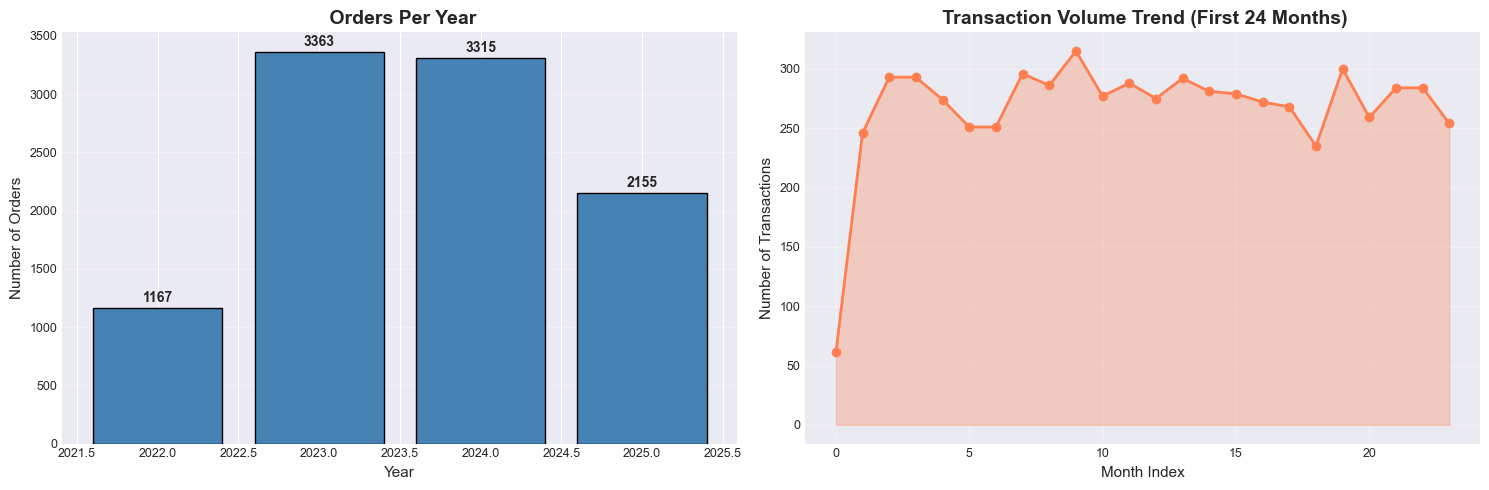


 Data spans from 2022-08-25 to 2025-08-24
 Total time period: 1095 days


In [3]:
# Check data density over time
df_temp = df.copy()
df_temp['order_date'] = pd.to_datetime(df_temp['order_date'])
df_temp['year'] = df_temp['order_date'].dt.year
df_temp['month'] = df_temp['order_date'].dt.to_period('M')

# Create visualizations for data density
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Orders per year
year_counts = df_temp['year'].value_counts().sort_index()
axes[0].bar(year_counts.index, year_counts.values, color='steelblue', edgecolor='black')
axes[0].set_title(' Orders Per Year', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Orders')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(year_counts.values):
    axes[0].text(year_counts.index[i], v + 50, str(v), ha='center', fontweight='bold')

# Transactions per month
month_counts = df_temp['month'].value_counts().sort_index().head(24)
axes[1].plot(range(len(month_counts)), month_counts.values, marker='o', linewidth=2, markersize=6, color='coral')
axes[1].set_title(' Transaction Volume Trend (First 24 Months)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month Index')
axes[1].set_ylabel('Number of Transactions')
axes[1].grid(alpha=0.3)
axes[1].fill_between(range(len(month_counts)), month_counts.values, alpha=0.3, color='coral')

plt.tight_layout()
plt.show()

print(f"\n Data spans from {df_temp['order_date'].min().date()} to {df_temp['order_date'].max().date()}")
print(f" Total time period: {(df_temp['order_date'].max() - df_temp['order_date'].min()).days} days")

# Section 4: Understanding Data Columns and Structure

Let's classify features by their role and analyze the data structure in detail.

FEATURE CLASSIFICATION

Identifier:
  • customer_id          | Type: object     | Unique values: 4327
  • order_id             | Type: object     | Unique values: 10000
  • product_id           | Type: object     | Unique values: 15
  • review_id            | Type: object     | Unique values: 10000

Demographic:
  • first_name           | Type: object     | Unique values: 573
  • last_name            | Type: object     | Unique values: 904
  • gender               | Type: object     | Unique values: 3
  • age_group            | Type: object     | Unique values: 3
  • country              | Type: object     | Unique values: 10

Temporal:
  • signup_date          | Type: object     | Unique values: 1657
  • order_date           | Type: object     | Unique values: 1096
  • review_date          | Type: object     | Unique values: 1096

Product:
  • product_name         | Type: object     | Unique values: 15
  • category             | Type: object     | Unique values: 6

Monetary:
  • unit_

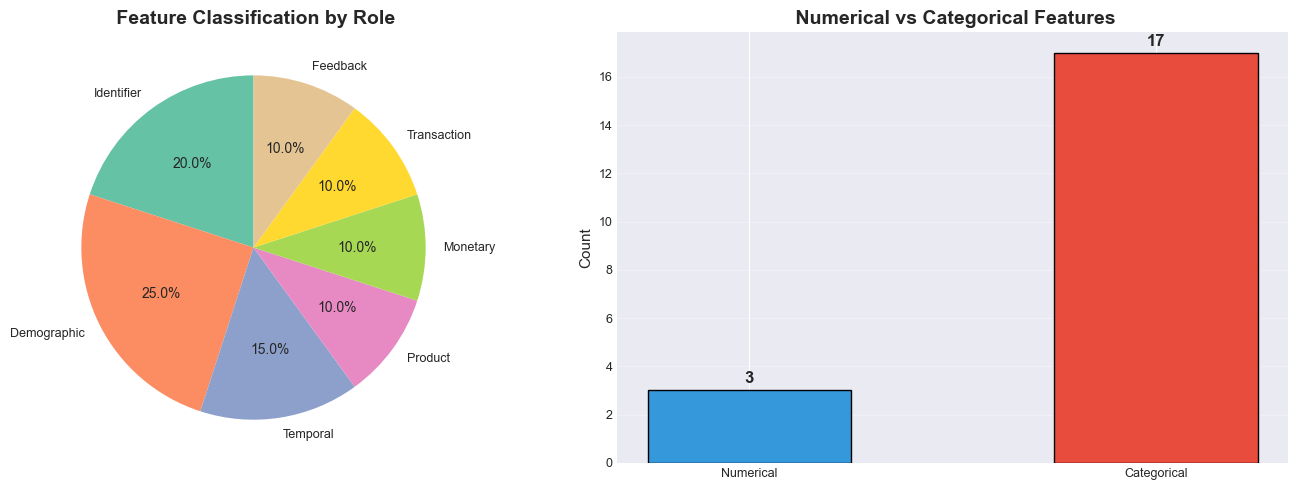

In [4]:
# Feature classification
feature_classification = {
    'Identifier': ['customer_id', 'order_id', 'product_id', 'review_id'],
    'Demographic': ['first_name', 'last_name', 'gender', 'age_group', 'country'],
    'Temporal': ['signup_date', 'order_date', 'review_date'],
    'Product': ['product_name', 'category'],
    'Monetary': ['unit_price', 'quantity'],
    'Transaction': ['order_status', 'payment_method'],
    'Feedback': ['rating', 'review_text']
}

print("="*80)
print("FEATURE CLASSIFICATION")
print("="*80)
for role, features in feature_classification.items():
    print(f"\n{role}:")
    for feature in features:
        if feature in df.columns:
            dtype = df[feature].dtype
            unique_count = df[feature].nunique()
            print(f"  • {feature:20s} | Type: {str(dtype):10s} | Unique values: {unique_count}")

# Identify numerical vs categorical
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n\n Numerical Features ({len(numerical_cols)}): {numerical_cols}")
print(f"️  Categorical Features ({len(categorical_cols)}): {len(categorical_cols)}")

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Feature role pie chart
role_counts = [len(features) for features in feature_classification.values()]
role_labels = list(feature_classification.keys())
colors = sns.color_palette('Set2', len(role_labels))
axes[0].pie(role_counts, labels=role_labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0].set_title(' Feature Classification by Role', fontsize=14, fontweight='bold')

# Numerical vs Categorical
type_counts = [len(numerical_cols), len(categorical_cols)]
type_labels = ['Numerical', 'Categorical']
axes[1].bar(type_labels, type_counts, color=['#3498db', '#e74c3c'], edgecolor='black', width=0.5)
axes[1].set_title(' Numerical vs Categorical Features', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(type_counts):
    axes[1].text(i, v + 0.3, str(v), ha='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# Section 5: Checking Data Quality Issues

Data quality assessment is crucial before analysis. We'll check for missing values, outliers, duplicates, and temporal anomalies.

MISSING VALUES ANALYSIS
 No missing values found in the dataset!

 Duplicate rows: 0
 Duplicate order_ids: 0

OUTLIER DETECTION (IQR Method)


Column  Outlier_Count  Outlier_Percentage  Lower_Bound  Upper_Bound
0    quantity              0                0.00        -1.00         7.00
1  unit_price           1268               12.68      -143.50       452.50
2      rating              0                0.00        -1.00         7.00

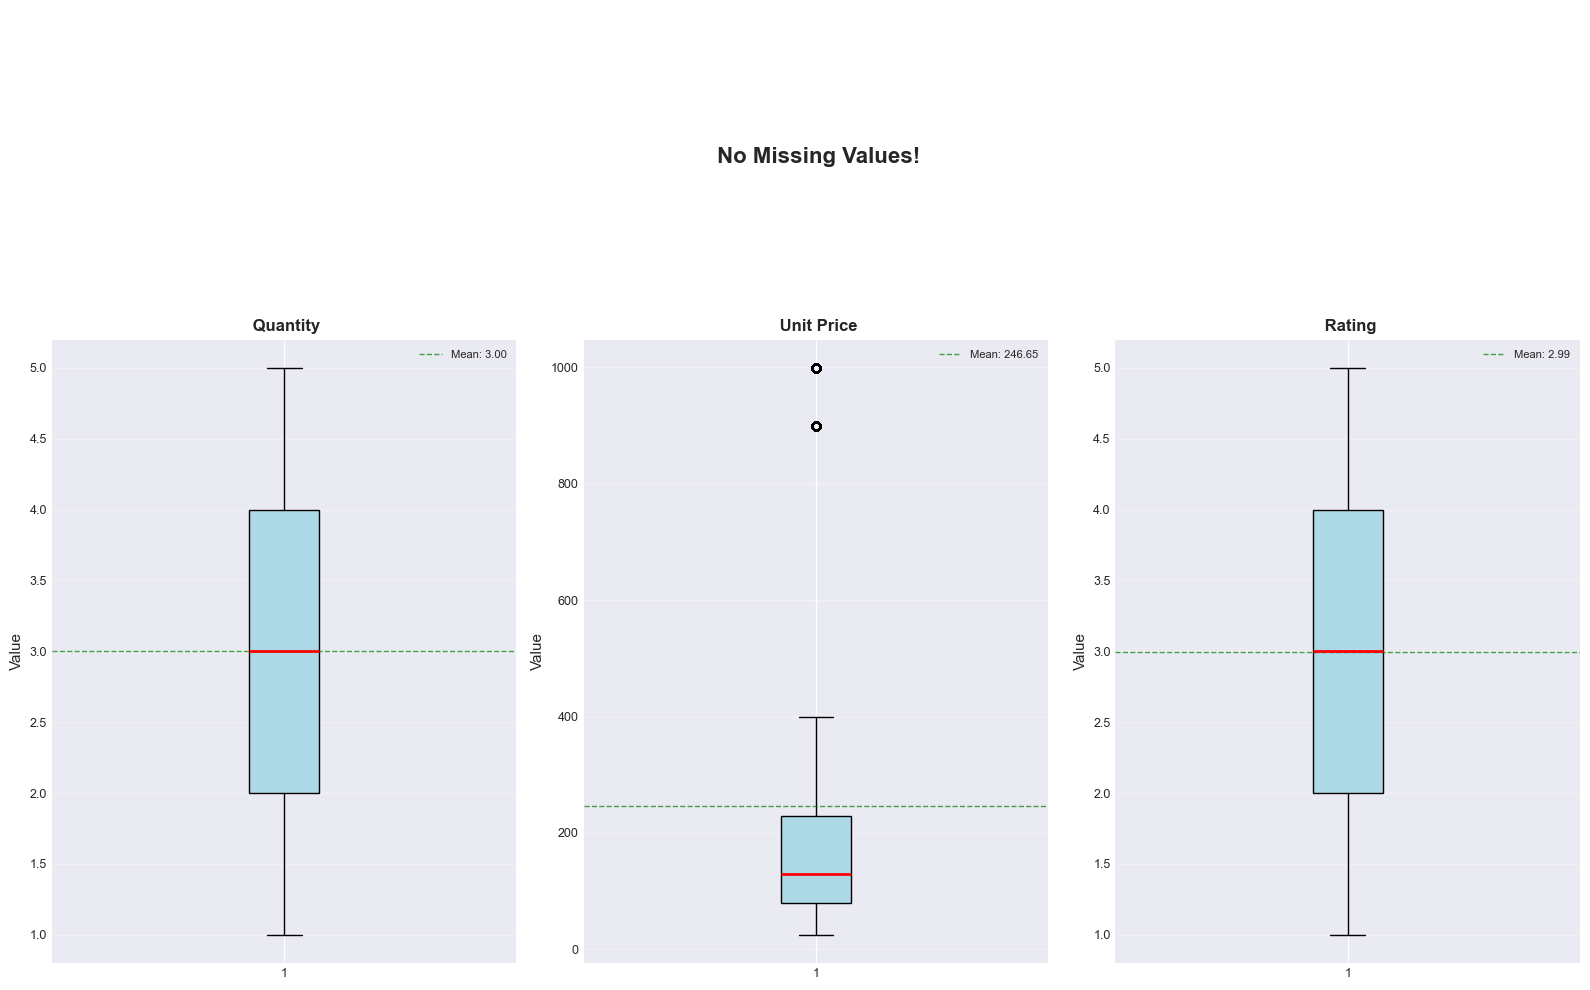


 Data quality assessment complete!


In [5]:
# 1. Missing Values Analysis
print("="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_data) == 0:
    print(" No missing values found in the dataset!")
else:
    display(missing_data)

# 2. Duplicate Check
duplicates = df.duplicated().sum()
duplicate_orders = df[df.duplicated(subset=['order_id'], keep=False)]
print(f"\n Duplicate rows: {duplicates}")
print(f" Duplicate order_ids: {len(duplicate_orders)}")

# 3. Outlier Detection (for numerical columns)
print("\n" + "="*80)
print("OUTLIER DETECTION (IQR Method)")
print("="*80)

outlier_summary = []
for col in ['quantity', 'unit_price', 'rating']:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_pct = (len(outliers) / len(df)) * 100
        outlier_summary.append({
            'Column': col,
            'Outlier_Count': len(outliers),
            'Outlier_Percentage': round(outlier_pct, 2),
            'Lower_Bound': round(lower_bound, 2),
            'Upper_Bound': round(upper_bound, 2)
        })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)

# Visualizations
fig = plt.figure(figsize=(16, 10))
gs = GridSpec(3, 3, figure=fig)

# Missing values bar chart
ax1 = fig.add_subplot(gs[0, :])
if len(missing_data) > 0:
    ax1.barh(missing_data['Column'], missing_data['Missing_Percentage'], color='coral', edgecolor='black')
    ax1.set_xlabel('Missing Percentage (%)')
    ax1.set_title(' Missing Values by Column', fontsize=14, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3)
else:
    ax1.text(0.5, 0.5, ' No Missing Values!', ha='center', va='center', 
             fontsize=16, fontweight='bold', transform=ax1.transAxes)
    ax1.axis('off')

# Outlier boxplots
for idx, col in enumerate(['quantity', 'unit_price', 'rating']):
    ax = fig.add_subplot(gs[1:, idx])
    if col in df.columns:
        ax.boxplot(df[col].dropna(), vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', edgecolor='black'),
                   medianprops=dict(color='red', linewidth=2),
                   whiskerprops=dict(color='black'),
                   capprops=dict(color='black'))
        ax.set_title(f' {col.replace("_", " ").title()}', fontsize=12, fontweight='bold')
        ax.set_ylabel('Value')
        ax.grid(axis='y', alpha=0.3)
        
        # Add statistics
        mean_val = df[col].mean()
        median_val = df[col].median()
        ax.axhline(mean_val, color='green', linestyle='--', linewidth=1, alpha=0.7, label=f'Mean: {mean_val:.2f}')
        ax.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()

print("\n Data quality assessment complete!")

# Section 6: Cleaning and Preparing the Data

Now we'll clean the data and create derived features for analysis.

DATA CLEANING & FEATURE ENGINEERING
 Converted signup_date to datetime
 Converted order_date to datetime
 Converted review_date to datetime
 Created 'revenue' column
 Extracted temporal features (year, month, quarter, day of week, etc.)
 Created 'profit' column (assuming 30% margin)
 Created 'customer_tenure_days' column
 Removed 0 duplicate rows
 Filtered out negative/zero values

BEFORE vs AFTER CLEANING
Rows: 10,000 → 10,000 (Δ 0)
Revenue: $7,450,763.00 → $7,450,763.00 (Δ $0.00)
Average Order Value: $745.08 → $745.08

 Sample of cleaned data with new features:


order_id customer_id          product_name  quantity  unit_price  revenue  \
0  ORD10000    CUST2353        Fitbit Versa 3         3         229      687   
1  ORD10001    CUST4463          Levi's Jeans         4          59      236   
2  ORD10002    CUST4512    Lego Star Wars Set         2          59      118   
3  ORD10003    CUST5711          Dyson Vacuum         4         399     1596   
4  ORD10004    CUST1296  Adidas Running Shoes         1         110      110   
5  ORD10005    CUST2790        Fitbit Versa 3         5         229     1145   
6  ORD10006    CUST2442           Instant Pot         1          99       99   
7  ORD10007    CUST2451          Levi's Jeans         2          59      118   
8  ORD10008    CUST2364       Sony Headphones         5         199      995   
9  ORD10009    CUST4713          Dyson Vacuum         4         399     1596   

   profit order_date  order_year  order_month order_day_of_week  
0  206.10 2023-07-13        2023            7          Thursday  
1   70.80 2024-08-12        2024            8            Monday  
2   35.40 2024-08-04        2024            8            Sunday  
3  478.80 2025-05-23        2025            5            Friday  
4   33.00 2023-07-02        2023            7            Sunday  
5  343.50 2023-04-13        2023            4          Thursday  
6   29.70 2023-12-31        2023           12            Sunday  
7   35.40 2024-01-29        2024            1            Monday  
8  298.50 2022-11-30        2022           11         Wednesday  
9  478.80 2025-05-16        2025            5            Friday

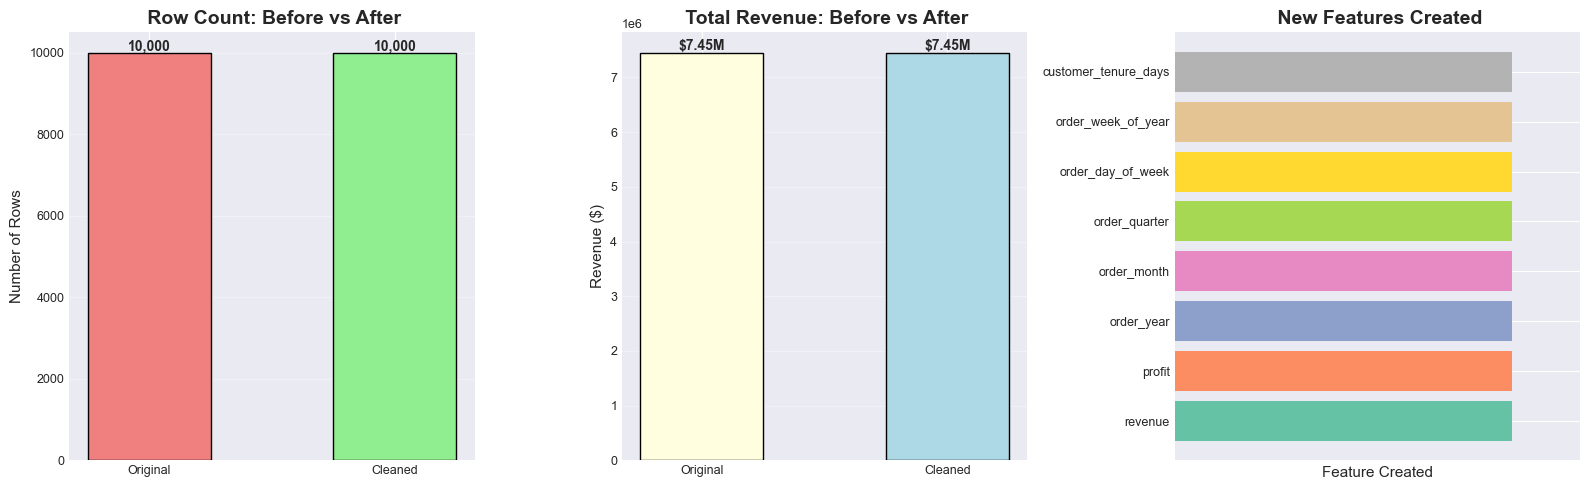


 Data cleaning complete! Ready for analysis.


In [6]:
# Create a copy for cleaning
df_clean = df.copy()

# Store original metrics
original_rows = len(df_clean)
original_revenue = (df_clean['quantity'] * df_clean['unit_price']).sum()

print("="*80)
print("DATA CLEANING & FEATURE ENGINEERING")
print("="*80)

# 1. Convert date columns to datetime
date_columns = ['signup_date', 'order_date', 'review_date']
for col in date_columns:
    df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')
    print(f" Converted {col} to datetime")

# 2. Create derived features - REVENUE
df_clean['revenue'] = df_clean['quantity'] * df_clean['unit_price']
print(f" Created 'revenue' column")

# 3. Extract temporal features
df_clean['order_year'] = df_clean['order_date'].dt.year
df_clean['order_month'] = df_clean['order_date'].dt.month
df_clean['order_quarter'] = df_clean['order_date'].dt.quarter
df_clean['order_day_of_week'] = df_clean['order_date'].dt.day_name()
df_clean['order_day_of_week_num'] = df_clean['order_date'].dt.dayofweek
df_clean['order_week_of_year'] = df_clean['order_date'].dt.isocalendar().week
df_clean['order_hour'] = df_clean['order_date'].dt.hour  # Will be 0 if no time component
print(f" Extracted temporal features (year, month, quarter, day of week, etc.)")

# 4. Create profit column (assuming 30% margin for simplicity since cost data is not available)
df_clean['profit'] = df_clean['revenue'] * 0.30
print(f" Created 'profit' column (assuming 30% margin)")

# 5. Create customer age category based on signup
df_clean['customer_tenure_days'] = (df_clean['order_date'] - df_clean['signup_date']).dt.days
print(f" Created 'customer_tenure_days' column")

# 6. Handle any duplicates
df_clean = df_clean.drop_duplicates()
removed_dups = original_rows - len(df_clean)
print(f" Removed {removed_dups} duplicate rows")

# 7. Filter out negative values if any
df_clean = df_clean[df_clean['quantity'] > 0]
df_clean = df_clean[df_clean['unit_price'] > 0]
print(f" Filtered out negative/zero values")

# Final metrics
final_rows = len(df_clean)
final_revenue = df_clean['revenue'].sum()

print(f"\n" + "="*80)
print("BEFORE vs AFTER CLEANING")
print("="*80)
print(f"Rows: {original_rows:,} → {final_rows:,} (Δ {original_rows - final_rows:,})")
print(f"Revenue: ${original_revenue:,.2f} → ${final_revenue:,.2f} (Δ ${original_revenue - final_revenue:,.2f})")
print(f"Average Order Value: ${original_revenue/original_rows:.2f} → ${final_revenue/final_rows:.2f}")

# Display sample of cleaned data with new features
print(f"\n Sample of cleaned data with new features:")
display(df_clean[['order_id', 'customer_id', 'product_name', 'quantity', 'unit_price', 
                   'revenue', 'profit', 'order_date', 'order_year', 'order_month', 
                   'order_day_of_week']].head(10))

# Visualization: Before/After comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Row count comparison
categories = ['Original', 'Cleaned']
row_counts = [original_rows, final_rows]
axes[0].bar(categories, row_counts, color=['lightcoral', 'lightgreen'], edgecolor='black', width=0.5)
axes[0].set_title(' Row Count: Before vs After', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Rows')
for i, v in enumerate(row_counts):
    axes[0].text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Revenue comparison
revenue_values = [original_revenue, final_revenue]
axes[1].bar(categories, revenue_values, color=['lightyellow', 'lightblue'], edgecolor='black', width=0.5)
axes[1].set_title(' Total Revenue: Before vs After', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Revenue ($)')
for i, v in enumerate(revenue_values):
    axes[1].text(i, v + 50000, f'${v/1e6:.2f}M', ha='center', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# New features added
new_features = ['revenue', 'profit', 'order_year', 'order_month', 'order_quarter', 
                'order_day_of_week', 'order_week_of_year', 'customer_tenure_days']
axes[2].barh(range(len(new_features)), [1]*len(new_features), color=sns.color_palette('Set2', len(new_features)))
axes[2].set_yticks(range(len(new_features)))
axes[2].set_yticklabels(new_features, fontsize=9)
axes[2].set_xlabel('Feature Created')
axes[2].set_title(' New Features Created', fontsize=14, fontweight='bold')
axes[2].set_xlim(0, 1.2)
axes[2].set_xticks([])

plt.tight_layout()
plt.show()

print(f"\n Data cleaning complete! Ready for analysis.")

# Section 7: Basic Statistical Overview

Let's examine the statistical properties of key numerical variables including skewness, kurtosis, and comparison of mean vs median.

COMPREHENSIVE STATISTICAL SUMMARY


Variable  Count   Mean  Median  Std Dev   Min     Max  Skewness  \
0    quantity  10000   3.00    3.00     1.42  1.00    5.00     -0.01   
1  unit_price  10000 246.65  129.00   282.61 25.00  999.00      1.87   
2      rating  10000   2.99    3.00     1.41  1.00    5.00      0.01   
3     revenue  10000 745.08  398.00  1012.44 25.00 4995.00      2.58   
4      profit  10000 223.52  119.40   303.73  7.50 1498.50      2.58   

   Kurtosis     Q1     Q3    IQR  
0     -1.30   2.00   4.00   2.00  
1      2.05  80.00 229.00 149.00  
2     -1.29   2.00   4.00   2.00  
3      6.37 198.00 796.00 598.00  
4      6.37  59.40 238.80 179.40


MEAN vs MEDIAN COMPARISON (Business Implications)

QUANTITY:
  Mean: $3.00 | Median: $3.00 | Diff: 0.0%
   Nearly symmetric distribution

UNIT_PRICE:
  Mean: $246.65 | Median: $129.00 | Diff: 91.2%
   Right-skewed: Few high-value transactions pulling mean up

RATING:
  Mean: $2.99 | Median: $3.00 | Diff: -0.2%
   Nearly symmetric distribution

REVENUE:
  Mean: $745.08 | Median: $398.00 | Diff: 87.2%
   Right-skewed: Few high-value transactions pulling mean up

PROFIT:
  Mean: $223.52 | Median: $119.40 | Diff: 87.2%
   Right-skewed: Few high-value transactions pulling mean up


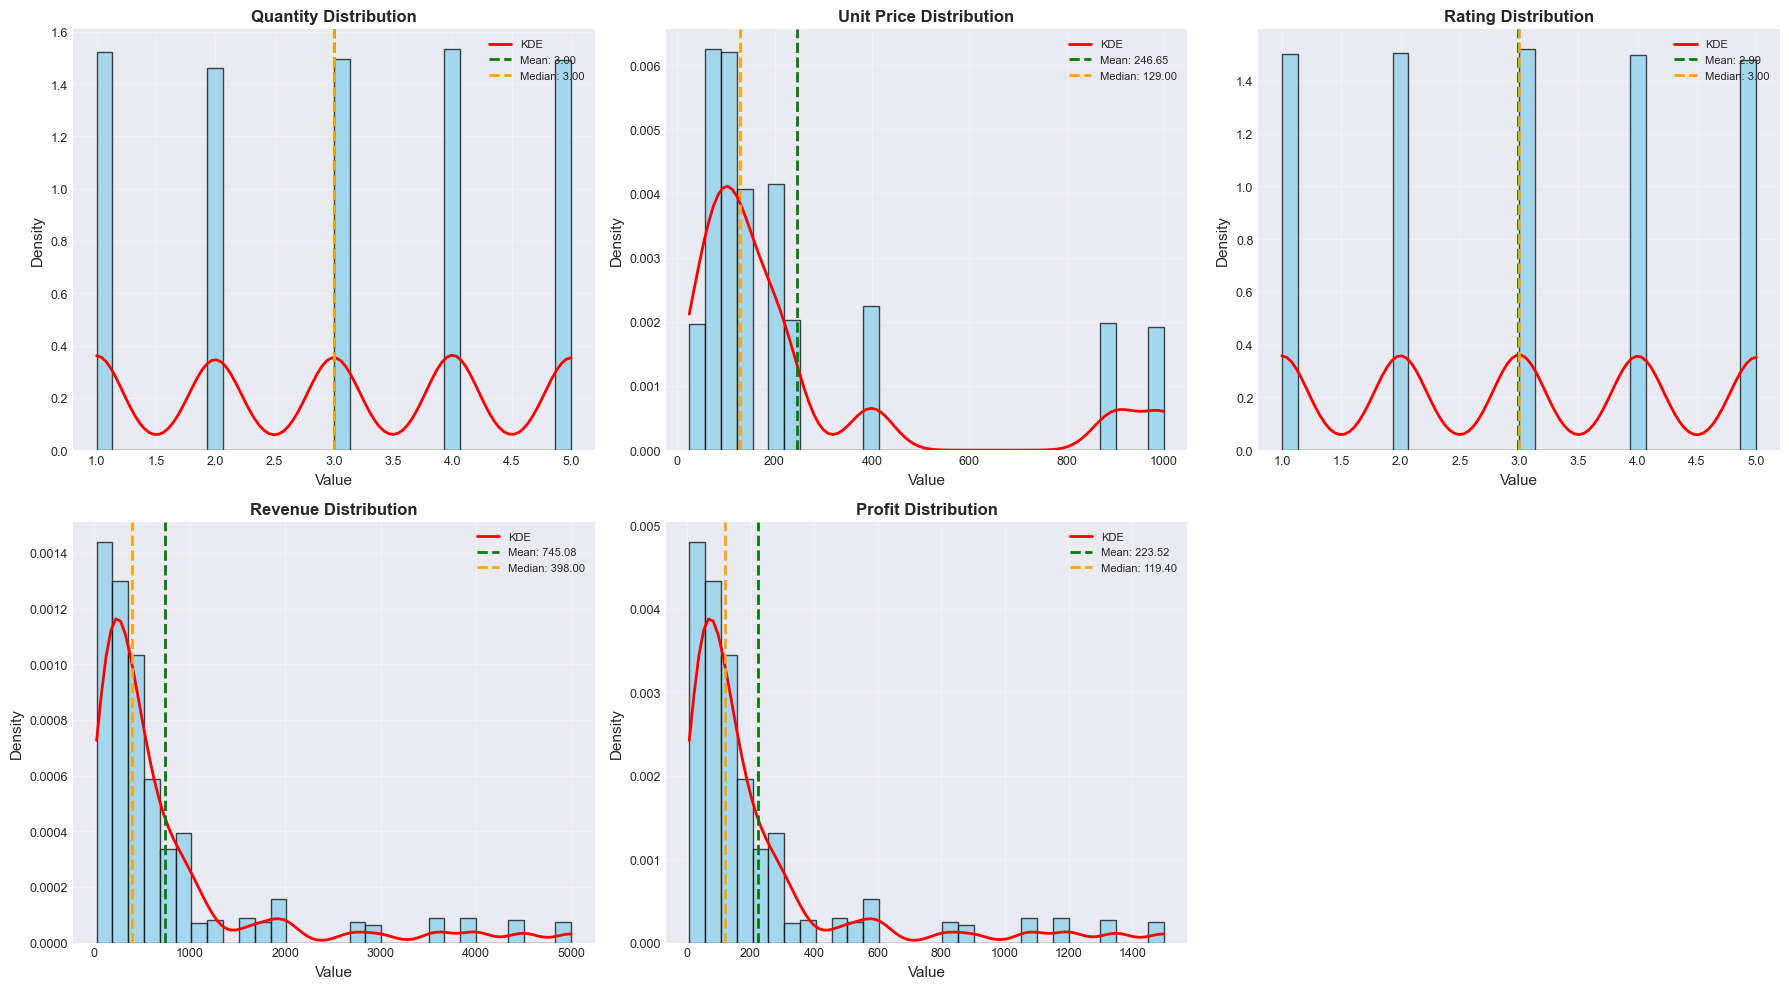

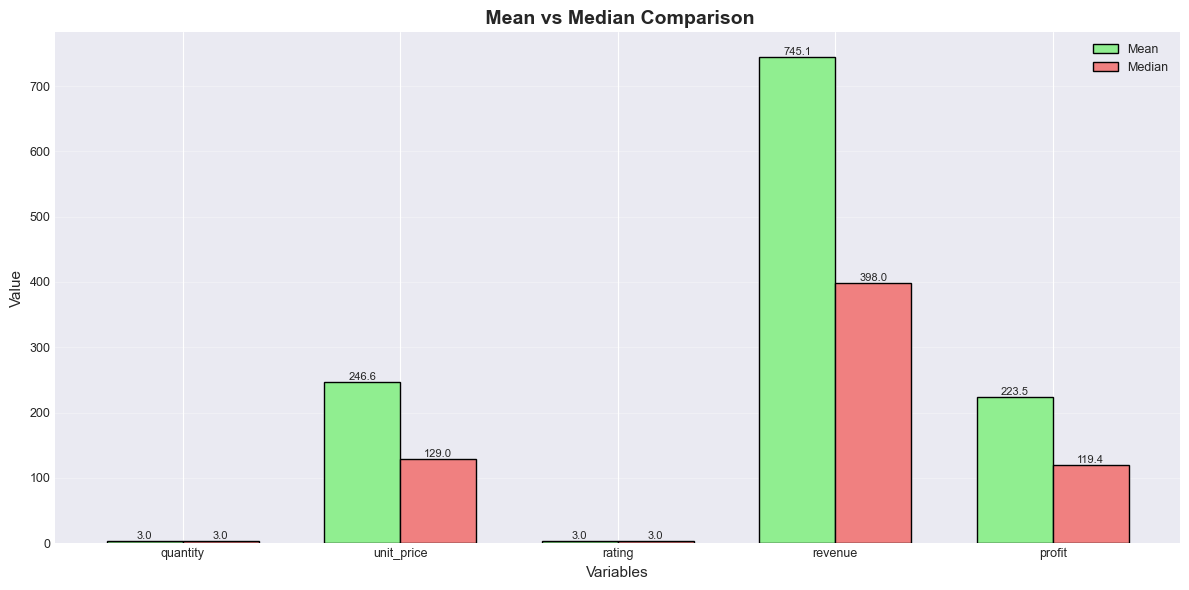


 Statistical overview complete!


In [7]:
# Select key numerical variables for analysis
numeric_vars = ['quantity', 'unit_price', 'rating', 'revenue', 'profit']

# Calculate comprehensive statistics
stats_summary = []
for col in numeric_vars:
    if col in df_clean.columns:
        data = df_clean[col].dropna()
        stats_summary.append({
            'Variable': col,
            'Count': len(data),
            'Mean': data.mean(),
            'Median': data.median(),
            'Std Dev': data.std(),
            'Min': data.min(),
            'Max': data.max(),
            'Skewness': skew(data),
            'Kurtosis': kurtosis(data),
            'Q1': data.quantile(0.25),
            'Q3': data.quantile(0.75),
            'IQR': data.quantile(0.75) - data.quantile(0.25)
        })

stats_df = pd.DataFrame(stats_summary)
print("="*80)
print("COMPREHENSIVE STATISTICAL SUMMARY")
print("="*80)
display(stats_df.round(2))

# Business interpretation of mean vs median
print("\n" + "="*80)
print("MEAN vs MEDIAN COMPARISON (Business Implications)")
print("="*80)
for _, row in stats_df.iterrows():
    var = row['Variable']
    mean_val = row['Mean']
    median_val = row['Median']
    diff_pct = ((mean_val - median_val) / median_val * 100)
    
    if abs(diff_pct) < 5:
        interpretation = "Nearly symmetric distribution"
    elif diff_pct > 5:
        interpretation = "Right-skewed: Few high-value transactions pulling mean up"
    else:
        interpretation = "Left-skewed: Few low-value transactions pulling mean down"
    
    print(f"\n{var.upper()}:")
    print(f"  Mean: ${mean_val:.2f} | Median: ${median_val:.2f} | Diff: {diff_pct:.1f}%")
    print(f"   {interpretation}")

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numeric_vars):
    if col in df_clean.columns:
        data = df_clean[col].dropna()
        
        # Histogram with KDE
        axes[idx].hist(data, bins=30, alpha=0.7, color='skyblue', edgecolor='black', density=True)
        
        # Add KDE
        from scipy.stats import gaussian_kde
        kde = gaussian_kde(data)
        x_range = np.linspace(data.min(), data.max(), 100)
        axes[idx].plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')
        
        # Add mean and median lines
        axes[idx].axvline(data.mean(), color='green', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.2f}')
        axes[idx].axvline(data.median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {data.median():.2f}')
        
        axes[idx].set_title(f'{col.replace("_", " ").title()} Distribution', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Value')
        axes[idx].set_ylabel('Density')
        axes[idx].legend(fontsize=8)
        axes[idx].grid(alpha=0.3)

# Hide the last subplot if we have fewer than 6 variables
if len(numeric_vars) < 6:
    axes[5].axis('off')

plt.tight_layout()
plt.show()

# Mean vs Median Bar Chart
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(stats_df))
width = 0.35

bars1 = ax.bar(x - width/2, stats_df['Mean'], width, label='Mean', color='lightgreen', edgecolor='black')
bars2 = ax.bar(x + width/2, stats_df['Median'], width, label='Median', color='lightcoral', edgecolor='black')

ax.set_xlabel('Variables')
ax.set_ylabel('Value')
ax.set_title(' Mean vs Median Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(stats_df['Variable'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print("\n Statistical overview complete!")

# Section 8: Distribution of Key Numerical Variables

We'll analyze distributions in depth, including heavy-tail analysis, log transformations, and extreme value contributions.

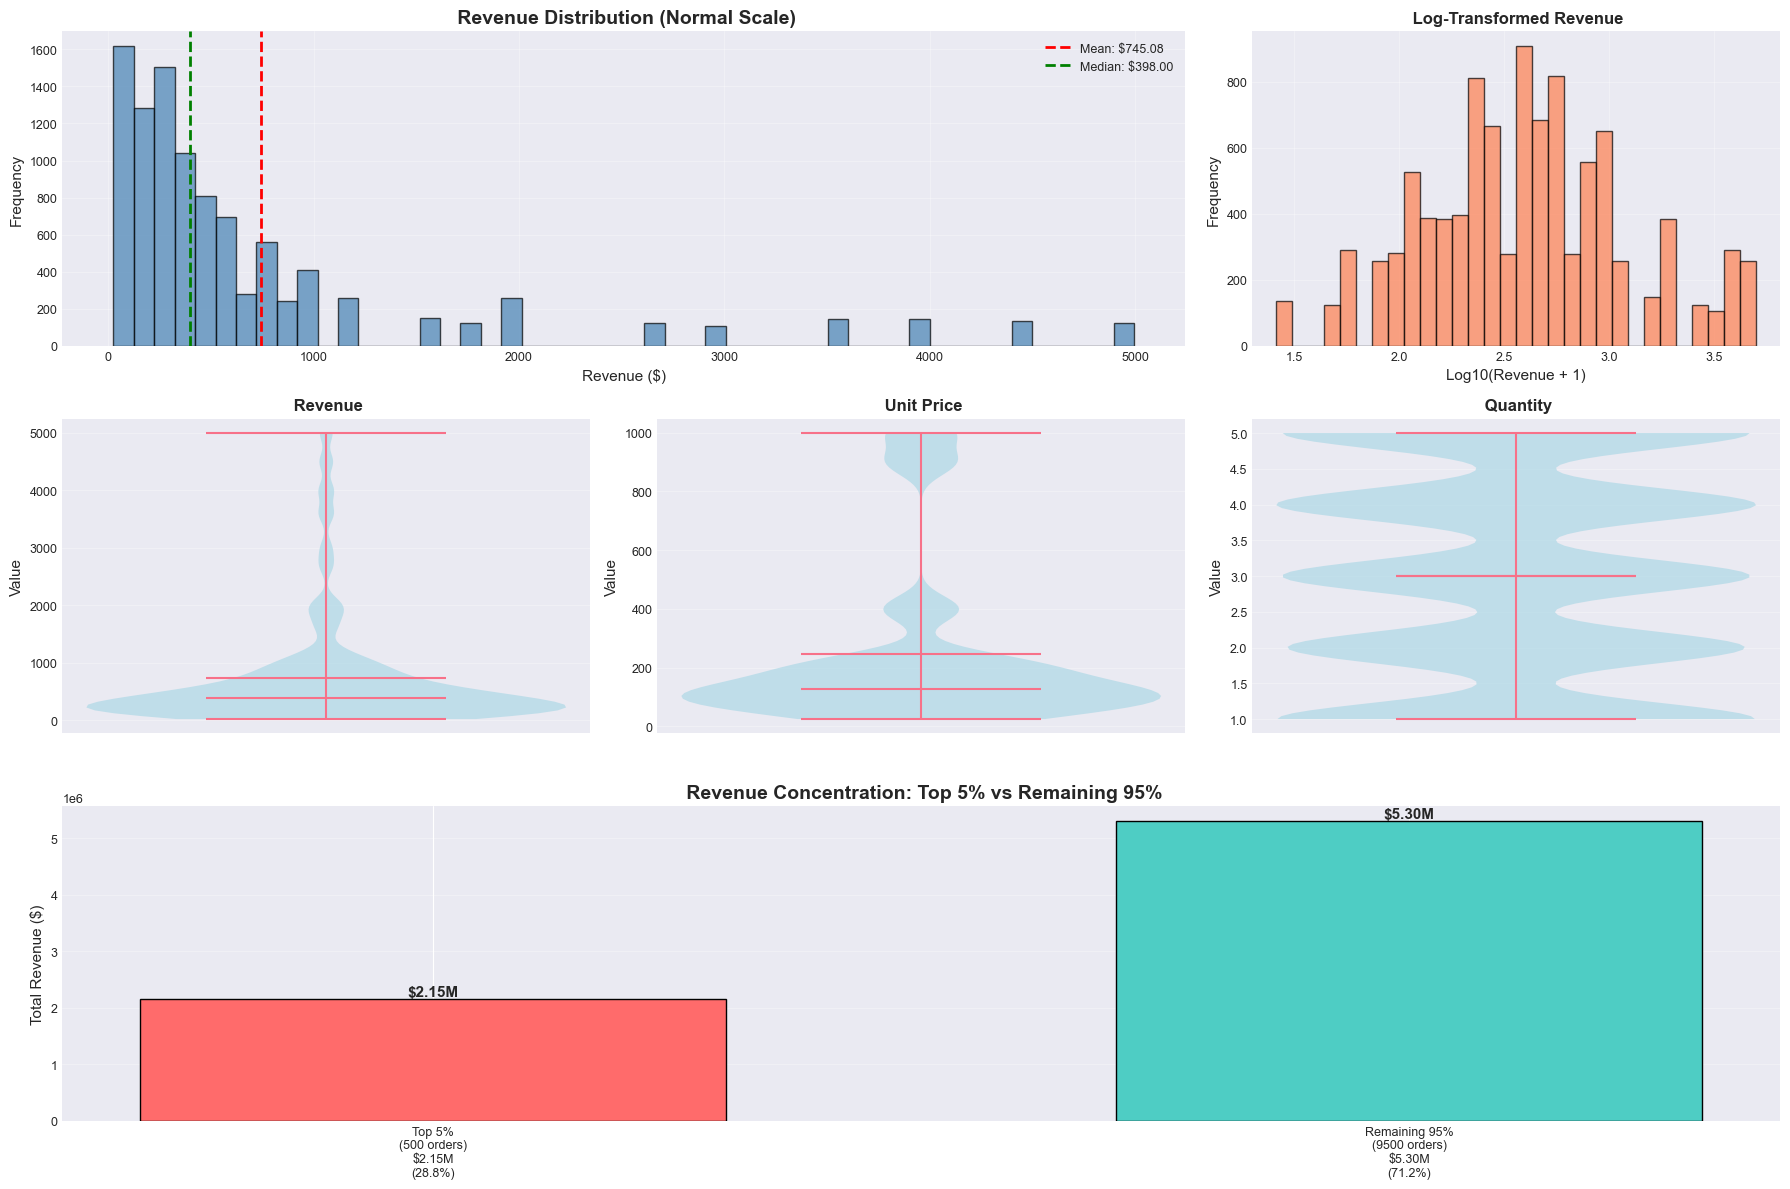

HEAVY-TAIL ANALYSIS

Revenue Percentiles:
  50th percentile: $398.00
  75th percentile: $796.00
  90th percentile: $1,995.00
  95th percentile: $3,596.00
  99th percentile: $4,995.00

 Extreme Value Orders (Top 1%):
  Count: 0 orders
  Total Revenue: $0.00
  Contribution to Total: 0.00%
  Average Order Value: $nan

 Distribution analysis complete!


In [8]:
# Analyze distributions with multiple visualization techniques
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(3, 3, figure=fig)

# Revenue analysis - the most important metric
revenue_data = df_clean['revenue'].dropna()

# 1. Normal vs Log-transformed histograms
ax1 = fig.add_subplot(gs[0, :2])
ax1.hist(revenue_data, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
ax1.set_title(' Revenue Distribution (Normal Scale)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Revenue ($)')
ax1.set_ylabel('Frequency')
ax1.axvline(revenue_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${revenue_data.mean():.2f}')
ax1.axvline(revenue_data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${revenue_data.median():.2f}')
ax1.legend()
ax1.grid(alpha=0.3)

ax2 = fig.add_subplot(gs[0, 2])
ax2.hist(np.log10(revenue_data + 1), bins=30, alpha=0.7, color='coral', edgecolor='black')
ax2.set_title(' Log-Transformed Revenue', fontsize=12, fontweight='bold')
ax2.set_xlabel('Log10(Revenue + 1)')
ax2.set_ylabel('Frequency')
ax2.grid(alpha=0.3)

# 2. Violin plots for key variables
violin_vars = ['revenue', 'unit_price', 'quantity']
for idx, var in enumerate(violin_vars):
    ax = fig.add_subplot(gs[1, idx])
    data_to_plot = df_clean[var].dropna()
    parts = ax.violinplot([data_to_plot], positions=[0], showmeans=True, showmedians=True)
    
    for pc in parts['bodies']:
        pc.set_facecolor('lightblue')
        pc.set_alpha(0.7)
    
    ax.set_title(f' {var.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Value')
    ax.set_xticks([])
    ax.grid(axis='y', alpha=0.3)

# 3. Top 5% contribution analysis
ax3 = fig.add_subplot(gs[2, :])
revenue_sorted = revenue_data.sort_values(ascending=False).reset_index(drop=True)
top_5pct_idx = int(len(revenue_sorted) * 0.05)
top_5pct_revenue = revenue_sorted[:top_5pct_idx].sum()
remaining_revenue = revenue_sorted[top_5pct_idx:].sum()
total_revenue = revenue_sorted.sum()

contributions = [top_5pct_revenue, remaining_revenue]
labels = [f'Top 5%\n({top_5pct_idx} orders)\n${top_5pct_revenue/1e6:.2f}M\n({top_5pct_revenue/total_revenue*100:.1f}%)',
          f'Remaining 95%\n({len(revenue_sorted)-top_5pct_idx} orders)\n${remaining_revenue/1e6:.2f}M\n({remaining_revenue/total_revenue*100:.1f}%)']
colors = ['#FF6B6B', '#4ECDC4']

bars = ax3.bar(labels, contributions, color=colors, edgecolor='black', width=0.6)
ax3.set_title(' Revenue Concentration: Top 5% vs Remaining 95%', fontsize=14, fontweight='bold')
ax3.set_ylabel('Total Revenue ($)')
ax3.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'${height/1e6:.2f}M',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

# Heavy-tail analysis
print("="*80)
print("HEAVY-TAIL ANALYSIS")
print("="*80)
percentiles = [50, 75, 90, 95, 99]
print(f"\nRevenue Percentiles:")
for p in percentiles:
    value = np.percentile(revenue_data, p)
    print(f"  {p}th percentile: ${value:,.2f}")

top_1pct = revenue_data.quantile(0.99)
extreme_orders = df_clean[df_clean['revenue'] > top_1pct]
print(f"\n Extreme Value Orders (Top 1%):")
print(f"  Count: {len(extreme_orders)} orders")
print(f"  Total Revenue: ${extreme_orders['revenue'].sum():,.2f}")
print(f"  Contribution to Total: {extreme_orders['revenue'].sum()/revenue_data.sum()*100:.2f}%")
print(f"  Average Order Value: ${extreme_orders['revenue'].mean():,.2f}")

print("\n Distribution analysis complete!")

# Section 9: Order Volume Trend Over Time

Analyzing order trends with trend stability, peak detection, and demand anomalies.

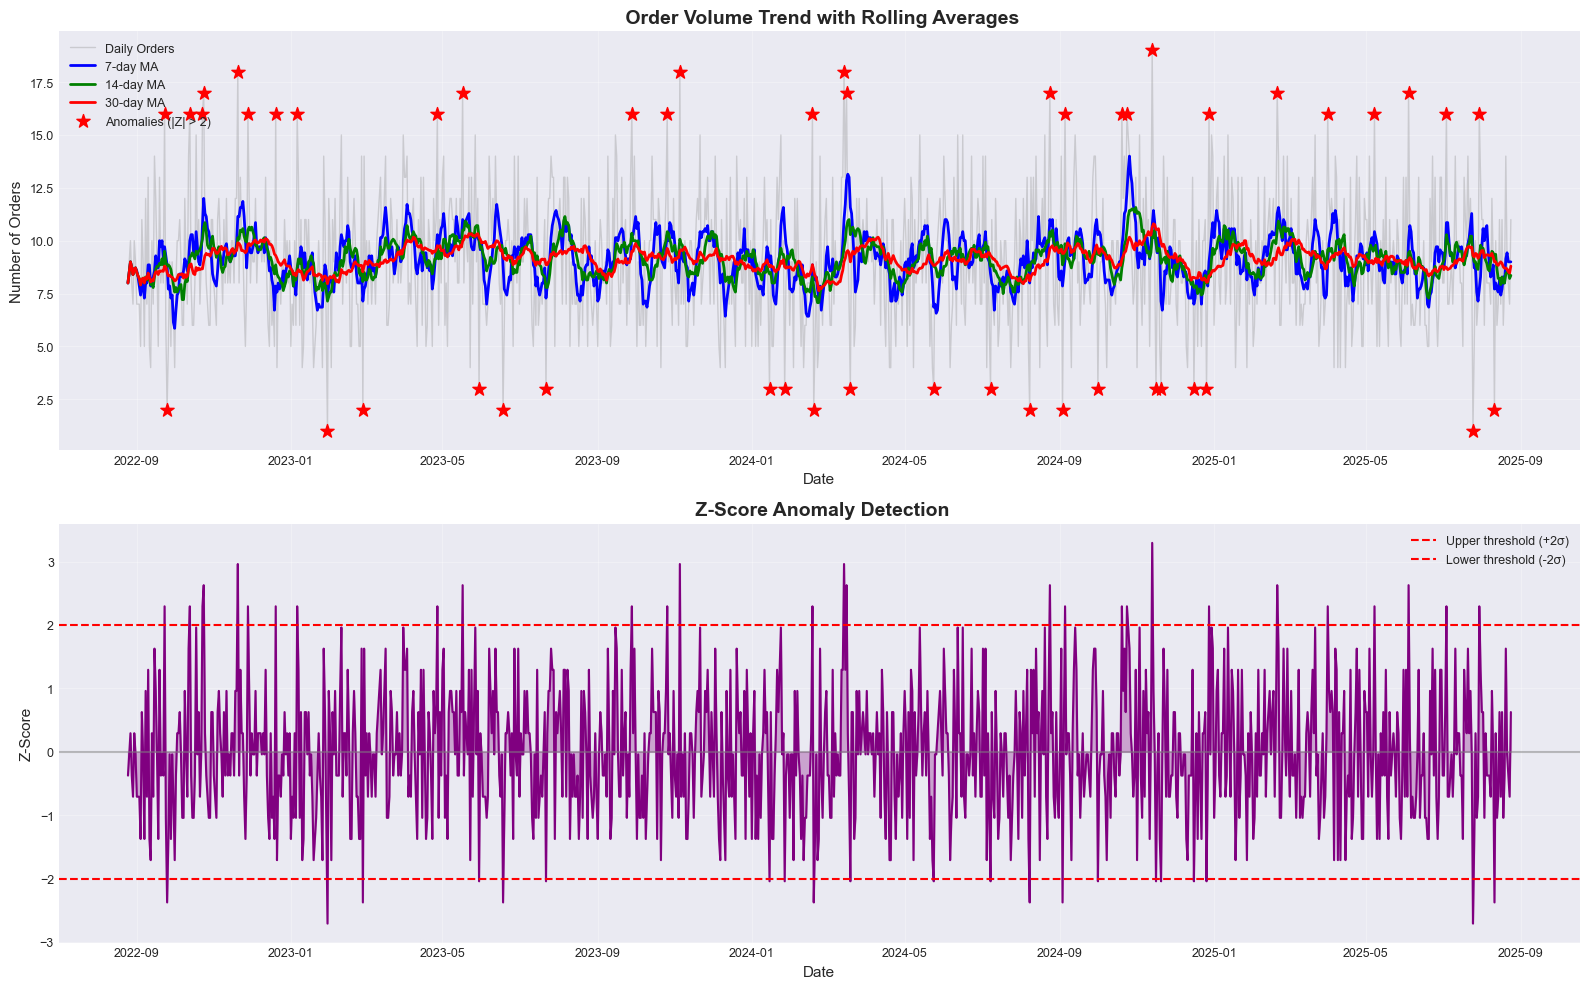

ORDER VOLUME TREND ANALYSIS

Total Days with Orders: 1096
Average Daily Orders: 9.12
Median Daily Orders: 9.00
Max Daily Orders: 19 on 2024-11-13
Min Daily Orders: 1 on 2023-01-30

 Anomalies Detected: 49 days

Anomaly Dates:
  • 2022-09-23: 16 orders (Z-score: 2.29)
  • 2022-09-25: 2 orders (Z-score: -2.38)
  • 2022-10-13: 16 orders (Z-score: 2.29)
  • 2022-10-23: 16 orders (Z-score: 2.29)
  • 2022-10-24: 17 orders (Z-score: 2.63)
  • 2022-11-20: 18 orders (Z-score: 2.96)
  • 2022-11-28: 16 orders (Z-score: 2.29)
  • 2022-12-20: 16 orders (Z-score: 2.29)
  • 2023-01-06: 16 orders (Z-score: 2.29)
  • 2023-01-30: 1 orders (Z-score: -2.71)

 Order trend analysis complete!


In [9]:
# Daily order volume
daily_orders = df_clean.groupby(df_clean['order_date'].dt.date).size().reset_index(name='orders')
daily_orders.columns = ['date', 'orders']
daily_orders['date'] = pd.to_datetime(daily_orders['date'])
daily_orders = daily_orders.sort_values('date')

# Calculate rolling averages
daily_orders['ma_7'] = daily_orders['orders'].rolling(window=7, min_periods=1).mean()
daily_orders['ma_14'] = daily_orders['orders'].rolling(window=14, min_periods=1).mean()
daily_orders['ma_30'] = daily_orders['orders'].rolling(window=30, min_periods=1).mean()

# Anomaly detection using Z-score
daily_orders['z_score'] = (daily_orders['orders'] - daily_orders['orders'].mean()) / daily_orders['orders'].std()
anomalies = daily_orders[np.abs(daily_orders['z_score']) > 2]

# Visualizations
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Raw trend with rolling averages
axes[0].plot(daily_orders['date'], daily_orders['orders'], alpha=0.3, color='gray', label='Daily Orders', linewidth=1)
axes[0].plot(daily_orders['date'], daily_orders['ma_7'], label='7-day MA', linewidth=2, color='blue')
axes[0].plot(daily_orders['date'], daily_orders['ma_14'], label='14-day MA', linewidth=2, color='green')
axes[0].plot(daily_orders['date'], daily_orders['ma_30'], label='30-day MA', linewidth=2, color='red')

# Highlight anomalies
axes[0].scatter(anomalies['date'], anomalies['orders'], color='red', s=100, 
                marker='*', label=f'Anomalies (|Z| > 2)', zorder=5)

axes[0].set_title(' Order Volume Trend with Rolling Averages', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Orders')
axes[0].legend(loc='upper left')
axes[0].grid(alpha=0.3)

# Z-score anomaly plot
axes[1].plot(daily_orders['date'], daily_orders['z_score'], color='purple', linewidth=1.5)
axes[1].fill_between(daily_orders['date'], daily_orders['z_score'], alpha=0.3, color='purple')
axes[1].axhline(y=2, color='r', linestyle='--', label='Upper threshold (+2σ)')
axes[1].axhline(y=-2, color='r', linestyle='--', label='Lower threshold (-2σ)')
axes[1].axhline(y=0, color='gray', linestyle='-', alpha=0.5)

axes[1].set_title(' Z-Score Anomaly Detection', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Z-Score')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
print("="*80)
print("ORDER VOLUME TREND ANALYSIS")
print("="*80)
print(f"\nTotal Days with Orders: {len(daily_orders)}")
print(f"Average Daily Orders: {daily_orders['orders'].mean():.2f}")
print(f"Median Daily Orders: {daily_orders['orders'].median():.2f}")
print(f"Max Daily Orders: {daily_orders['orders'].max()} on {daily_orders.loc[daily_orders['orders'].idxmax(), 'date'].date()}")
print(f"Min Daily Orders: {daily_orders['orders'].min()} on {daily_orders.loc[daily_orders['orders'].idxmin(), 'date'].date()}")
print(f"\n Anomalies Detected: {len(anomalies)} days")
if len(anomalies) > 0:
    print(f"\nAnomaly Dates:")
    for _, row in anomalies.head(10).iterrows():
        print(f"  • {row['date'].date()}: {row['orders']} orders (Z-score: {row['z_score']:.2f})")

print("\n Order trend analysis complete!")

# Section 10: Monthly Sales Performance

Analyzing month-wise revenue, order counts, and comparing performance across years.

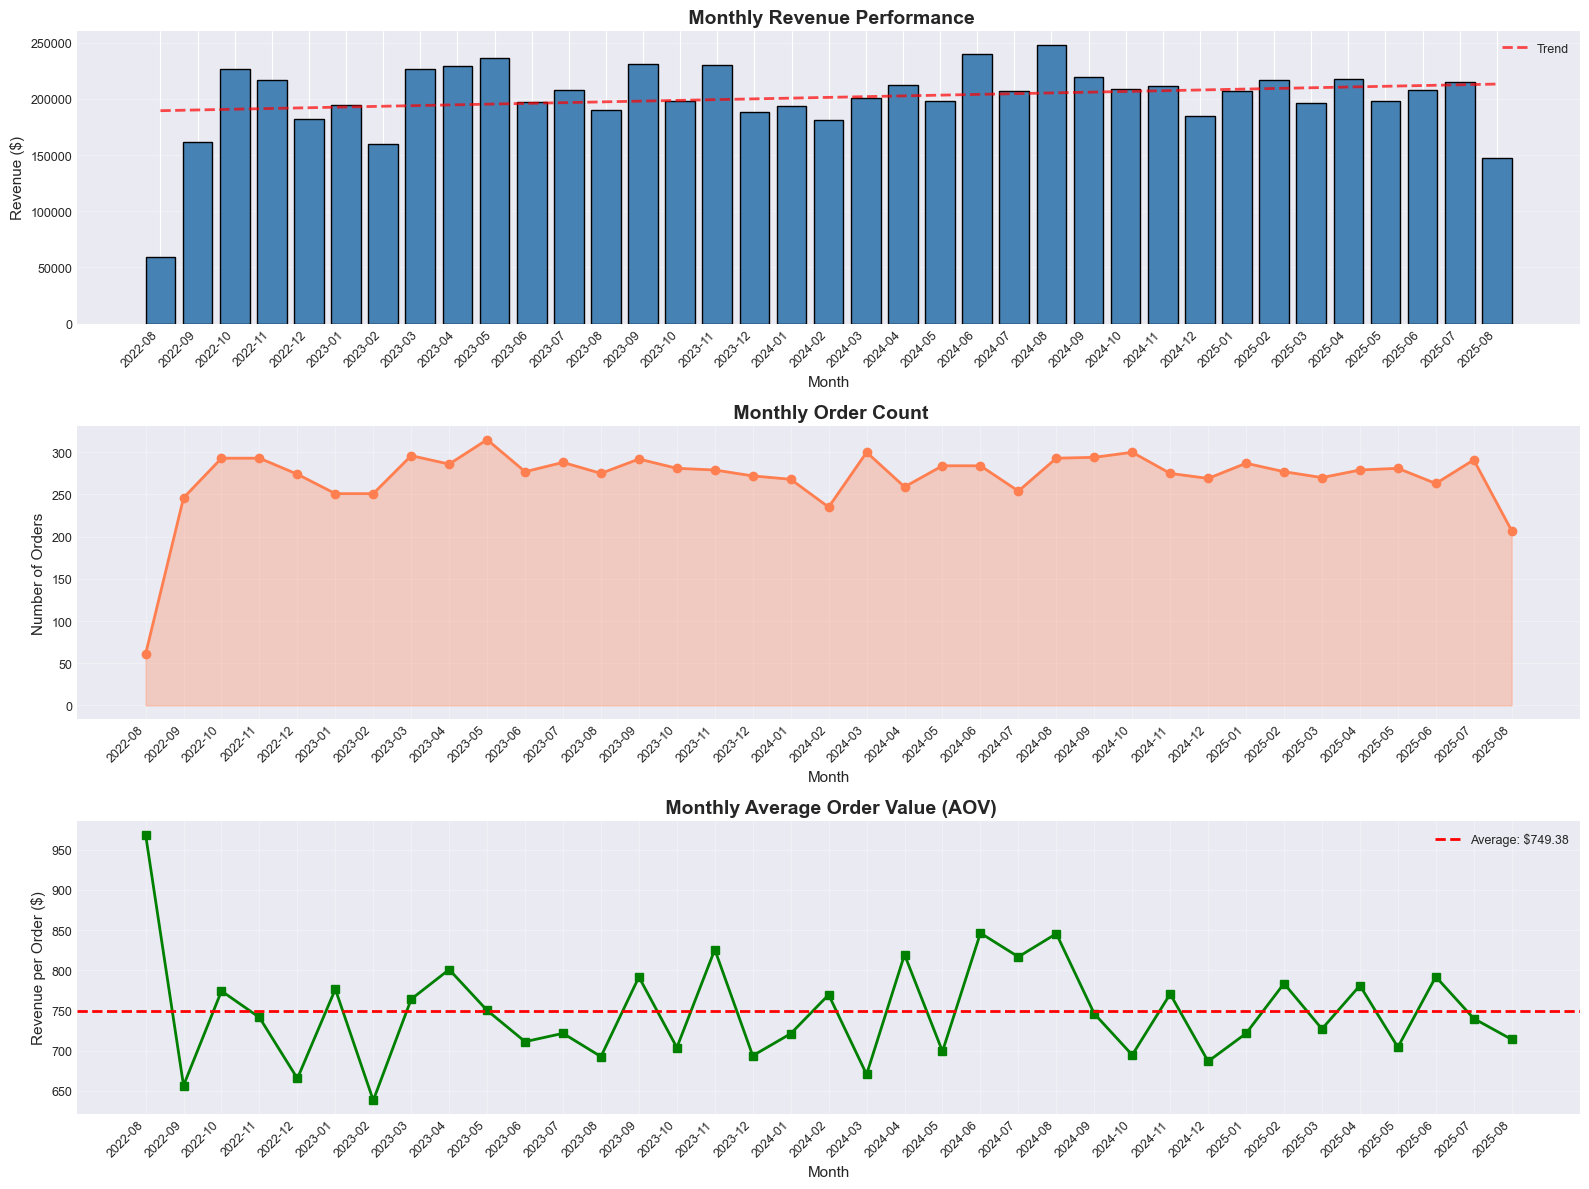

MONTHLY PERFORMANCE ANALYSIS

 Best Month: 2024-08
   Revenue: $247,751.00
   Orders: 293
   AOV: $845.57

 Worst Month: 2022-08
   Revenue: $59,094.00
   Orders: 61
   AOV: $968.75

 Peak-to-Trough Variation:
   Revenue Difference: $188,657.00
   Ratio: 4.19x

 Monthly sales analysis complete!


In [10]:
# Monthly aggregations
df_clean['year_month'] = df_clean['order_date'].dt.to_period('M')
monthly_stats = df_clean.groupby('year_month').agg({
    'order_id': 'count',
    'revenue': 'sum',
    'profit': 'sum'
}).reset_index()
monthly_stats.columns = ['year_month', 'order_count', 'revenue', 'profit']
monthly_stats['revenue_per_order'] = monthly_stats['revenue'] / monthly_stats['order_count']
monthly_stats['year_month_str'] = monthly_stats['year_month'].astype(str)

# Visualizations
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Monthly revenue
axes[0].bar(range(len(monthly_stats)), monthly_stats['revenue'], color='steelblue', edgecolor='black')
axes[0].set_title(' Monthly Revenue Performance', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Revenue ($)')
axes[0].set_xticks(range(len(monthly_stats)))
axes[0].set_xticklabels(monthly_stats['year_month_str'], rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Add trend line
z = np.polyfit(range(len(monthly_stats)), monthly_stats['revenue'], 1)
p = np.poly1d(z)
axes[0].plot(range(len(monthly_stats)), p(range(len(monthly_stats))), 
             "r--", linewidth=2, label='Trend', alpha=0.7)
axes[0].legend()

# Monthly orders
axes[1].plot(range(len(monthly_stats)), monthly_stats['order_count'], marker='o', 
             linewidth=2, markersize=6, color='coral')
axes[1].fill_between(range(len(monthly_stats)), monthly_stats['order_count'], alpha=0.3, color='coral')
axes[1].set_title(' Monthly Order Count', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Orders')
axes[1].set_xticks(range(len(monthly_stats)))
axes[1].set_xticklabels(monthly_stats['year_month_str'], rotation=45, ha='right')
axes[1].grid(alpha=0.3)

# Revenue per order (monthly AOV)
axes[2].plot(range(len(monthly_stats)), monthly_stats['revenue_per_order'], marker='s', 
             linewidth=2, markersize=6, color='green')
axes[2].set_title(' Monthly Average Order Value (AOV)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Revenue per Order ($)')
axes[2].set_xticks(range(len(monthly_stats)))
axes[2].set_xticklabels(monthly_stats['year_month_str'], rotation=45, ha='right')
axes[2].grid(alpha=0.3)
axes[2].axhline(monthly_stats['revenue_per_order'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Average: ${monthly_stats["revenue_per_order"].mean():.2f}')
axes[2].legend()

plt.tight_layout()
plt.show()

# Peak-to-trough analysis
peak_month = monthly_stats.loc[monthly_stats['revenue'].idxmax()]
trough_month = monthly_stats.loc[monthly_stats['revenue'].idxmin()]

print("="*80)
print("MONTHLY PERFORMANCE ANALYSIS")
print("="*80)
print(f"\n Best Month: {peak_month['year_month']}")
print(f"   Revenue: ${peak_month['revenue']:,.2f}")
print(f"   Orders: {peak_month['order_count']:,}")
print(f"   AOV: ${peak_month['revenue_per_order']:.2f}")

print(f"\n Worst Month: {trough_month['year_month']}")
print(f"   Revenue: ${trough_month['revenue']:,.2f}")
print(f"   Orders: {trough_month['order_count']:,}")
print(f"   AOV: ${trough_month['revenue_per_order']:.2f}")

print(f"\n Peak-to-Trough Variation:")
print(f"   Revenue Difference: ${peak_month['revenue'] - trough_month['revenue']:,.2f}")
print(f"   Ratio: {peak_month['revenue'] / trough_month['revenue']:.2f}x")

print("\n Monthly sales analysis complete!")

# Section 11: Sales Growth Rate Analysis

Analyzing month-over-month growth rates, acceleration/deceleration phases, and growth volatility.

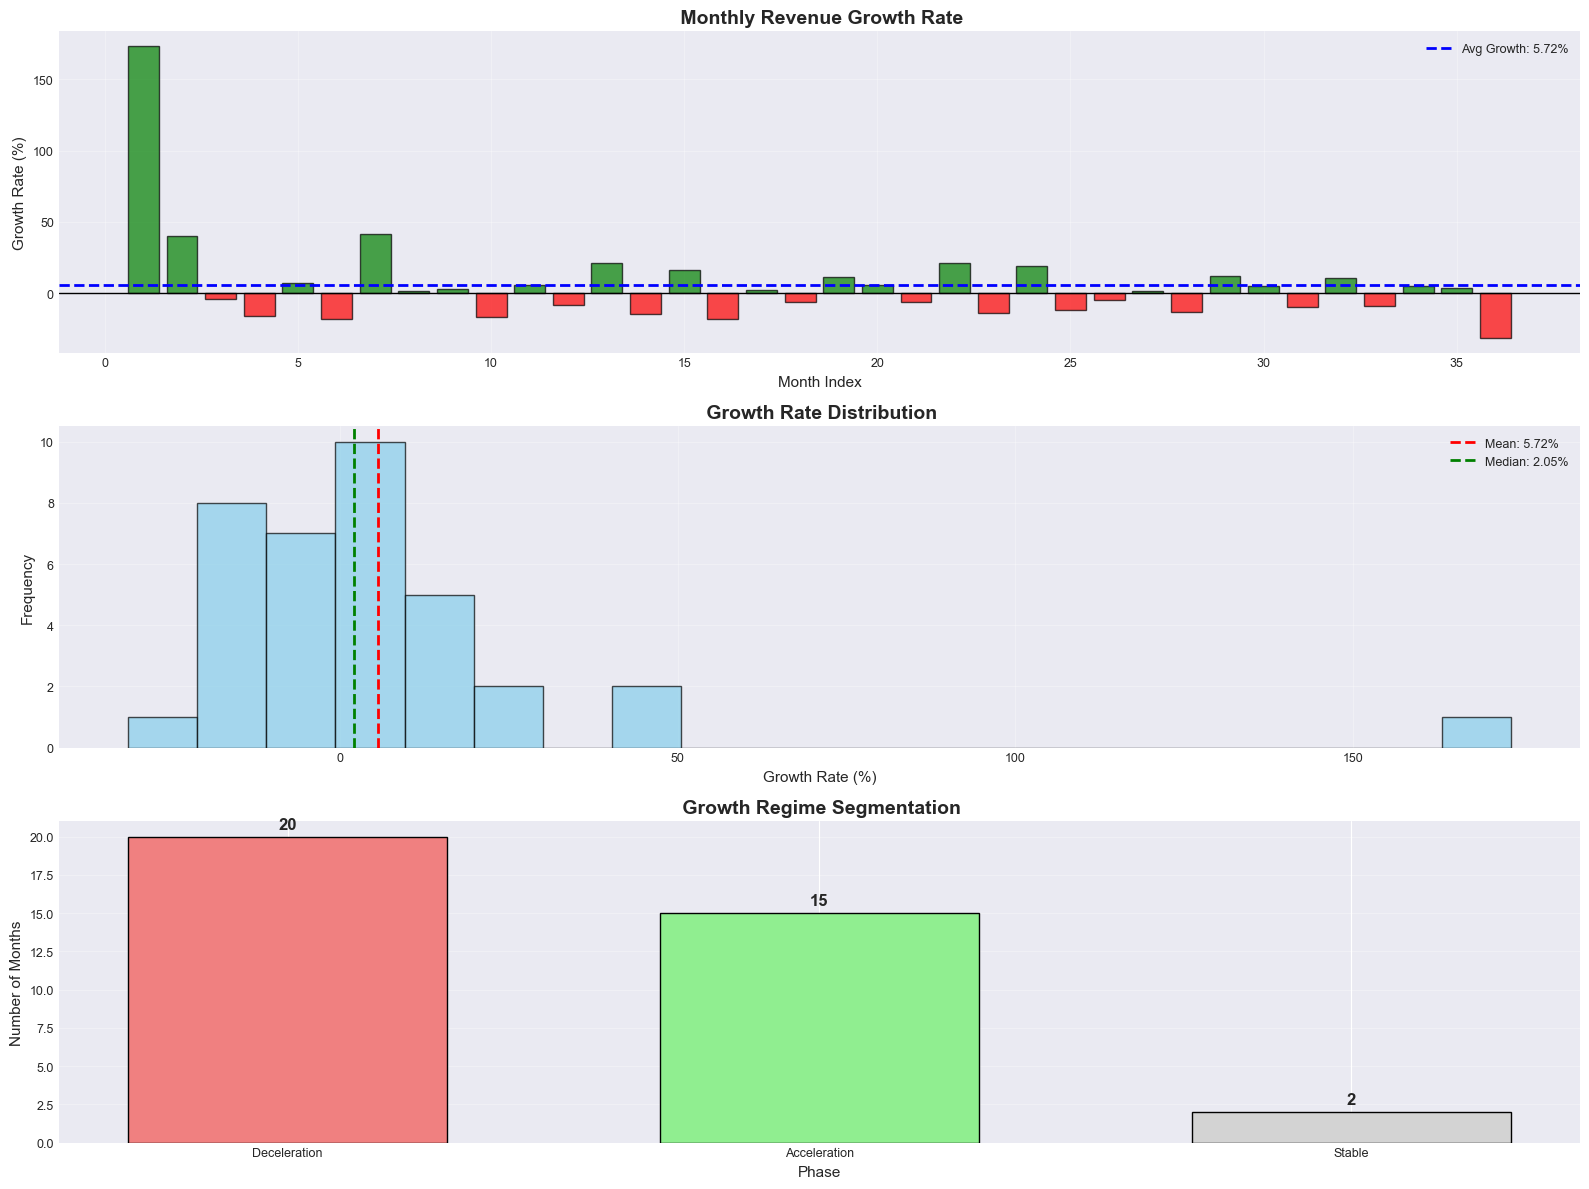

GROWTH RATE ANALYSIS

Average Monthly Growth Rate: 5.72%
Median Monthly Growth Rate: 2.05%
Growth Volatility (Std Dev): 32.76%
Max Growth: 173.36% in month 2022-09
Max Decline: -31.37% in month 2025-08

 Growth Phases:
  • Deceleration: 20 months (54.1%)
  • Acceleration: 15 months (40.5%)
  • Stable: 2 months (5.4%)

 Growth rate analysis complete!


In [11]:
# Calculate growth rates
monthly_stats_sorted = monthly_stats.sort_values('year_month').reset_index(drop=True)
monthly_stats_sorted['growth_rate'] = monthly_stats_sorted['revenue'].pct_change() * 100
monthly_stats_sorted['growth_volatility'] = monthly_stats_sorted['growth_rate'].rolling(3, min_periods=1).std()

# Identify acceleration vs deceleration phases
monthly_stats_sorted['growth_change'] = monthly_stats_sorted['growth_rate'].diff()
monthly_stats_sorted['phase'] = monthly_stats_sorted['growth_change'].apply(
    lambda x: 'Acceleration' if x > 0 else ('Deceleration' if x < 0 else 'Stable')
)

# Visualizations
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Growth Rate Line Chart
colors_growth = ['green' if x > 0 else 'red' for x in monthly_stats_sorted['growth_rate'].fillna(0)]
axes[0].bar(range(1, len(monthly_stats_sorted)), monthly_stats_sorted['growth_rate'][1:], 
            color=colors_growth[1:], edgecolor='black', alpha=0.7)
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[0].axhline(y=monthly_stats_sorted['growth_rate'].mean(), color='blue', linestyle='--', 
                linewidth=2, label=f'Avg Growth: {monthly_stats_sorted["growth_rate"].mean():.2f}%')
axes[0].set_title(' Monthly Revenue Growth Rate', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month Index')
axes[0].set_ylabel('Growth Rate (%)')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Growth Rate Histogram
axes[1].hist(monthly_stats_sorted['growth_rate'].dropna(), bins=20, color='skyblue', 
             edgecolor='black', alpha=0.7)
axes[1].axvline(monthly_stats_sorted['growth_rate'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {monthly_stats_sorted["growth_rate"].mean():.2f}%')
axes[1].axvline(monthly_stats_sorted['growth_rate'].median(), color='green', linestyle='--', 
                linewidth=2, label=f'Median: {monthly_stats_sorted["growth_rate"].median():.2f}%')
axes[1].set_title(' Growth Rate Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Growth Rate (%)')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Growth Regime Segmentation
phase_counts = monthly_stats_sorted['phase'].value_counts()
colors_phase = {'Acceleration': 'lightgreen', 'Deceleration': 'lightcoral', 'Stable': 'lightgray'}
axes[2].bar(phase_counts.index, phase_counts.values, 
            color=[colors_phase.get(x, 'gray') for x in phase_counts.index], 
            edgecolor='black', width=0.6)
axes[2].set_title(' Growth Regime Segmentation', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Phase')
axes[2].set_ylabel('Number of Months')
axes[2].grid(axis='y', alpha=0.3)
for i, (phase, count) in enumerate(phase_counts.items()):
    axes[2].text(i, count + 0.5, str(count), ha='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# Statistics
print("="*80)
print("GROWTH RATE ANALYSIS")
print("="*80)
print(f"\nAverage Monthly Growth Rate: {monthly_stats_sorted['growth_rate'].mean():.2f}%")
print(f"Median Monthly Growth Rate: {monthly_stats_sorted['growth_rate'].median():.2f}%")
print(f"Growth Volatility (Std Dev): {monthly_stats_sorted['growth_rate'].std():.2f}%")
print(f"Max Growth: {monthly_stats_sorted['growth_rate'].max():.2f}% in month {monthly_stats_sorted.loc[monthly_stats_sorted['growth_rate'].idxmax(), 'year_month']}")
print(f"Max Decline: {monthly_stats_sorted['growth_rate'].min():.2f}% in month {monthly_stats_sorted.loc[monthly_stats_sorted['growth_rate'].idxmin(), 'year_month']}")

print(f"\n Growth Phases:")
for phase, count in phase_counts.items():
    print(f"  • {phase}: {count} months ({count/len(monthly_stats_sorted)*100:.1f}%)")

print("\n Growth rate analysis complete!")

# Section 12: Seasonal Sales Behaviour

Analyzing seasonal patterns with month×year heatmaps, seasonal indices, and year-over-year comparisons.

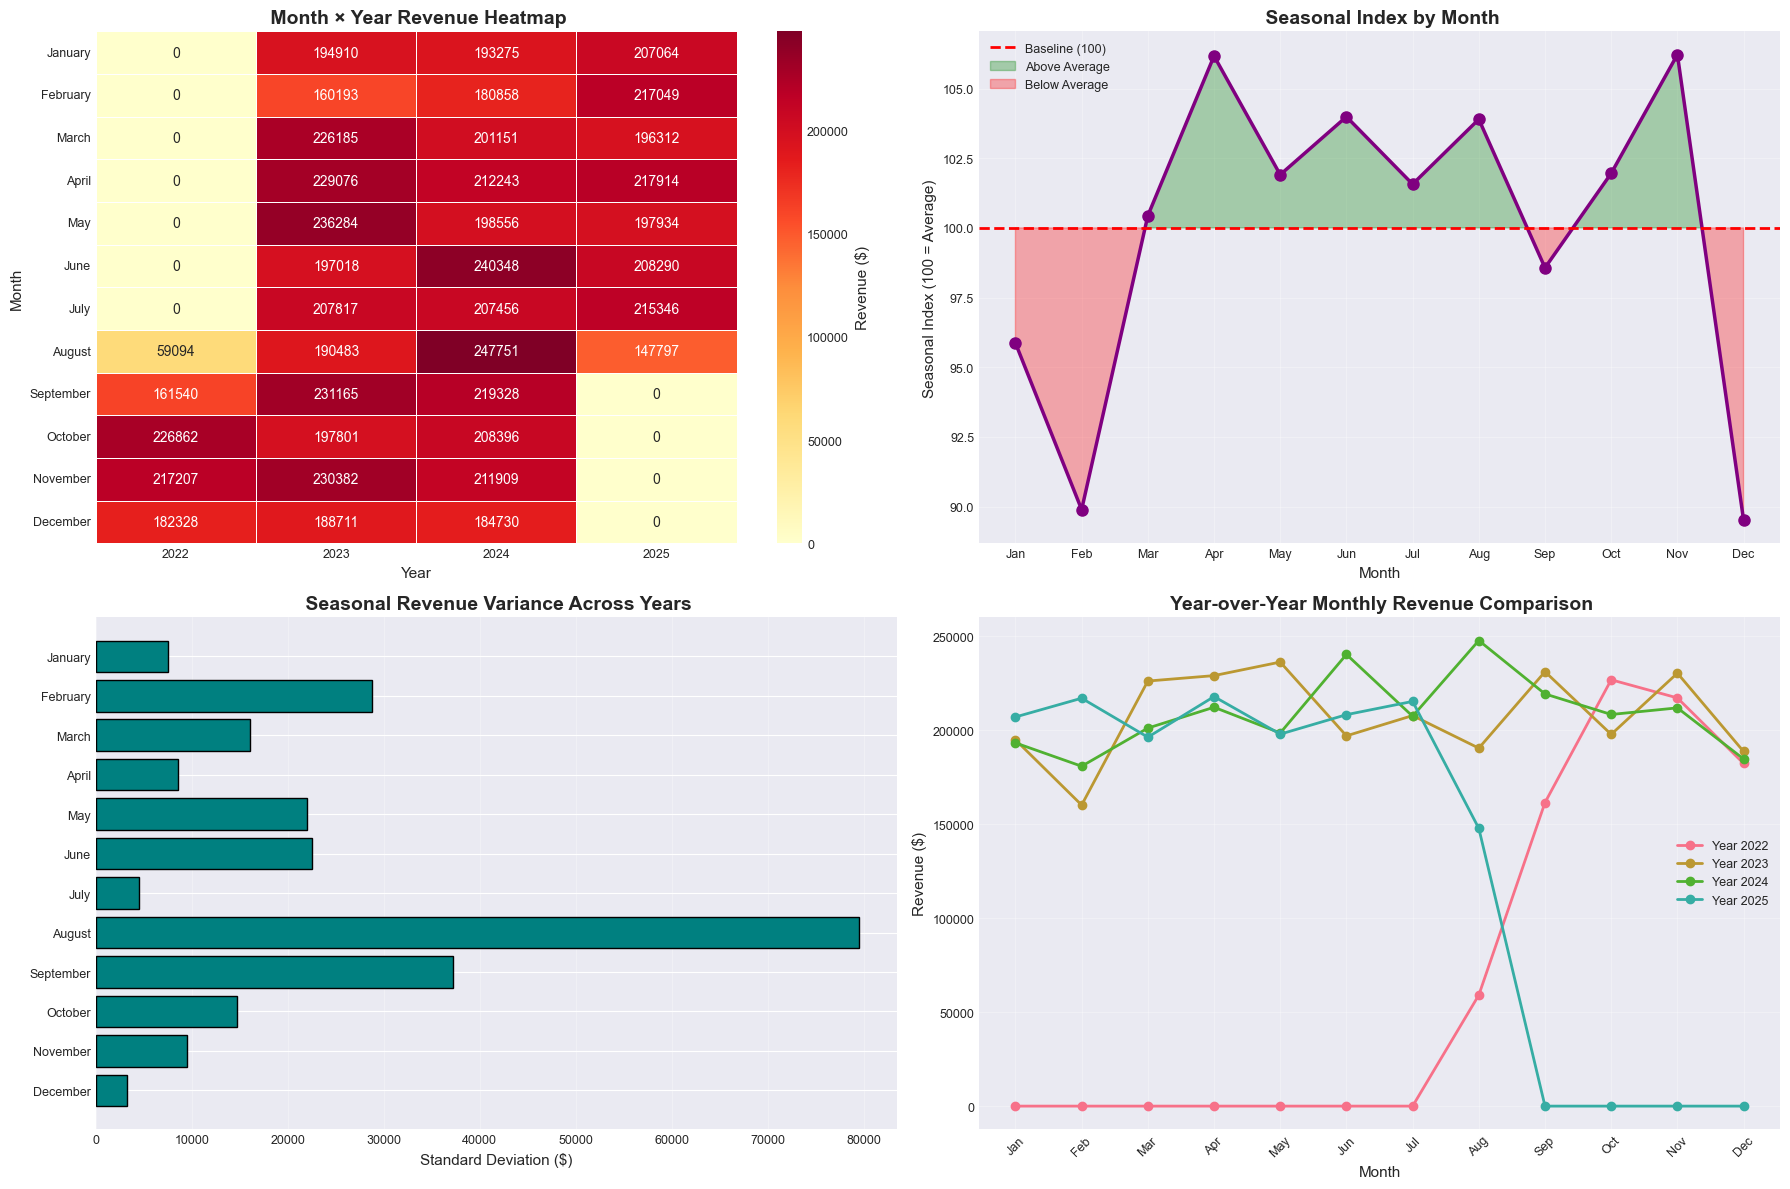

SEASONAL BEHAVIOR ANALYSIS

 Peak Seasonal Months:
  • Month 11: Index 106.22 (+6.2% vs baseline)
  • Month 4: Index 106.17 (+6.2% vs baseline)
  • Month 6: Index 103.99 (+4.0% vs baseline)

 Low Seasonal Months:
  • Month 12: Index 89.51 (-10.5% vs baseline)
  • Month 2: Index 89.89 (-10.1% vs baseline)
  • Month 1: Index 95.87 (-4.1% vs baseline)

 Seasonal Strength:
  • Standard Deviation of Seasonal Index: 5.64
  • Interpretation: WEAK seasonality - relatively stable across months

 Seasonal analysis complete!


In [12]:
# Seasonal analysis
df_clean['month_name'] = df_clean['order_date'].dt.month_name()
seasonal_revenue = df_clean.groupby(['order_year', 'month_name'])['revenue'].sum().reset_index()
seasonal_pivot = seasonal_revenue.pivot(index='month_name', columns='order_year', values='revenue')

# Reorder months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
seasonal_pivot = seasonal_pivot.reindex(month_order)

# Calculate seasonal index (100 = average month)
monthly_avg_revenue = df_clean.groupby('order_month')['revenue'].sum()
overall_monthly_avg = monthly_avg_revenue.mean()
seasonal_index = (monthly_avg_revenue / overall_monthly_avg * 100).round(2)

# Calculate seasonal variance
seasonal_variance = seasonal_pivot.std(axis=1)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Month × Year Heatmap
sns.heatmap(seasonal_pivot.fillna(0), annot=True, fmt='.0f', cmap='YlOrRd', 
            cbar_kws={'label': 'Revenue ($)'}, ax=axes[0, 0], linewidths=0.5)
axes[0, 0].set_title(' Month × Year Revenue Heatmap', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Month')

# Seasonal Index Line Plot
axes[0, 1].plot(range(1, 13), seasonal_index.values, marker='o', linewidth=2.5, 
                markersize=8, color='purple')
axes[0, 1].axhline(y=100, color='red', linestyle='--', linewidth=2, label='Baseline (100)')
axes[0, 1].fill_between(range(1, 13), seasonal_index.values, 100, 
                        where=(seasonal_index.values >= 100), alpha=0.3, color='green', 
                        interpolate=True, label='Above Average')
axes[0, 1].fill_between(range(1, 13), seasonal_index.values, 100, 
                        where=(seasonal_index.values < 100), alpha=0.3, color='red', 
                        interpolate=True, label='Below Average')
axes[0, 1].set_title(' Seasonal Index by Month', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Seasonal Index (100 = Average)')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Seasonal Variance Bar Chart
axes[1, 0].barh(range(len(seasonal_variance)), seasonal_variance.values, 
                color='teal', edgecolor='black')
axes[1, 0].set_yticks(range(len(seasonal_variance)))
axes[1, 0].set_yticklabels(seasonal_variance.index)
axes[1, 0].set_title(' Seasonal Revenue Variance Across Years', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Standard Deviation ($)')
axes[1, 0].grid(axis='x', alpha=0.3)
axes[1, 0].invert_yaxis()

# Year-over-Year Comparison
if seasonal_pivot.shape[1] > 1:
    for col in seasonal_pivot.columns:
        axes[1, 1].plot(range(12), seasonal_pivot[col].fillna(0).values, 
                       marker='o', label=f'Year {col}', linewidth=2)
    axes[1, 1].set_title(' Year-over-Year Monthly Revenue Comparison', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Month')
    axes[1, 1].set_ylabel('Revenue ($)')
    axes[1, 1].set_xticks(range(12))
    axes[1, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
    axes[1, 1].legend()
    axes[1, 1].grid(alpha=0.3)
else:
    axes[1, 1].text(0.5, 0.5, 'Insufficient data for\nyear-over-year comparison', 
                   ha='center', va='center', fontsize=12, transform=axes[1, 1].transAxes)
    axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Insights
print("="*80)
print("SEASONAL BEHAVIOR ANALYSIS")
print("="*80)
print(f"\n Peak Seasonal Months:")
for month, idx in seasonal_index.nlargest(3).items():
    print(f"  • Month {month}: Index {idx:.2f} ({idx-100:+.1f}% vs baseline)")

print(f"\n Low Seasonal Months:")
for month, idx in seasonal_index.nsmallest(3).items():
    print(f"  • Month {month}: Index {idx:.2f} ({idx-100:+.1f}% vs baseline)")

print(f"\n Seasonal Strength:")
seasonal_strength = seasonal_index.std()
print(f"  • Standard Deviation of Seasonal Index: {seasonal_strength:.2f}")
if seasonal_strength > 20:
    print(f"  • Interpretation: STRONG seasonality - significant variation across months")
elif seasonal_strength > 10:
    print(f"  • Interpretation: MODERATE seasonality - noticeable variation across months")
else:
    print(f"  • Interpretation: WEAK seasonality - relatively stable across months")

print("\n Seasonal analysis complete!")

# Section 13: Customer Buying Pattern by Weekday

Analyzing day-of-week patterns including order counts, revenue, average order value, and variance.

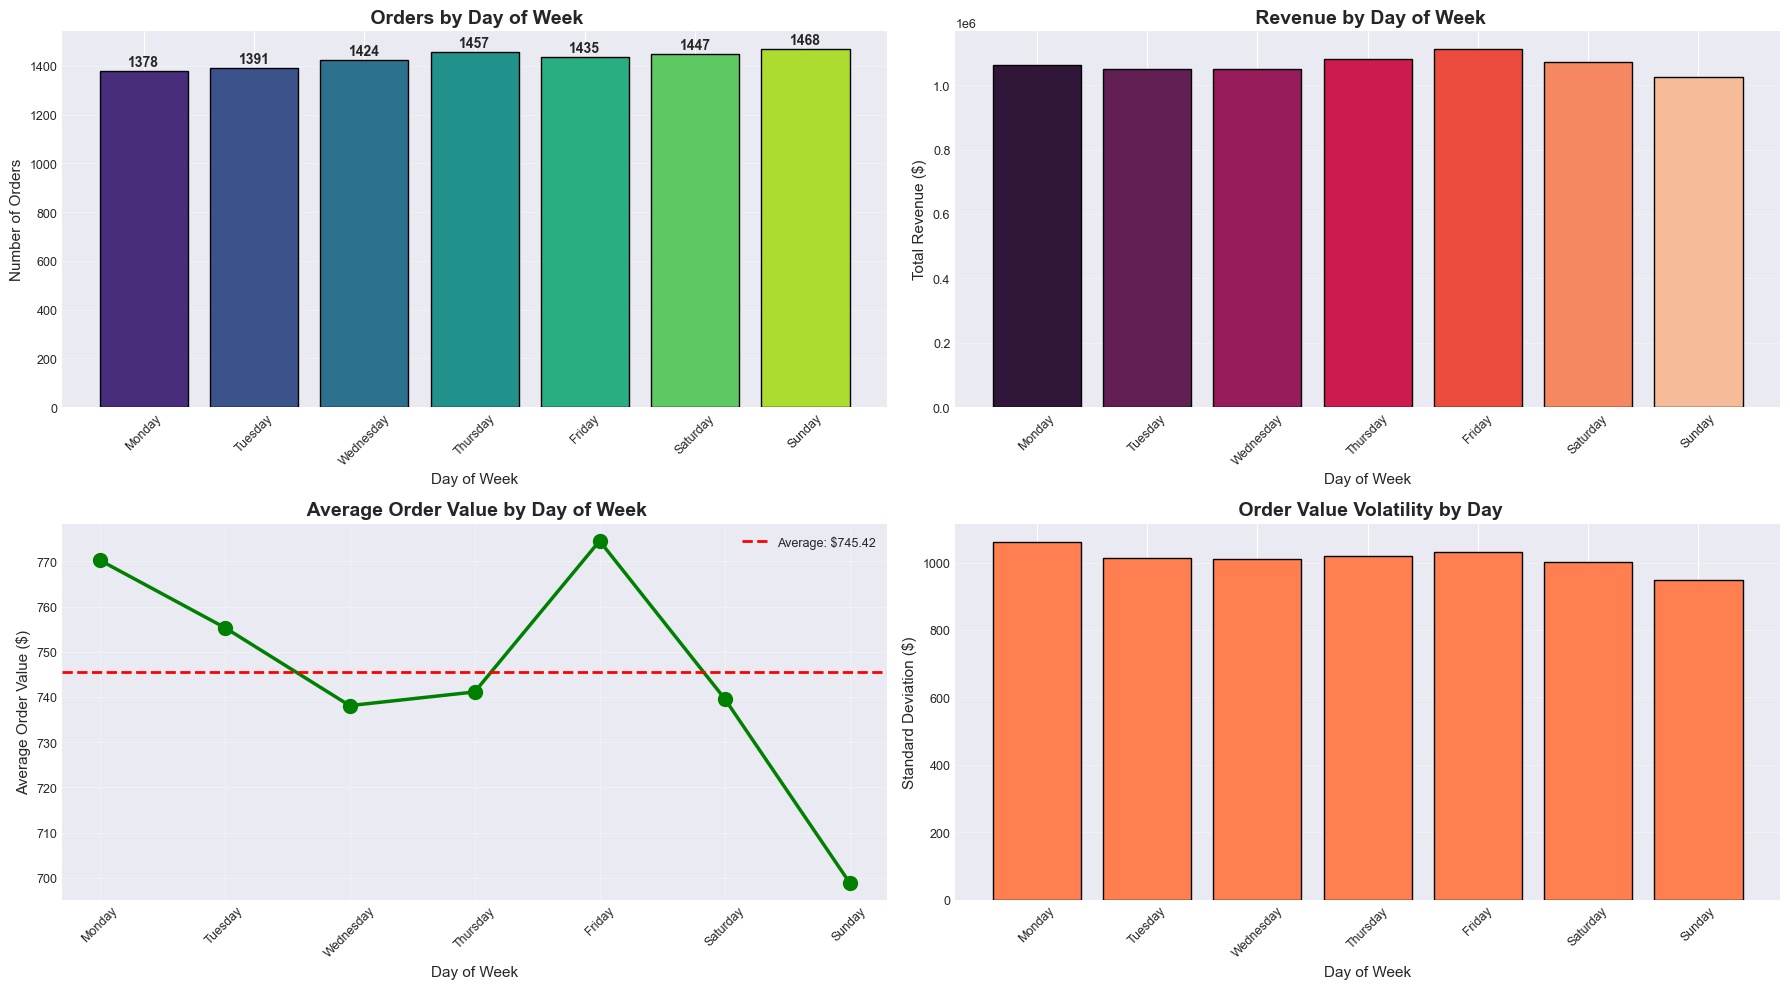

WEEKDAY PATTERN ANALYSIS

 Best Day of Week:
  • Day: Friday
  • Revenue: $1,111,444.00
  • Orders: 1,435
  • AOV: $774.53

 Worst Day of Week:
  • Day: Sunday
  • Revenue: $1,026,066.00
  • Orders: 1,468
  • AOV: $698.96

 Highest AOV Day:
  • Day: Friday
  • AOV: $774.53
  • Efficiency Index: 103.90

 Day-to-Day Variation:
  • Revenue Range: $85,378.00
  • Coefficient of Variation: 2.52%

 Weekday pattern analysis complete!


In [13]:
# Weekday analysis
weekday_stats = df_clean.groupby('order_day_of_week').agg({
    'order_id': 'count',
    'revenue': ['sum', 'mean', 'std']
}).reset_index()
weekday_stats.columns = ['day_of_week', 'order_count', 'total_revenue', 'avg_order_value', 'std_order_value']

# Order days properly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_stats['day_of_week'] = pd.Categorical(weekday_stats['day_of_week'], 
                                                categories=day_order, ordered=True)
weekday_stats = weekday_stats.sort_values('day_of_week')

# Calculate efficiency metrics
weekday_stats['revenue_per_order'] = weekday_stats['total_revenue'] / weekday_stats['order_count']
weekday_stats['revenue_efficiency'] = (weekday_stats['revenue_per_order'] / weekday_stats['revenue_per_order'].mean() * 100).round(2)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Orders by Weekday
axes[0, 0].bar(weekday_stats['day_of_week'], weekday_stats['order_count'], 
               color=sns.color_palette('viridis', 7), edgecolor='black')
axes[0, 0].set_title(' Orders by Day of Week', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Day of Week')
axes[0, 0].set_ylabel('Number of Orders')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)
for i, row in weekday_stats.iterrows():
    axes[0, 0].text(row['day_of_week'], row['order_count'] + 20, 
                    str(row['order_count']), ha='center', fontweight='bold')

# Revenue by Weekday
axes[0, 1].bar(weekday_stats['day_of_week'], weekday_stats['total_revenue'], 
               color=sns.color_palette('rocket', 7), edgecolor='black')
axes[0, 1].set_title(' Revenue by Day of Week', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Total Revenue ($)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Average Order Value by Weekday
axes[1, 0].plot(weekday_stats['day_of_week'], weekday_stats['avg_order_value'], 
                marker='o', linewidth=2.5, markersize=10, color='green')
axes[1, 0].axhline(weekday_stats['avg_order_value'].mean(), color='red', 
                   linestyle='--', linewidth=2, label=f'Average: ${weekday_stats["avg_order_value"].mean():.2f}')
axes[1, 0].set_title(' Average Order Value by Day of Week', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Average Order Value ($)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Standard Deviation of Orders
axes[1, 1].bar(weekday_stats['day_of_week'], weekday_stats['std_order_value'], 
               color='coral', edgecolor='black')
axes[1, 1].set_title(' Order Value Volatility by Day', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Standard Deviation ($)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Insights
print("="*80)
print("WEEKDAY PATTERN ANALYSIS")
print("="*80)
print(f"\n Best Day of Week:")
best_day = weekday_stats.loc[weekday_stats['total_revenue'].idxmax()]
print(f"  • Day: {best_day['day_of_week']}")
print(f"  • Revenue: ${best_day['total_revenue']:,.2f}")
print(f"  • Orders: {best_day['order_count']:,}")
print(f"  • AOV: ${best_day['avg_order_value']:.2f}")

print(f"\n Worst Day of Week:")
worst_day = weekday_stats.loc[weekday_stats['total_revenue'].idxmin()]
print(f"  • Day: {worst_day['day_of_week']}")
print(f"  • Revenue: ${worst_day['total_revenue']:,.2f}")
print(f"  • Orders: {worst_day['order_count']:,}")
print(f"  • AOV: ${worst_day['avg_order_value']:.2f}")

print(f"\n Highest AOV Day:")
high_aov_day = weekday_stats.loc[weekday_stats['avg_order_value'].idxmax()]
print(f"  • Day: {high_aov_day['day_of_week']}")
print(f"  • AOV: ${high_aov_day['avg_order_value']:.2f}")
print(f"  • Efficiency Index: {high_aov_day['revenue_efficiency']:.2f}")

print(f"\n Day-to-Day Variation:")
revenue_range = weekday_stats['total_revenue'].max() - weekday_stats['total_revenue'].min()
print(f"  • Revenue Range: ${revenue_range:,.2f}")
print(f"  • Coefficient of Variation: {weekday_stats['total_revenue'].std() / weekday_stats['total_revenue'].mean() * 100:.2f}%")

print("\n Weekday pattern analysis complete!")

# Section 14: Best and Worst Performing Products

Analyzing product performance with revenue rankings, Pareto analysis, and concentration metrics.

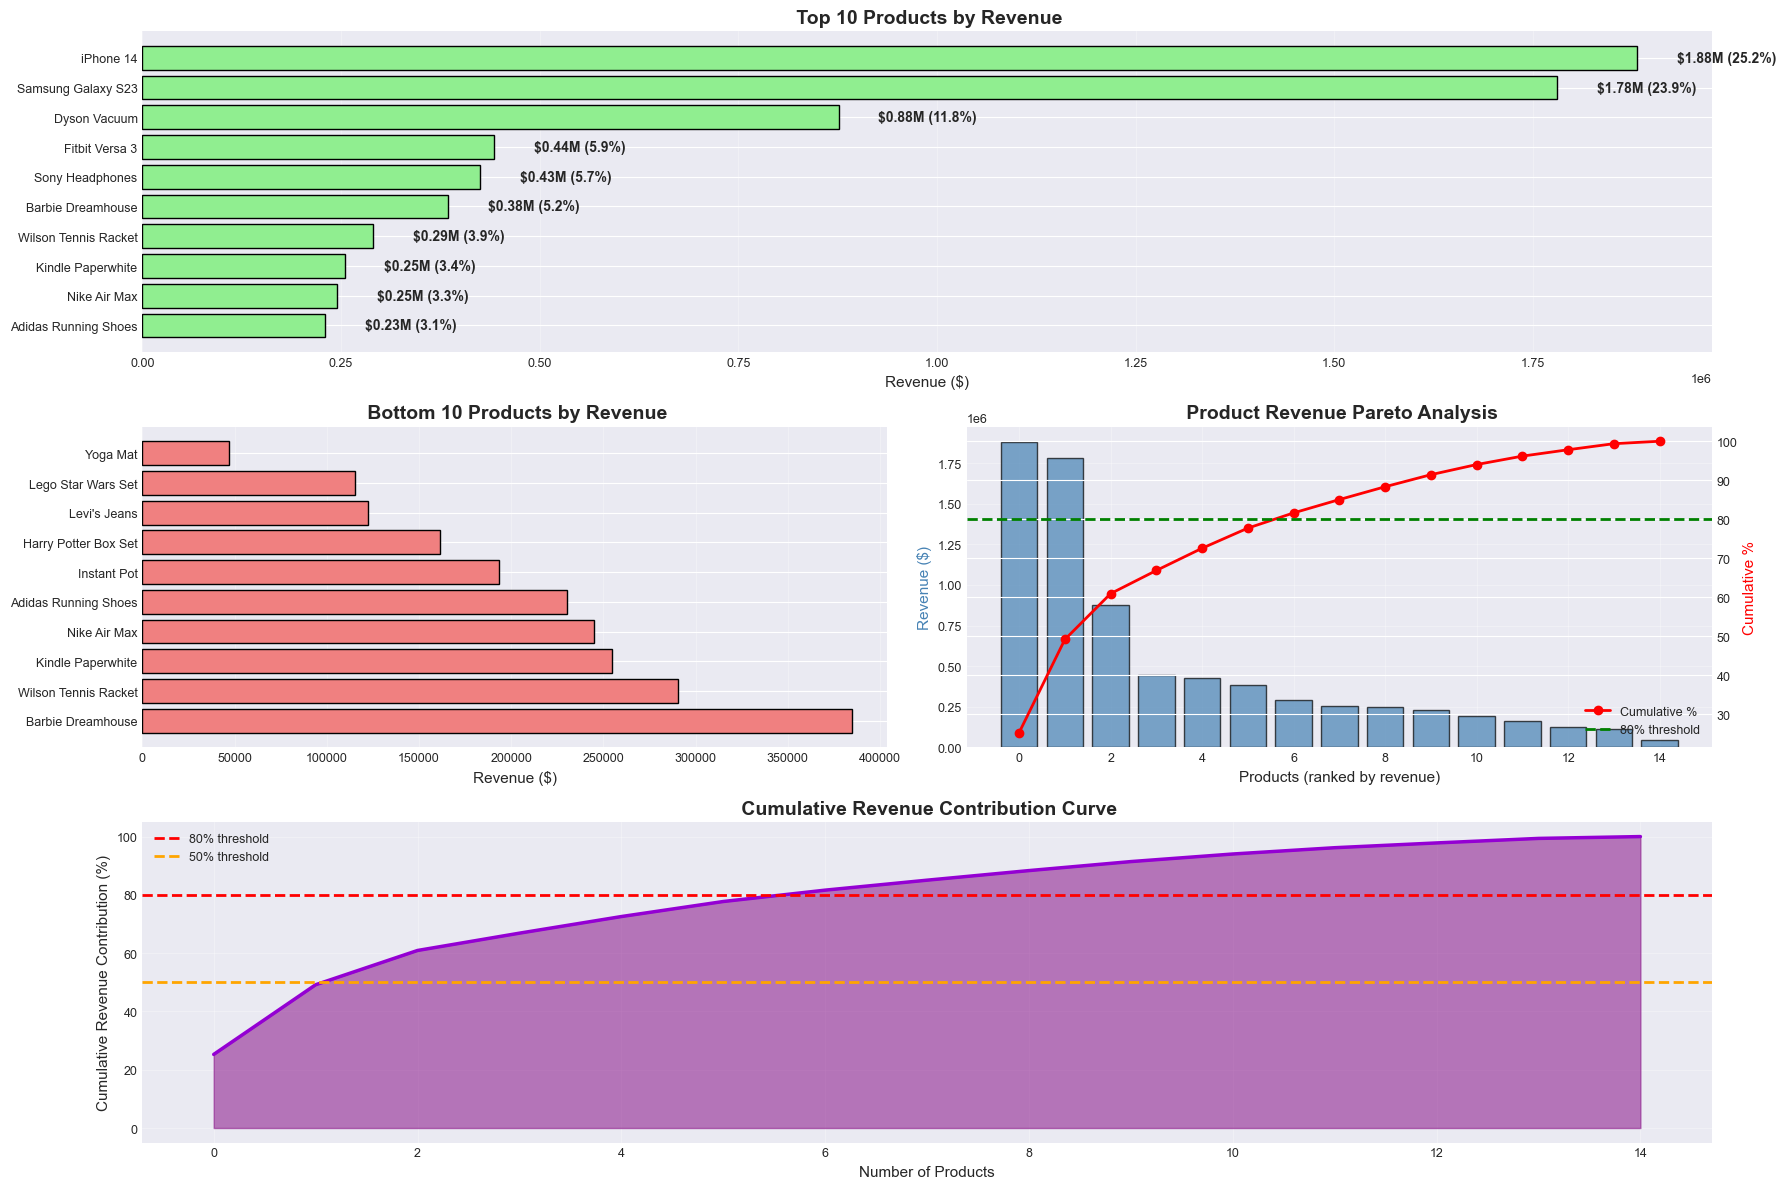

PRODUCT PERFORMANCE INSIGHTS

 Top 3 Products by Revenue:
  15. iPhone 14
     Revenue: $1,881,117.00 (25.2% of total)
     Orders: 625 | Quantity: 1,883
  11. Samsung Galaxy S23
     Revenue: $1,780,919.00 (23.9% of total)
     Orders: 643 | Quantity: 1,981
  3. Dyson Vacuum
     Revenue: $876,204.00 (11.8% of total)
     Orders: 730 | Quantity: 2,196

 Bottom 3 Products by Revenue:
  • Levi's Jeans: $122,366.00 (1.6% of total)
  • Lego Star Wars Set: $115,227.00 (1.6% of total)
  • Yoga Mat: $47,250.00 (0.6% of total)

 Pareto Principle (80/20 Rule):
  • Top 6 products (40.0%) generate 80% of revenue
  • Concentration Risk: MODERATE

 Product Dependency Ratio:
  • Top 5 products contribute: $5,406,190.00 (72.6% of total)

 Product performance analysis complete!


In [14]:
# Product performance analysis
product_performance = df_clean.groupby('product_name').agg({
    'revenue': 'sum',
    'profit': 'sum',
    'order_id': 'count',
    'quantity': 'sum'
}).reset_index()
product_performance.columns = ['product_name', 'revenue', 'profit', 'orders', 'quantity']
product_performance = product_performance.sort_values('revenue', ascending=False)
product_performance['revenue_pct'] = (product_performance['revenue'] / product_performance['revenue'].sum() * 100).round(2)
product_performance['cumulative_revenue_pct'] = product_performance['revenue_pct'].cumsum()

# Visualizations
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(3, 2, figure=fig)

# Top 10 Products
ax1 = fig.add_subplot(gs[0, :])
top_10 = product_performance.head(10)
bars = ax1.barh(range(len(top_10)), top_10['revenue'], color='lightgreen', edgecolor='black')
ax1.set_yticks(range(len(top_10)))
ax1.set_yticklabels(top_10['product_name'])
ax1.set_xlabel('Revenue ($)')
ax1.set_title(' Top 10 Products by Revenue', fontsize=14, fontweight='bold')
ax1.invert_yaxis()
for i, (bar, rev, pct) in enumerate(zip(bars, top_10['revenue'], top_10['revenue_pct'])):
    ax1.text(rev + 50000, bar.get_y() + bar.get_height()/2, 
             f'${rev/1e6:.2f}M ({pct:.1f}%)', va='center', fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Bottom 10 Products
ax2 = fig.add_subplot(gs[1, 0])
bottom_10 = product_performance.tail(10)
ax2.barh(range(len(bottom_10)), bottom_10['revenue'], color='lightcoral', edgecolor='black')
ax2.set_yticks(range(len(bottom_10)))
ax2.set_yticklabels(bottom_10['product_name'])
ax2.set_xlabel('Revenue ($)')
ax2.set_title(' Bottom 10 Products by Revenue', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Pareto Chart
ax3 = fig.add_subplot(gs[1, 1])
ax3.bar(range(len(product_performance)), product_performance['revenue'], 
        color='steelblue', edgecolor='black', alpha=0.7)
ax3_twin = ax3.twinx()
ax3_twin.plot(range(len(product_performance)), product_performance['cumulative_revenue_pct'], 
              color='red', marker='o', linewidth=2, markersize=6, label='Cumulative %')
ax3_twin.axhline(y=80, color='green', linestyle='--', linewidth=2, label='80% threshold')
ax3.set_xlabel('Products (ranked by revenue)')
ax3.set_ylabel('Revenue ($)', color='steelblue')
ax3_twin.set_ylabel('Cumulative %', color='red')
ax3.set_title(' Product Revenue Pareto Analysis', fontsize=14, fontweight='bold')
ax3_twin.legend(loc='lower right')
ax3.grid(alpha=0.3)

# Cumulative Contribution Curve
ax4 = fig.add_subplot(gs[2, :])
ax4.fill_between(range(len(product_performance)), 
                 product_performance['cumulative_revenue_pct'], 
                 alpha=0.5, color='purple')
ax4.plot(range(len(product_performance)), product_performance['cumulative_revenue_pct'], 
         linewidth=2.5, color='darkviolet')
ax4.axhline(y=80, color='red', linestyle='--', linewidth=2, label='80% threshold')
ax4.axhline(y=50, color='orange', linestyle='--', linewidth=2, label='50% threshold')
ax4.set_xlabel('Number of Products')
ax4.set_ylabel('Cumulative Revenue Contribution (%)')
ax4.set_title(' Cumulative Revenue Contribution Curve', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Insights
print("="*80)
print("PRODUCT PERFORMANCE INSIGHTS")
print("="*80)
print(f"\n Top 3 Products by Revenue:")
for i, row in product_performance.head(3).iterrows():
    print(f"  {i+1}. {row['product_name']}")
    print(f"     Revenue: ${row['revenue']:,.2f} ({row['revenue_pct']:.1f}% of total)")
    print(f"     Orders: {row['orders']:,} | Quantity: {row['quantity']:,}")

print(f"\n Bottom 3 Products by Revenue:")
for i, row in product_performance.tail(3).iterrows():
    print(f"  • {row['product_name']}: ${row['revenue']:,.2f} ({row['revenue_pct']:.1f}% of total)")

# 80/20 rule
products_for_80pct = len(product_performance[product_performance['cumulative_revenue_pct'] <= 80])
print(f"\n Pareto Principle (80/20 Rule):")
print(f"  • Top {products_for_80pct} products ({products_for_80pct/len(product_performance)*100:.1f}%) generate 80% of revenue")
print(f"  • Concentration Risk: {'HIGH' if products_for_80pct <= 5 else 'MODERATE' if products_for_80pct <= 10 else 'LOW'}")

print(f"\n Product Dependency Ratio:")
top_5_revenue = product_performance.head(5)['revenue'].sum()
total_revenue = product_performance['revenue'].sum()
print(f"  • Top 5 products contribute: ${top_5_revenue:,.2f} ({top_5_revenue/total_revenue*100:.1f}% of total)")

print("\n Product performance analysis complete!")

# Section 15: Category-Wise Sales Analysis

Analyzing revenue, profit, growth momentum, and diversification across product categories.

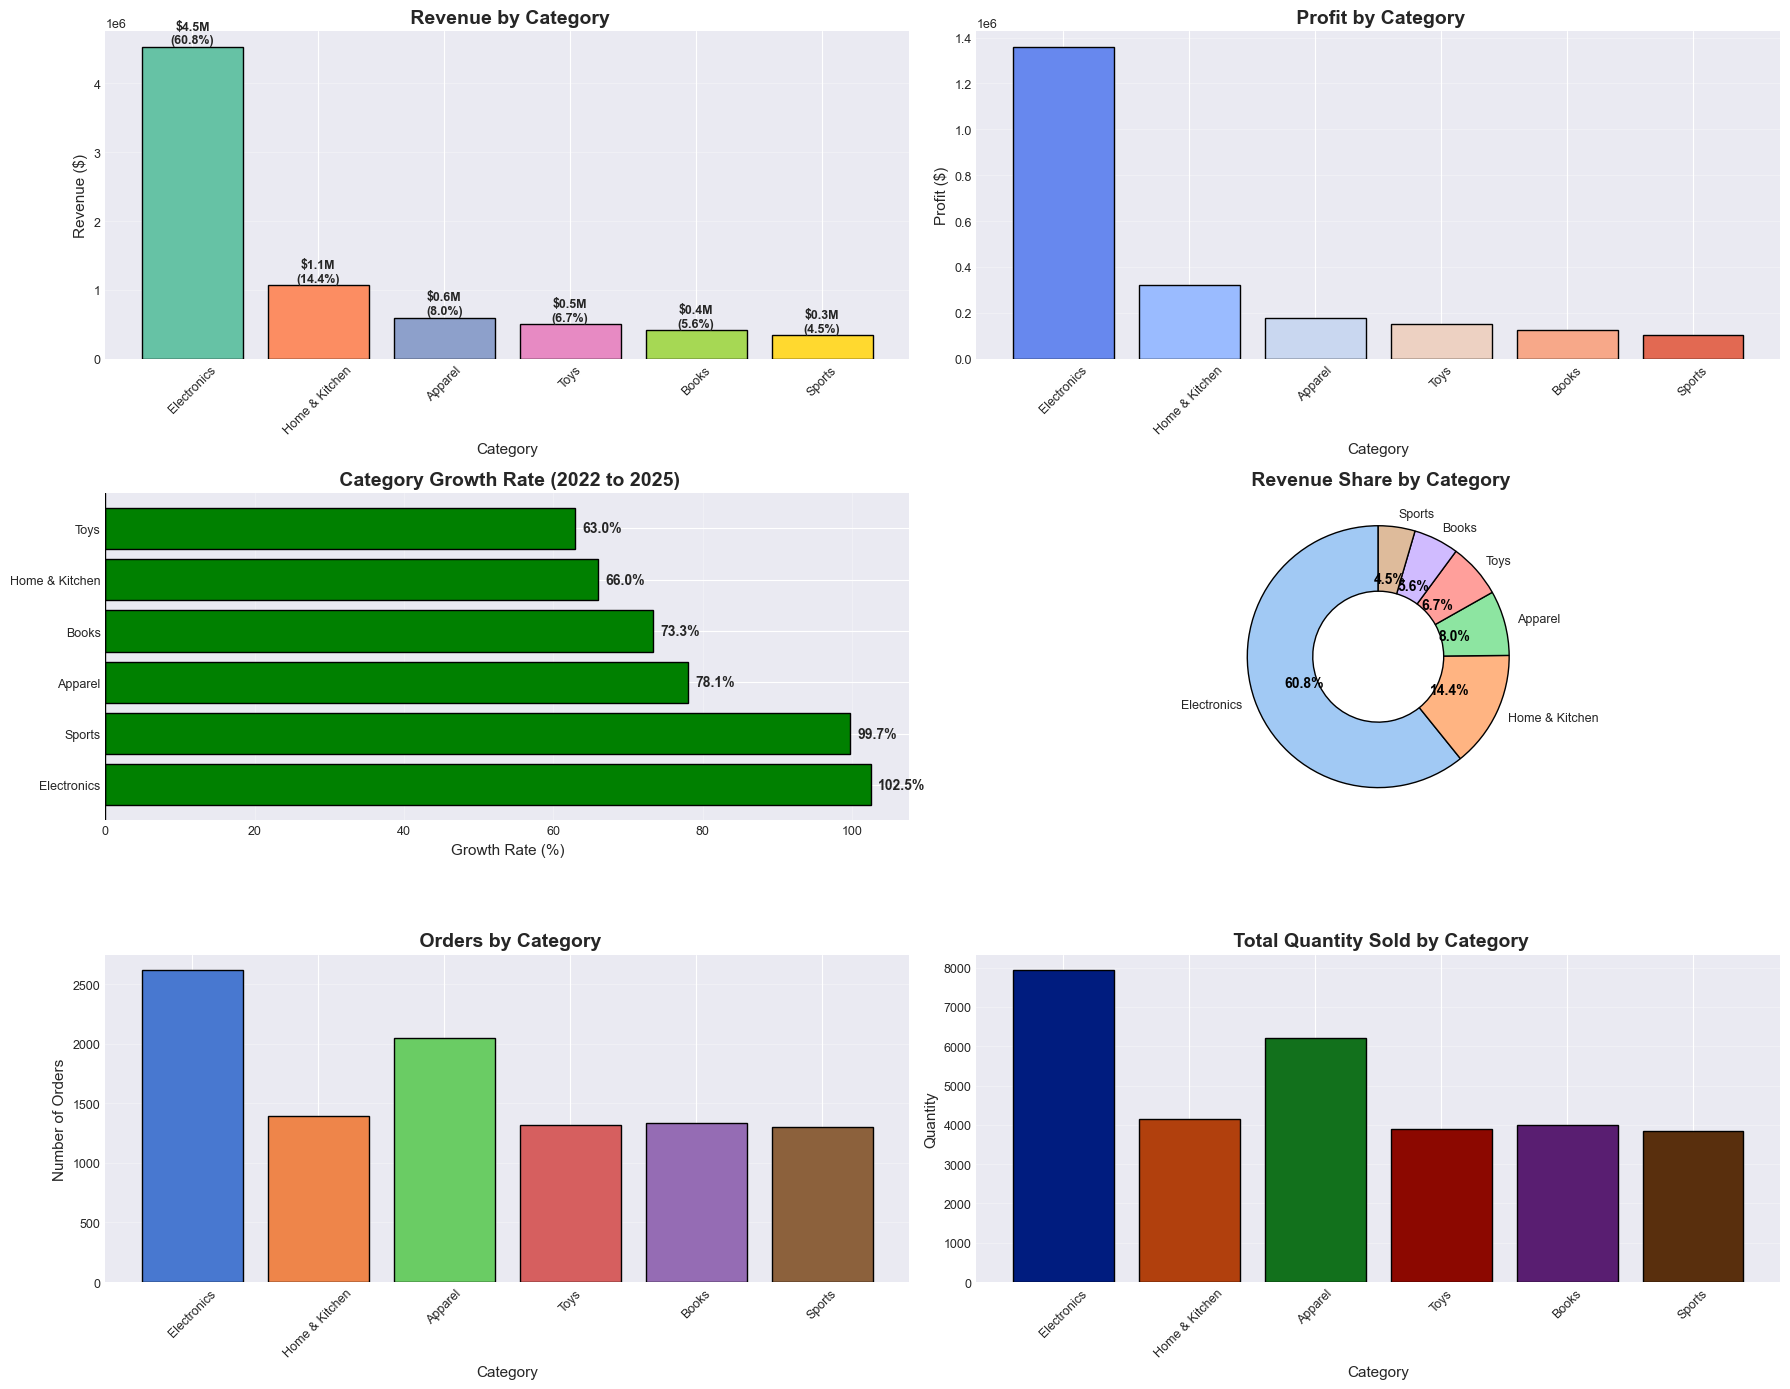

CATEGORY PERFORMANCE INSIGHTS

 Top 3 Categories by Revenue:
  3. Electronics
     Revenue: $4,529,986.00 (60.8% of total)
     Profit: $1,358,995.80
     Orders: 2,616
  4. Home & Kitchen
     Revenue: $1,069,650.00 (14.4% of total)
     Profit: $320,895.00
     Orders: 1,391
  1. Apparel
     Revenue: $597,636.00 (8.0% of total)
     Profit: $179,290.80
     Orders: 2,047

 Category Diversification:
  • Total Categories: 6
  • Revenue Concentration (Top 3): 83.2%
  • HHI Index: 4063.85 (HIGH concentration)

 Fastest Growing Category:
  • Electronics: 102.53% growth

 Declining Category:
  • Toys: 62.95% growth

 Category analysis complete!


In [15]:
# Category performance analysis
category_performance = df_clean.groupby('category').agg({
    'revenue': 'sum',
    'profit': 'sum',
    'order_id': 'count',
    'quantity': 'sum'
}).reset_index()
category_performance.columns = ['category', 'revenue', 'profit', 'orders', 'quantity']
category_performance = category_performance.sort_values('revenue', ascending=False)
category_performance['revenue_share'] = (category_performance['revenue'] / category_performance['revenue'].sum() * 100).round(2)

# Calculate category growth (if multiple years)
category_growth = df_clean.groupby(['category', 'order_year'])['revenue'].sum().reset_index()
category_growth_pivot = category_growth.pivot(index='category', columns='order_year', values='revenue')
if category_growth_pivot.shape[1] > 1:
    first_year = category_growth_pivot.columns[0]
    last_year = category_growth_pivot.columns[-1]
    category_growth_pivot['growth_rate'] = ((category_growth_pivot[last_year] - category_growth_pivot[first_year]) / 
                                             category_growth_pivot[first_year] * 100).round(2)

# Visualizations
fig = plt.figure(figsize=(18, 14))
gs = GridSpec(3, 2, figure=fig)

# Category Revenue Bar Chart
ax1 = fig.add_subplot(gs[0, 0])
bars = ax1.bar(category_performance['category'], category_performance['revenue'], 
               color=sns.color_palette('Set2', len(category_performance)), edgecolor='black')
ax1.set_title(' Revenue by Category', fontsize=14, fontweight='bold')
ax1.set_xlabel('Category')
ax1.set_ylabel('Revenue ($)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)
for i, (bar, row) in enumerate(zip(bars, category_performance.itertuples())):
    ax1.text(i, row.revenue + 50000, f'${row.revenue/1e6:.1f}M\n({row.revenue_share:.1f}%)', 
             ha='center', fontweight='bold', fontsize=9)

# Category Profit Bar Chart
ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(category_performance['category'], category_performance['profit'], 
        color=sns.color_palette('coolwarm', len(category_performance)), edgecolor='black')
ax2.set_title(' Profit by Category', fontsize=14, fontweight='bold')
ax2.set_xlabel('Category')
ax2.set_ylabel('Profit ($)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# Growth Rate by Category (if applicable)
ax3 = fig.add_subplot(gs[1, 0])
if 'growth_rate' in category_growth_pivot.columns:
    growth_data = category_growth_pivot['growth_rate'].dropna().sort_values(ascending=False)
    colors_growth = ['green' if x > 0 else 'red' for x in growth_data.values]
    ax3.barh(range(len(growth_data)), growth_data.values, color=colors_growth, edgecolor='black')
    ax3.set_yticks(range(len(growth_data)))
    ax3.set_yticklabels(growth_data.index)
    ax3.set_xlabel('Growth Rate (%)')
    ax3.set_title(f' Category Growth Rate ({first_year} to {last_year})', fontsize=14, fontweight='bold')
    ax3.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax3.grid(axis='x', alpha=0.3)
    for i, val in enumerate(growth_data.values):
        ax3.text(val + 1, i, f'{val:.1f}%', va='center', fontweight='bold')
else:
    ax3.text(0.5, 0.5, 'Insufficient data\nfor growth analysis', 
             ha='center', va='center', fontsize=12, transform=ax3.transAxes)
    ax3.axis('off')

# Revenue Share Donut Chart
ax4 = fig.add_subplot(gs[1, 1])
colors = sns.color_palette('pastel', len(category_performance))
wedges, texts, autotexts = ax4.pie(category_performance['revenue'], 
                                     labels=category_performance['category'],
                                     autopct='%1.1f%%', colors=colors, startangle=90,
                                     wedgeprops=dict(width=0.5, edgecolor='black'))
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)
ax4.set_title(' Revenue Share by Category', fontsize=14, fontweight='bold')

# Category Orders
ax5 = fig.add_subplot(gs[2, 0])
ax5.bar(category_performance['category'], category_performance['orders'], 
        color=sns.color_palette('muted', len(category_performance)), edgecolor='black')
ax5.set_title(' Orders by Category', fontsize=14, fontweight='bold')
ax5.set_xlabel('Category')
ax5.set_ylabel('Number of Orders')
ax5.tick_params(axis='x', rotation=45)
ax5.grid(axis='y', alpha=0.3)

# Category Quantity
ax6 = fig.add_subplot(gs[2, 1])
ax6.bar(category_performance['category'], category_performance['quantity'], 
        color=sns.color_palette('dark', len(category_performance)), edgecolor='black')
ax6.set_title(' Total Quantity Sold by Category', fontsize=14, fontweight='bold')
ax6.set_xlabel('Category')
ax6.set_ylabel('Quantity')
ax6.tick_params(axis='x', rotation=45)
ax6.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Insights
print("="*80)
print("CATEGORY PERFORMANCE INSIGHTS")
print("="*80)
print(f"\n Top 3 Categories by Revenue:")
for i, row in category_performance.head(3).iterrows():
    print(f"  {i+1}. {row['category']}")
    print(f"     Revenue: ${row['revenue']:,.2f} ({row['revenue_share']:.1f}% of total)")
    print(f"     Profit: ${row['profit']:,.2f}")
    print(f"     Orders: {row['orders']:,}")

print(f"\n Category Diversification:")
num_categories = len(category_performance)
print(f"  • Total Categories: {num_categories}")
print(f"  • Revenue Concentration (Top 3): {category_performance.head(3)['revenue_share'].sum():.1f}%")

# Herfindahl-Hirschman Index (HHI) - measure of concentration
hhi = (category_performance['revenue_share'] ** 2).sum()
print(f"  • HHI Index: {hhi:.2f} ({'HIGH concentration' if hhi > 2500 else 'MODERATE concentration' if hhi > 1500 else 'LOW concentration'})")

if 'growth_rate' in category_growth_pivot.columns:
    print(f"\n Fastest Growing Category:")
    fastest = category_growth_pivot['growth_rate'].idxmax()
    print(f"  • {fastest}: {category_growth_pivot.loc[fastest, 'growth_rate']:.2f}% growth")
    
    print(f"\n Declining Category:")
    slowest = category_growth_pivot['growth_rate'].idxmin()
    print(f"  • {slowest}: {category_growth_pivot.loc[slowest, 'growth_rate']:.2f}% growth")

print("\n Category analysis complete!")

# Section 16: Price and Quantity Relationship

Analyzing price elasticity, price band performance, and the relationship between pricing and demand.

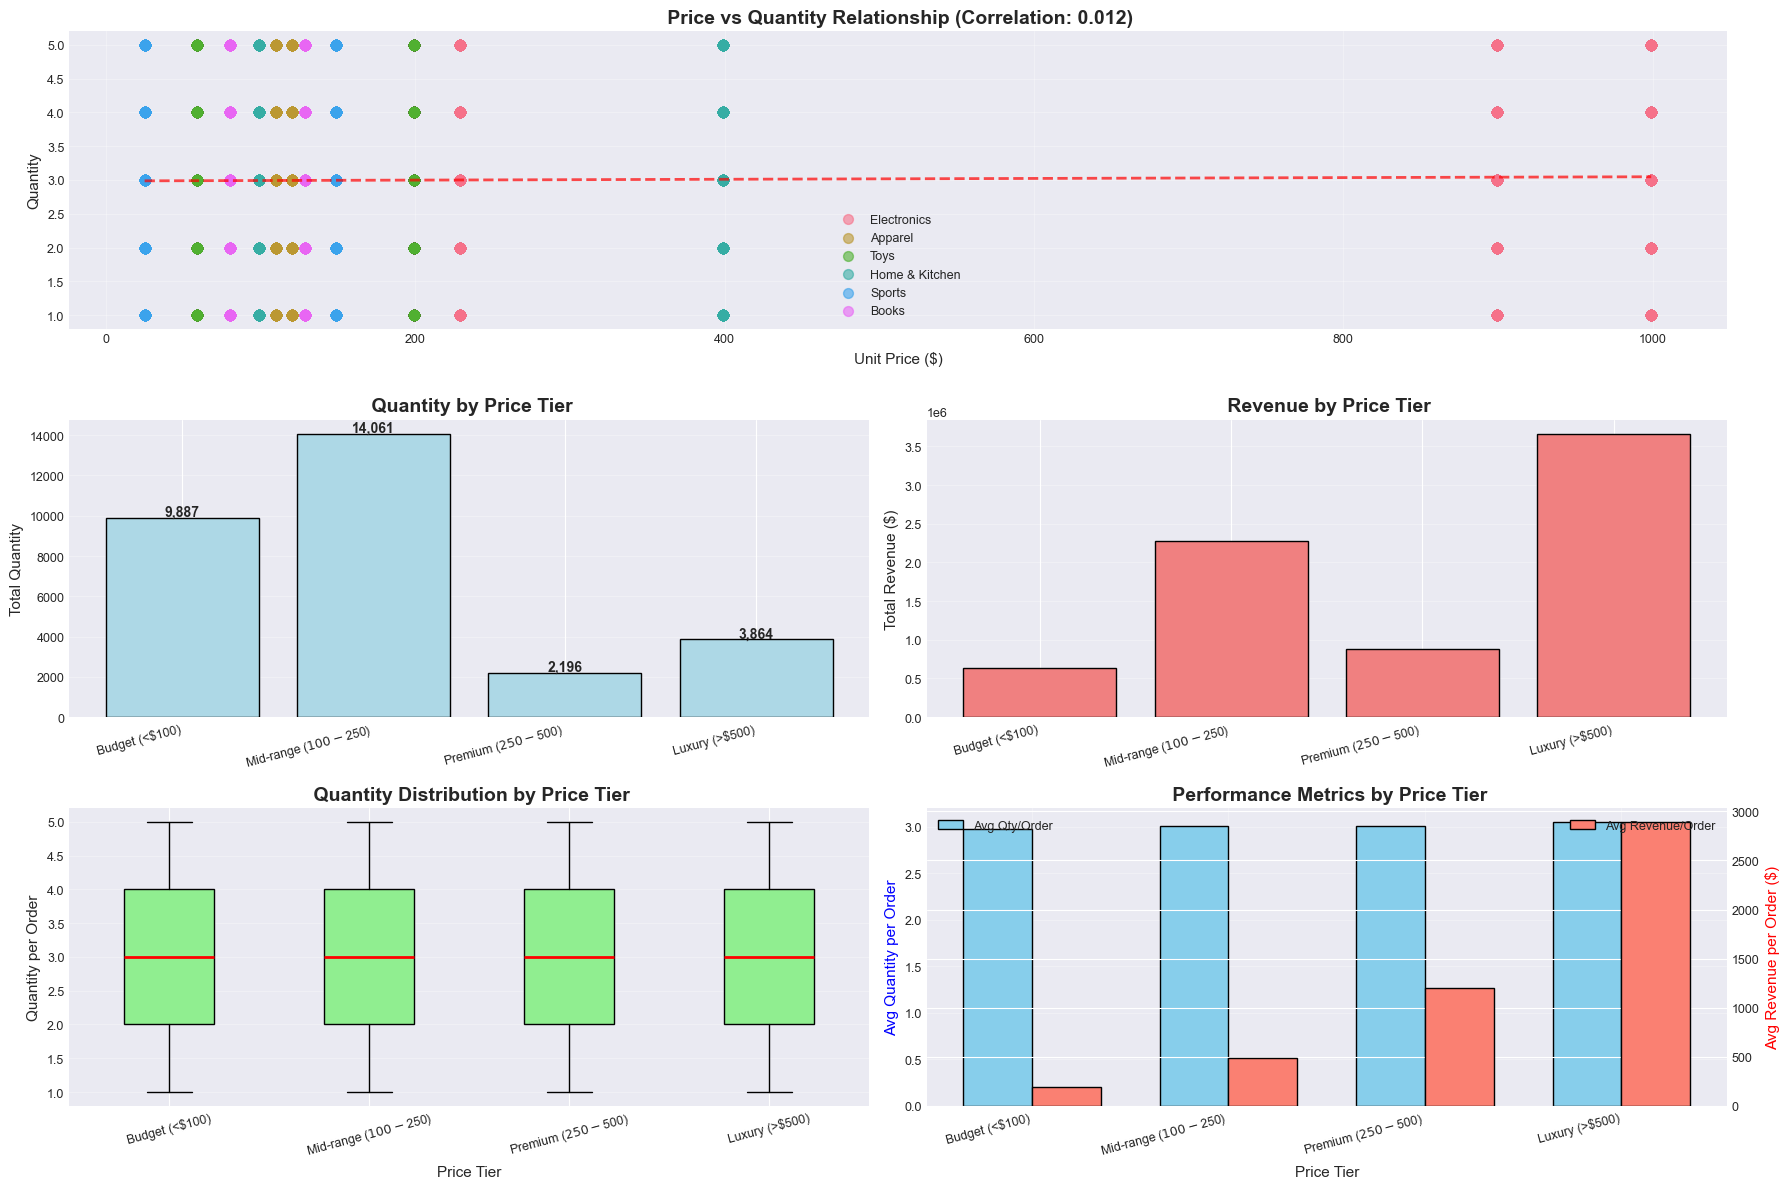

PRICE-QUANTITY RELATIONSHIP ANALYSIS

 Correlation Analysis:
  • Price-Quantity Correlation: 0.012
  • Interpretation: WEAK correlation - Price has limited impact on quantity purchased

 Price Tier Performance:

  Budget (<$100):
    Orders: 3,325
    Total Quantity: 9,887
    Total Revenue: $639,569.00
    Avg Qty/Order: 2.97
    Avg Revenue/Order: $192.35

  Mid-range ($100-$250):
    Orders: 4,677
    Total Quantity: 14,061
    Total Revenue: $2,272,954.00
    Avg Qty/Order: 3.01
    Avg Revenue/Order: $485.99

  Premium ($250-$500):
    Orders: 730
    Total Quantity: 2,196
    Total Revenue: $876,204.00
    Avg Qty/Order: 3.01
    Avg Revenue/Order: $1200.28

  Luxury (>$500):
    Orders: 1,268
    Total Quantity: 3,864
    Total Revenue: $3,662,036.00
    Avg Qty/Order: 3.05
    Avg Revenue/Order: $2888.04

 Most Lucrative Price Tier:
  • Luxury (>$500): $3,662,036.00 revenue
  • Strategy: Focus inventory and marketing on this segment

 Price-quantity analysis complete!


In [16]:
# Price-Quantity analysis
price_qty_data = df_clean[['unit_price', 'quantity', 'revenue', 'category']].copy()

# Create price tiers
price_qty_data['price_tier'] = pd.cut(price_qty_data['unit_price'], 
                                        bins=[0, 100, 250, 500, 10000],
                                        labels=['Budget (<$100)', 'Mid-range ($100-$250)', 
                                               'Premium ($250-$500)', 'Luxury (>$500)'])

# Price tier statistics
price_tier_stats = price_qty_data.groupby('price_tier').agg({
    'quantity': 'sum',
    'revenue': 'sum',
    'unit_price': 'count'
}).reset_index()
price_tier_stats.columns = ['price_tier', 'total_quantity', 'total_revenue', 'order_count']
price_tier_stats['avg_quantity_per_order'] = price_tier_stats['total_quantity'] / price_tier_stats['order_count']
price_tier_stats['avg_revenue_per_order'] = price_tier_stats['total_revenue'] / price_tier_stats['order_count']

# Calculate correlation
correlation = price_qty_data['unit_price'].corr(price_qty_data['quantity'])

# Visualizations
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(3, 2, figure=fig)

# Scatter plot: Price vs Quantity (by category)
ax1 = fig.add_subplot(gs[0, :])
for cat in price_qty_data['category'].unique():
    cat_data = price_qty_data[price_qty_data['category'] == cat]
    ax1.scatter(cat_data['unit_price'], cat_data['quantity'], alpha=0.6, s=50, label=cat)
ax1.set_xlabel('Unit Price ($)')
ax1.set_ylabel('Quantity')
ax1.set_title(f' Price vs Quantity Relationship (Correlation: {correlation:.3f})', 
              fontsize=14, fontweight='bold')
ax1.legend(loc='best', fontsize=9)
ax1.grid(alpha=0.3)

# Add trend line
z = np.polyfit(price_qty_data['unit_price'], price_qty_data['quantity'], 1)
p = np.poly1d(z)
ax1.plot(sorted(price_qty_data['unit_price']), p(sorted(price_qty_data['unit_price'])), 
         "r--", linewidth=2, label='Trend', alpha=0.7)

# Price Bucket vs Quantity
ax2 = fig.add_subplot(gs[1, 0])
ax2.bar(range(len(price_tier_stats)), price_tier_stats['total_quantity'], 
        color='lightblue', edgecolor='black')
ax2.set_xticks(range(len(price_tier_stats)))
ax2.set_xticklabels(price_tier_stats['price_tier'], rotation=15, ha='right')
ax2.set_ylabel('Total Quantity')
ax2.set_title(' Quantity by Price Tier', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for i, row in price_tier_stats.iterrows():
    ax2.text(i, row['total_quantity'] + 100, f"{row['total_quantity']:,.0f}", 
             ha='center', fontweight='bold')

# Price Tier vs Revenue
ax3 = fig.add_subplot(gs[1, 1])
ax3.bar(range(len(price_tier_stats)), price_tier_stats['total_revenue'], 
        color='lightcoral', edgecolor='black')
ax3.set_xticks(range(len(price_tier_stats)))
ax3.set_xticklabels(price_tier_stats['price_tier'], rotation=15, ha='right')
ax3.set_ylabel('Total Revenue ($)')
ax3.set_title(' Revenue by Price Tier', fontsize=14, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# Boxplots by Price Tier
ax4 = fig.add_subplot(gs[2, 0])
tier_data = [price_qty_data[price_qty_data['price_tier'] == tier]['quantity'].values 
             for tier in price_tier_stats['price_tier']]
bp = ax4.boxplot(tier_data, labels=price_tier_stats['price_tier'], patch_artist=True,
                 boxprops=dict(facecolor='lightgreen', edgecolor='black'),
                 medianprops=dict(color='red', linewidth=2))
ax4.set_xlabel('Price Tier')
ax4.set_ylabel('Quantity per Order')
ax4.set_title(' Quantity Distribution by Price Tier', fontsize=14, fontweight='bold')
ax4.tick_params(axis='x', rotation=15)
ax4.grid(axis='y', alpha=0.3)

# Combined Performance
ax5 = fig.add_subplot(gs[2, 1])
x_pos = np.arange(len(price_tier_stats))
width = 0.35
bars1 = ax5.bar(x_pos - width/2, price_tier_stats['avg_quantity_per_order'], width, 
                label='Avg Qty/Order', color='skyblue', edgecolor='black')
ax5_twin = ax5.twinx()
bars2 = ax5_twin.bar(x_pos + width/2, price_tier_stats['avg_revenue_per_order'], width,
                     label='Avg Revenue/Order', color='salmon', edgecolor='black')
ax5.set_xlabel('Price Tier')
ax5.set_ylabel('Avg Quantity per Order', color='blue')
ax5_twin.set_ylabel('Avg Revenue per Order ($)', color='red')
ax5.set_title(' Performance Metrics by Price Tier', fontsize=14, fontweight='bold')
ax5.set_xticks(x_pos)
ax5.set_xticklabels(price_tier_stats['price_tier'], rotation=15, ha='right')
ax5.legend(loc='upper left', fontsize=9)
ax5_twin.legend(loc='upper right', fontsize=9)
ax5.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Insights
print("="*80)
print("PRICE-QUANTITY RELATIONSHIP ANALYSIS")
print("="*80)
print(f"\n Correlation Analysis:")
print(f"  • Price-Quantity Correlation: {correlation:.3f}")
if correlation < -0.3:
    interpretation = "NEGATIVE correlation - Higher prices associated with lower quantities (expected)"
elif correlation > 0.3:
    interpretation = "POSITIVE correlation - Higher prices associated with higher quantities (premium appeal)"
else:
    interpretation = "WEAK correlation - Price has limited impact on quantity purchased"
print(f"  • Interpretation: {interpretation}")

print(f"\n Price Tier Performance:")
for i, row in price_tier_stats.iterrows():
    print(f"\n  {row['price_tier']}:")
    print(f"    Orders: {row['order_count']:,}")
    print(f"    Total Quantity: {row['total_quantity']:,}")
    print(f"    Total Revenue: ${row['total_revenue']:,.2f}")
    print(f"    Avg Qty/Order: {row['avg_quantity_per_order']:.2f}")
    print(f"    Avg Revenue/Order: ${row['avg_revenue_per_order']:.2f}")

# Price elasticity intuition
best_tier = price_tier_stats.loc[price_tier_stats['total_revenue'].idxmax()]
print(f"\n Most Lucrative Price Tier:")
print(f"  • {best_tier['price_tier']}: ${best_tier['total_revenue']:,.2f} revenue")
print(f"  • Strategy: Focus inventory and marketing on this segment")

print("\n Price-quantity analysis complete!")

# Section 17: Profit Analysis Over Time

Analyzing profit trends, margin behavior, and identifying loss periods (Note: Using assumed 30% profit margin).

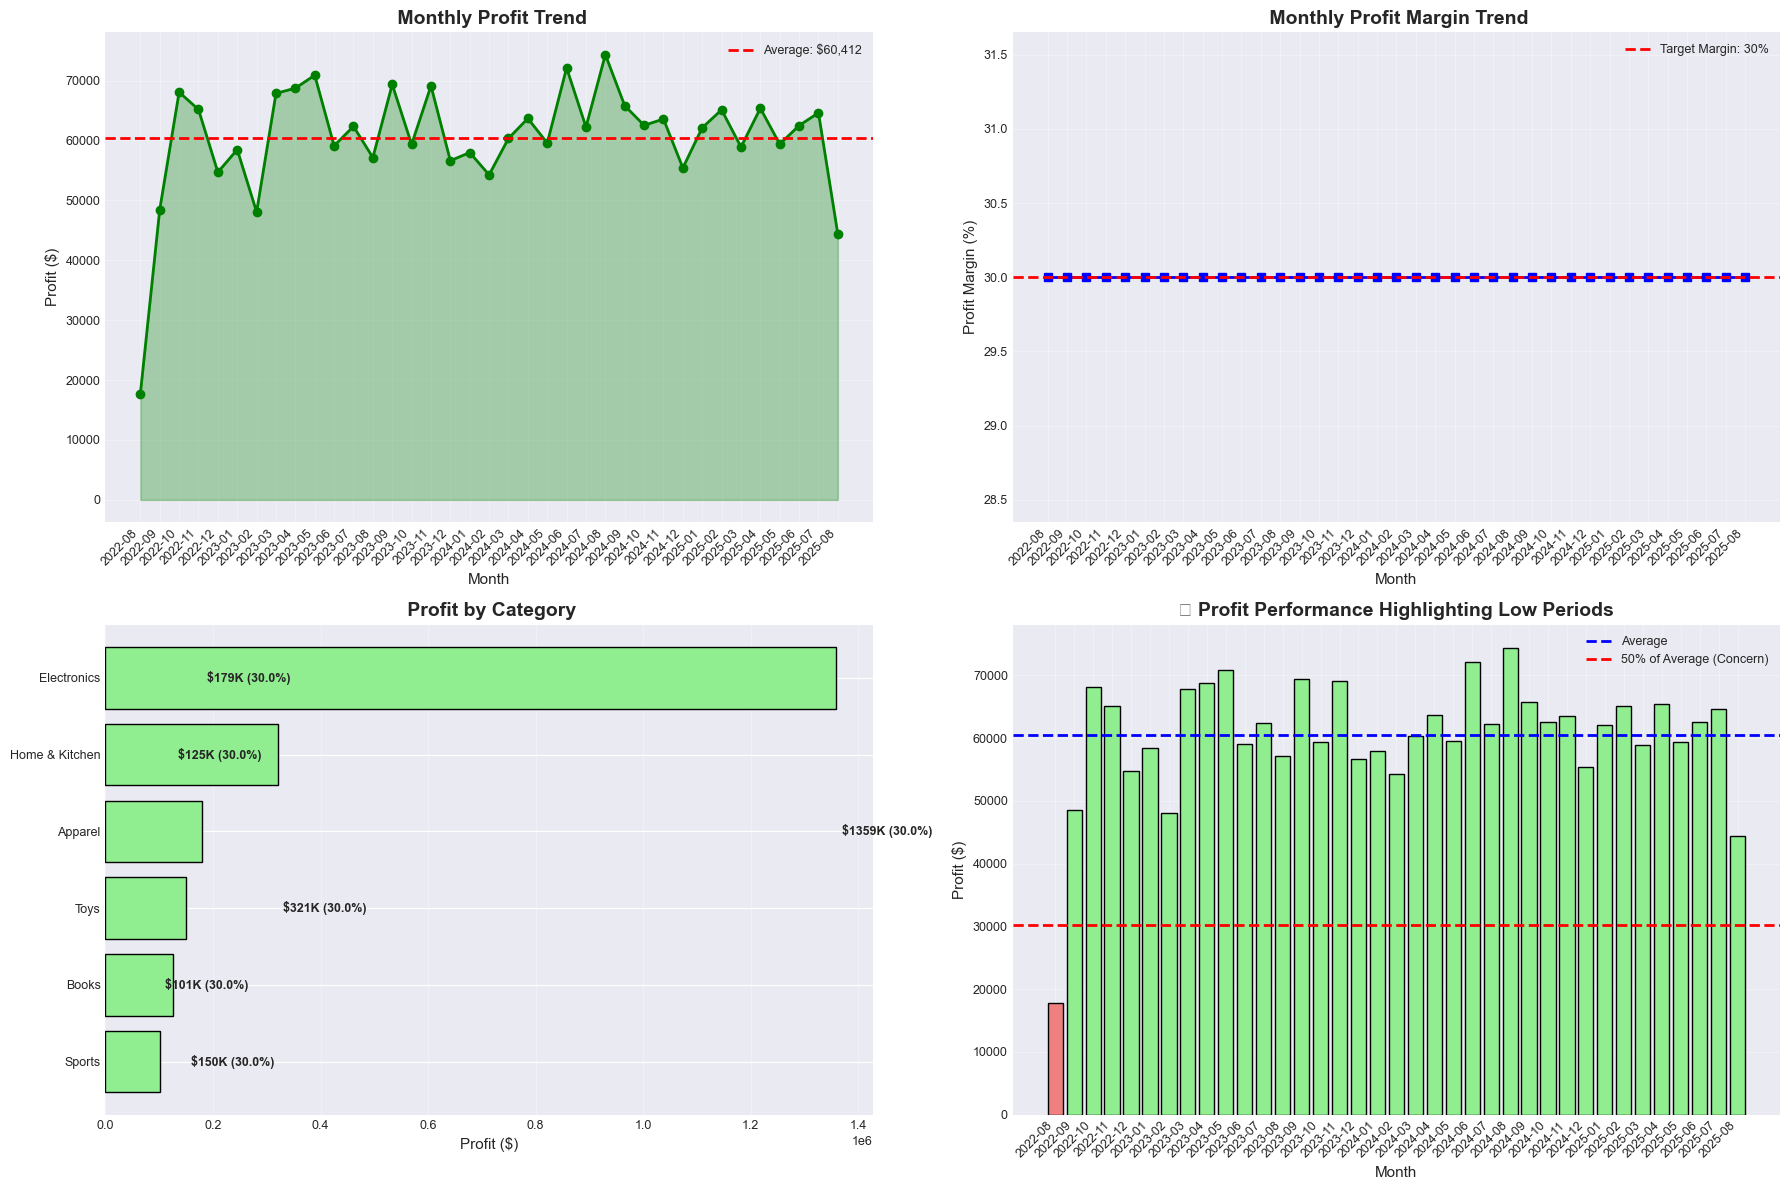

PROFIT ANALYSIS

 Overall Profit Metrics:
  • Total Profit: $2,235,228.90
  • Total Revenue: $7,450,763.00
  • Overall Profit Margin: 30.00%
  • Average Monthly Profit: $60,411.59

 Best Performing Month:
  • 2024-08: $74,325.30 (Margin: 30.00%)

 Worst Performing Month:
  • 2022-08: $17,728.20 (Margin: 30.00%)

️ Low Profit Periods (< 50% of average):
  • Count: 1 months
    - 2022-08: $17,728.20

 Most Profitable Category:
  • Electronics: $1,358,995.80 (Margin: 30.00%)

️ Note: Profit calculated using assumed 30% margin (cost data not available in dataset)

 Profit analysis complete!


In [17]:
# Profit analysis over time
monthly_profit = df_clean.groupby('year_month').agg({
    'profit': 'sum',
    'revenue': 'sum'
}).reset_index()
monthly_profit['profit_margin'] = (monthly_profit['profit'] / monthly_profit['revenue'] * 100).round(2)
monthly_profit['year_month_str'] = monthly_profit['year_month'].astype(str)

# Category-wise profit
category_profit = df_clean.groupby('category').agg({
    'profit': 'sum',
    'revenue': 'sum'
}).reset_index()
category_profit['profit_margin'] = (category_profit['profit'] / category_profit['revenue'] * 100).round(2)
category_profit = category_profit.sort_values('profit', ascending=False)

# Identify negative/low profit periods (for demonstration, mark below-average as "concern")
avg_profit = monthly_profit['profit'].mean()
low_profit_months = monthly_profit[monthly_profit['profit'] < avg_profit * 0.5]

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Profit Trend Over Time
axes[0, 0].plot(range(len(monthly_profit)), monthly_profit['profit'], 
                marker='o', linewidth=2, markersize=6, color='green')
axes[0, 0].fill_between(range(len(monthly_profit)), monthly_profit['profit'], 
                        alpha=0.3, color='green')
axes[0, 0].axhline(avg_profit, color='red', linestyle='--', linewidth=2, 
                   label=f'Average: ${avg_profit:,.0f}')
axes[0, 0].set_title(' Monthly Profit Trend', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Profit ($)')
axes[0, 0].set_xticks(range(len(monthly_profit)))
axes[0, 0].set_xticklabels(monthly_profit['year_month_str'], rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Profit Margin Trend
axes[0, 1].plot(range(len(monthly_profit)), monthly_profit['profit_margin'], 
                marker='s', linewidth=2, markersize=6, color='blue')
axes[0, 1].axhline(30, color='red', linestyle='--', linewidth=2, 
                   label='Target Margin: 30%')
axes[0, 1].set_title(' Monthly Profit Margin Trend', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Profit Margin (%)')
axes[0, 1].set_xticks(range(len(monthly_profit)))
axes[0, 1].set_xticklabels(monthly_profit['year_month_str'], rotation=45, ha='right')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Profit by Category
axes[1, 0].barh(category_profit['category'], category_profit['profit'], 
                color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('Profit ($)')
axes[1, 0].set_title(' Profit by Category', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)
axes[1, 0].invert_yaxis()
for i, row in category_profit.iterrows():
    axes[1, 0].text(row['profit'] + 10000, i, f"${row['profit']/1e3:.0f}K ({row['profit_margin']:.1f}%)", 
                    va='center', fontweight='bold', fontsize=9)

# Loss/Low Profit Period Highlight
axes[1, 1].bar(range(len(monthly_profit)), monthly_profit['profit'], 
               color=['lightcoral' if p < avg_profit * 0.5 else 'lightgreen' 
                      for p in monthly_profit['profit']], edgecolor='black')
axes[1, 1].axhline(avg_profit, color='blue', linestyle='--', linewidth=2, 
                   label=f'Average')
axes[1, 1].axhline(avg_profit * 0.5, color='red', linestyle='--', linewidth=2, 
                   label=f'50% of Average (Concern)')
axes[1, 1].set_title('️ Profit Performance Highlighting Low Periods', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Profit ($)')
axes[1, 1].set_xticks(range(len(monthly_profit)))
axes[1, 1].set_xticklabels(monthly_profit['year_month_str'], rotation=45, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Insights
print("="*80)
print("PROFIT ANALYSIS")
print("="*80)
print(f"\n Overall Profit Metrics:")
print(f"  • Total Profit: ${df_clean['profit'].sum():,.2f}")
print(f"  • Total Revenue: ${df_clean['revenue'].sum():,.2f}")
print(f"  • Overall Profit Margin: {df_clean['profit'].sum() / df_clean['revenue'].sum() * 100:.2f}%")
print(f"  • Average Monthly Profit: ${monthly_profit['profit'].mean():,.2f}")

print(f"\n Best Performing Month:")
best_month = monthly_profit.loc[monthly_profit['profit'].idxmax()]
print(f"  • {best_month['year_month']}: ${best_month['profit']:,.2f} (Margin: {best_month['profit_margin']:.2f}%)")

print(f"\n Worst Performing Month:")
worst_month = monthly_profit.loc[monthly_profit['profit'].idxmin()]
print(f"  • {worst_month['year_month']}: ${worst_month['profit']:,.2f} (Margin: {worst_month['profit_margin']:.2f}%)")

print(f"\n️ Low Profit Periods (< 50% of average):")
if len(low_profit_months) > 0:
    print(f"  • Count: {len(low_profit_months)} months")
    for _, row in low_profit_months.head(5).iterrows():
        print(f"    - {row['year_month']}: ${row['profit']:,.2f}")
else:
    print(f"  • No concerning low-profit periods identified")

print(f"\n Most Profitable Category:")
top_cat = category_profit.iloc[0]
print(f"  • {top_cat['category']}: ${top_cat['profit']:,.2f} (Margin: {top_cat['profit_margin']:.2f}%)")

print(f"\n️ Note: Profit calculated using assumed 30% margin (cost data not available in dataset)")

print("\n Profit analysis complete!")

# Section 18: Sales Performance by Geographic Location

Analyzing revenue and customer metrics across countries (Note: City data not available, using country-level analysis).

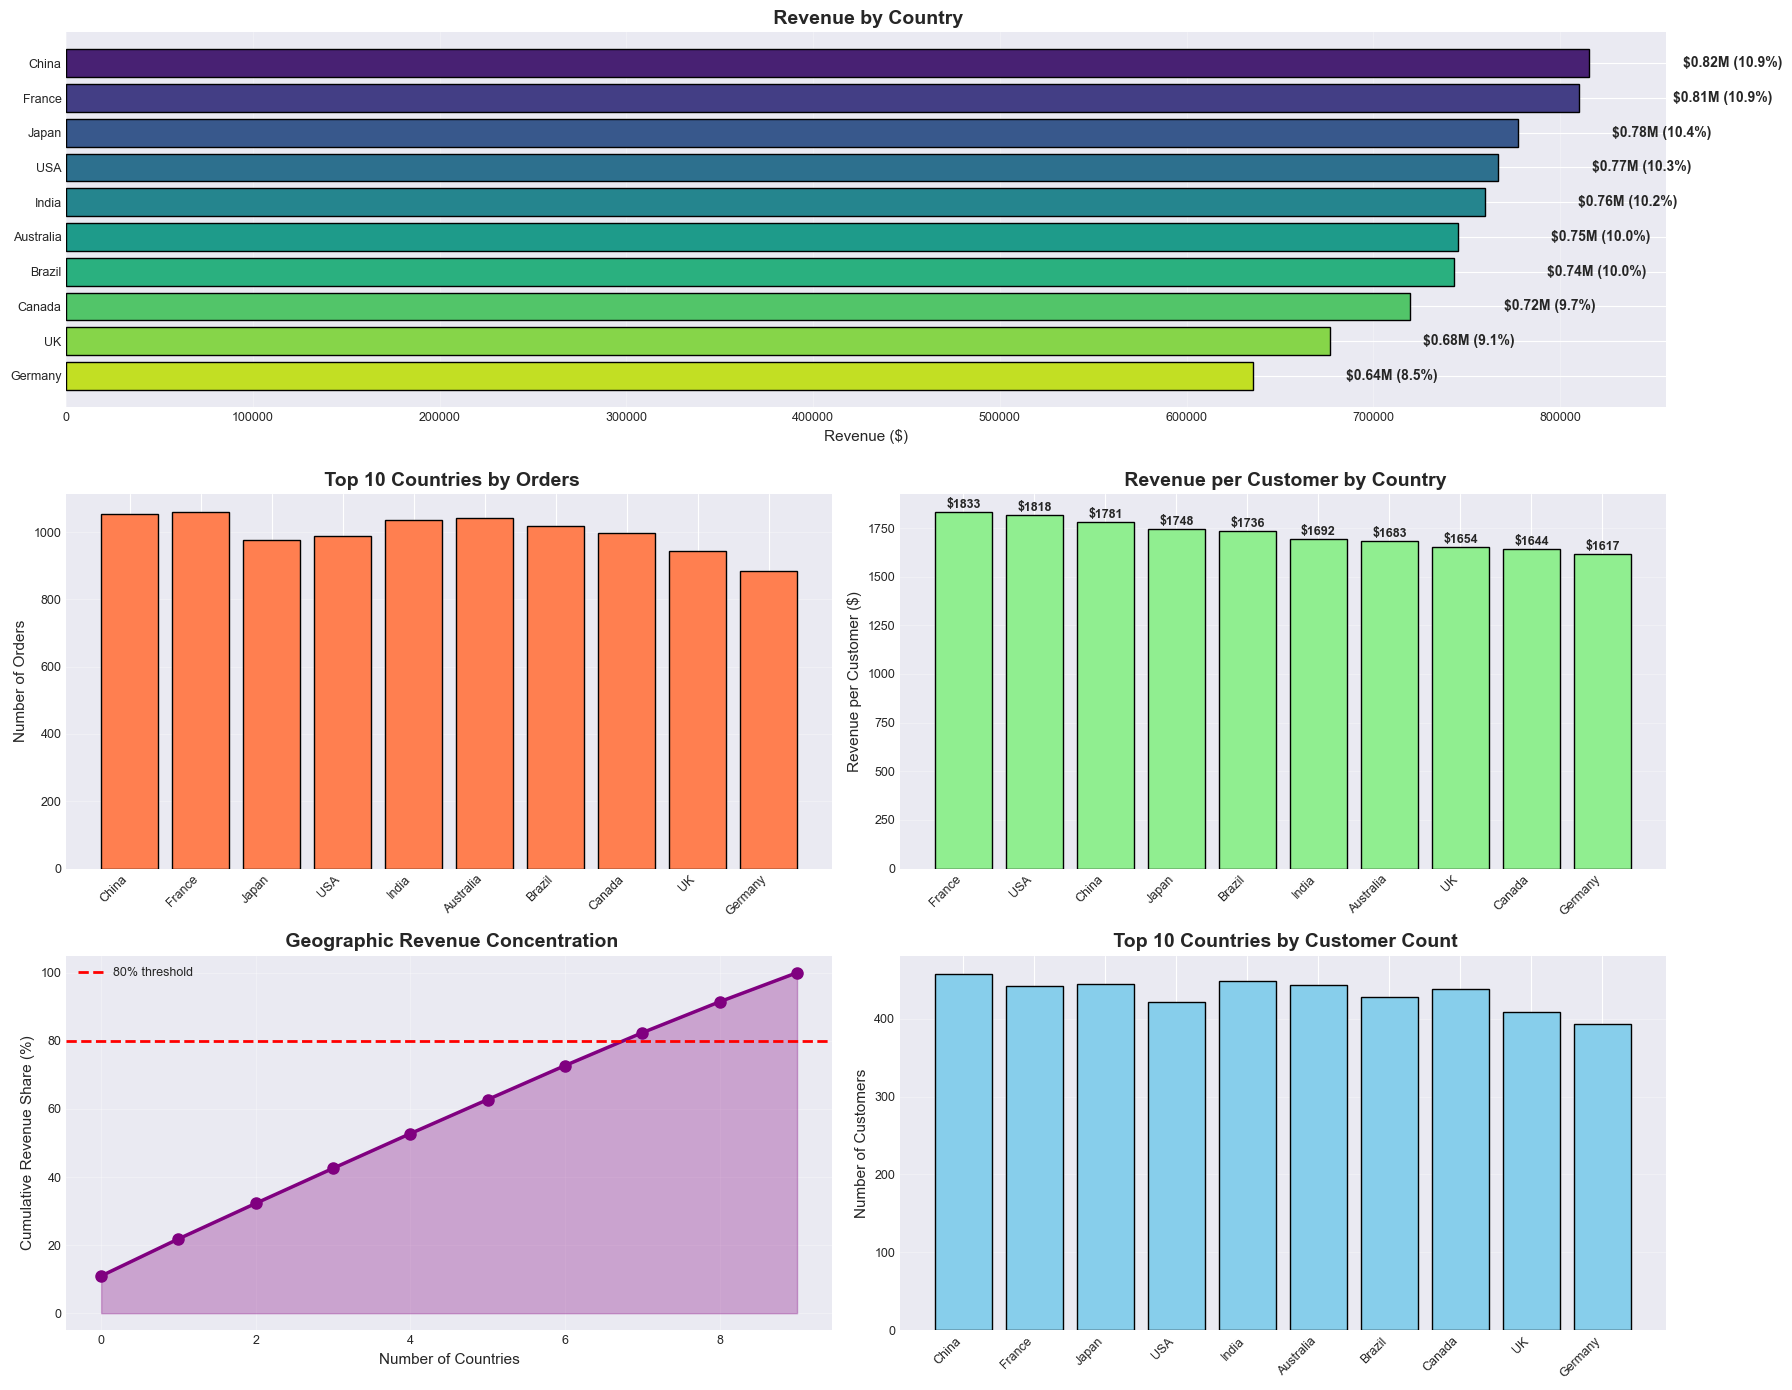

GEOGRAPHIC PERFORMANCE ANALYSIS

 Top 5 Countries by Revenue:
  4. China
     Revenue: $815,789.00 (10.9% of total)
     Orders: 1,054 | Customers: 458
     Revenue per Customer: $1781.20
  5. France
     Revenue: $810,303.00 (10.9% of total)
     Orders: 1,060 | Customers: 442
     Revenue per Customer: $1833.26
  8. Japan
     Revenue: $777,673.00 (10.4% of total)
     Orders: 976 | Customers: 445
     Revenue per Customer: $1747.58
  10. USA
     Revenue: $767,017.00 (10.3% of total)
     Orders: 987 | Customers: 422
     Revenue per Customer: $1817.58
  7. India
     Revenue: $759,619.00 (10.2% of total)
     Orders: 1,036 | Customers: 449
     Revenue per Customer: $1691.80

 Highest Revenue per Customer:
  • France: $1833.26 per customer
  • Strategy: High-value market - focus on retention and premium offerings

 Geographic Concentration:
  • Top 7 countries generate 80% of revenue
  • Concentration Index: 0.75

 Market Penetration:
  • Operating in 10 countries
  • Average order

In [18]:
# Geographic performance analysis
geo_performance = df_clean.groupby('country').agg({
    'revenue': 'sum',
    'order_id': 'count',
    'customer_id': 'nunique',
    'profit': 'sum'
}).reset_index()
geo_performance.columns = ['country', 'revenue', 'orders', 'customers', 'profit']
geo_performance = geo_performance.sort_values('revenue', ascending=False)
geo_performance['revenue_per_customer'] = (geo_performance['revenue'] / geo_performance['customers']).round(2)
geo_performance['orders_per_customer'] = (geo_performance['orders'] / geo_performance['customers']).round(2)
geo_performance['revenue_share'] = (geo_performance['revenue'] / geo_performance['revenue'].sum() * 100).round(2)
geo_performance['cumulative_share'] = geo_performance['revenue_share'].cumsum()

# Visualizations
fig = plt.figure(figsize=(18, 14))
gs = GridSpec(3, 2, figure=fig)

# Top Countries by Revenue
ax1 = fig.add_subplot(gs[0, :])
bars = ax1.barh(range(len(geo_performance)), geo_performance['revenue'], 
                color=sns.color_palette('viridis', len(geo_performance)), edgecolor='black')
ax1.set_yticks(range(len(geo_performance)))
ax1.set_yticklabels(geo_performance['country'])
ax1.set_xlabel('Revenue ($)')
ax1.set_title(' Revenue by Country', fontsize=14, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)
for i, (bar, row) in enumerate(zip(bars, geo_performance.itertuples())):
    ax1.text(row.revenue + 50000, i, f"${row.revenue/1e6:.2f}M ({row.revenue_share:.1f}%)", 
             va='center', fontweight='bold')

# Top Countries by Orders
ax2 = fig.add_subplot(gs[1, 0])
ax2.bar(range(len(geo_performance.head(10))), geo_performance.head(10)['orders'], 
        color='coral', edgecolor='black')
ax2.set_xticks(range(len(geo_performance.head(10))))
ax2.set_xticklabels(geo_performance.head(10)['country'], rotation=45, ha='right')
ax2.set_ylabel('Number of Orders')
ax2.set_title(' Top 10 Countries by Orders', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Revenue per Customer
ax3 = fig.add_subplot(gs[1, 1])
sorted_by_rpc = geo_performance.sort_values('revenue_per_customer', ascending=False).head(10)
ax3.bar(range(len(sorted_by_rpc)), sorted_by_rpc['revenue_per_customer'], 
        color='lightgreen', edgecolor='black')
ax3.set_xticks(range(len(sorted_by_rpc)))
ax3.set_xticklabels(sorted_by_rpc['country'], rotation=45, ha='right')
ax3.set_ylabel('Revenue per Customer ($)')
ax3.set_title(' Revenue per Customer by Country', fontsize=14, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)
for i, row in enumerate(sorted_by_rpc.itertuples()):
    ax3.text(i, row.revenue_per_customer + 20, f"${row.revenue_per_customer:.0f}", 
             ha='center', fontweight='bold', fontsize=9)

# Geographic Concentration Curve
ax4 = fig.add_subplot(gs[2, 0])
ax4.plot(range(len(geo_performance)), geo_performance['cumulative_share'], 
         marker='o', linewidth=2.5, markersize=8, color='purple')
ax4.fill_between(range(len(geo_performance)), geo_performance['cumulative_share'], 
                 alpha=0.3, color='purple')
ax4.axhline(y=80, color='red', linestyle='--', linewidth=2, label='80% threshold')
ax4.set_xlabel('Number of Countries')
ax4.set_ylabel('Cumulative Revenue Share (%)')
ax4.set_title(' Geographic Revenue Concentration', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(alpha=0.3)

# Customer Distribution
ax5 = fig.add_subplot(gs[2, 1])
ax5.bar(range(len(geo_performance.head(10))), geo_performance.head(10)['customers'], 
        color='skyblue', edgecolor='black')
ax5.set_xticks(range(len(geo_performance.head(10))))
ax5.set_xticklabels(geo_performance.head(10)['country'], rotation=45, ha='right')
ax5.set_ylabel('Number of Customers')
ax5.set_title(' Top 10 Countries by Customer Count', fontsize=14, fontweight='bold')
ax5.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Insights
print("="*80)
print("GEOGRAPHIC PERFORMANCE ANALYSIS")
print("="*80)
print(f"\n Top 5 Countries by Revenue:")
for i, row in geo_performance.head(5).iterrows():
    print(f"  {i+1}. {row['country']}")
    print(f"     Revenue: ${row['revenue']:,.2f} ({row['revenue_share']:.1f}% of total)")
    print(f"     Orders: {row['orders']:,} | Customers: {row['customers']:,}")
    print(f"     Revenue per Customer: ${row['revenue_per_customer']:.2f}")

print(f"\n Highest Revenue per Customer:")
highest_rpc = geo_performance.loc[geo_performance['revenue_per_customer'].idxmax()]
print(f"  • {highest_rpc['country']}: ${highest_rpc['revenue_per_customer']:.2f} per customer")
print(f"  • Strategy: High-value market - focus on retention and premium offerings")

print(f"\n Geographic Concentration:")
countries_for_80pct = len(geo_performance[geo_performance['cumulative_share'] <= 80])
print(f"  • Top {countries_for_80pct} countries generate 80% of revenue")
print(f"  • Concentration Index: {geo_performance['revenue_share'].std():.2f}")

print(f"\n Market Penetration:")
total_countries = len(geo_performance)
print(f"  • Operating in {total_countries} countries")
print(f"  • Average orders per country: {geo_performance['orders'].mean():.0f}")
print(f"  • Average customers per country: {geo_performance['customers'].mean():.0f}")

print(f"\n️ Note: Analysis at country level (city-level data not available in dataset)")

print("\n Geographic analysis complete!")

# Section 19: Understanding the Customer Base

Analyzing customer value dispersion, order frequency, and customer lifetime patterns.

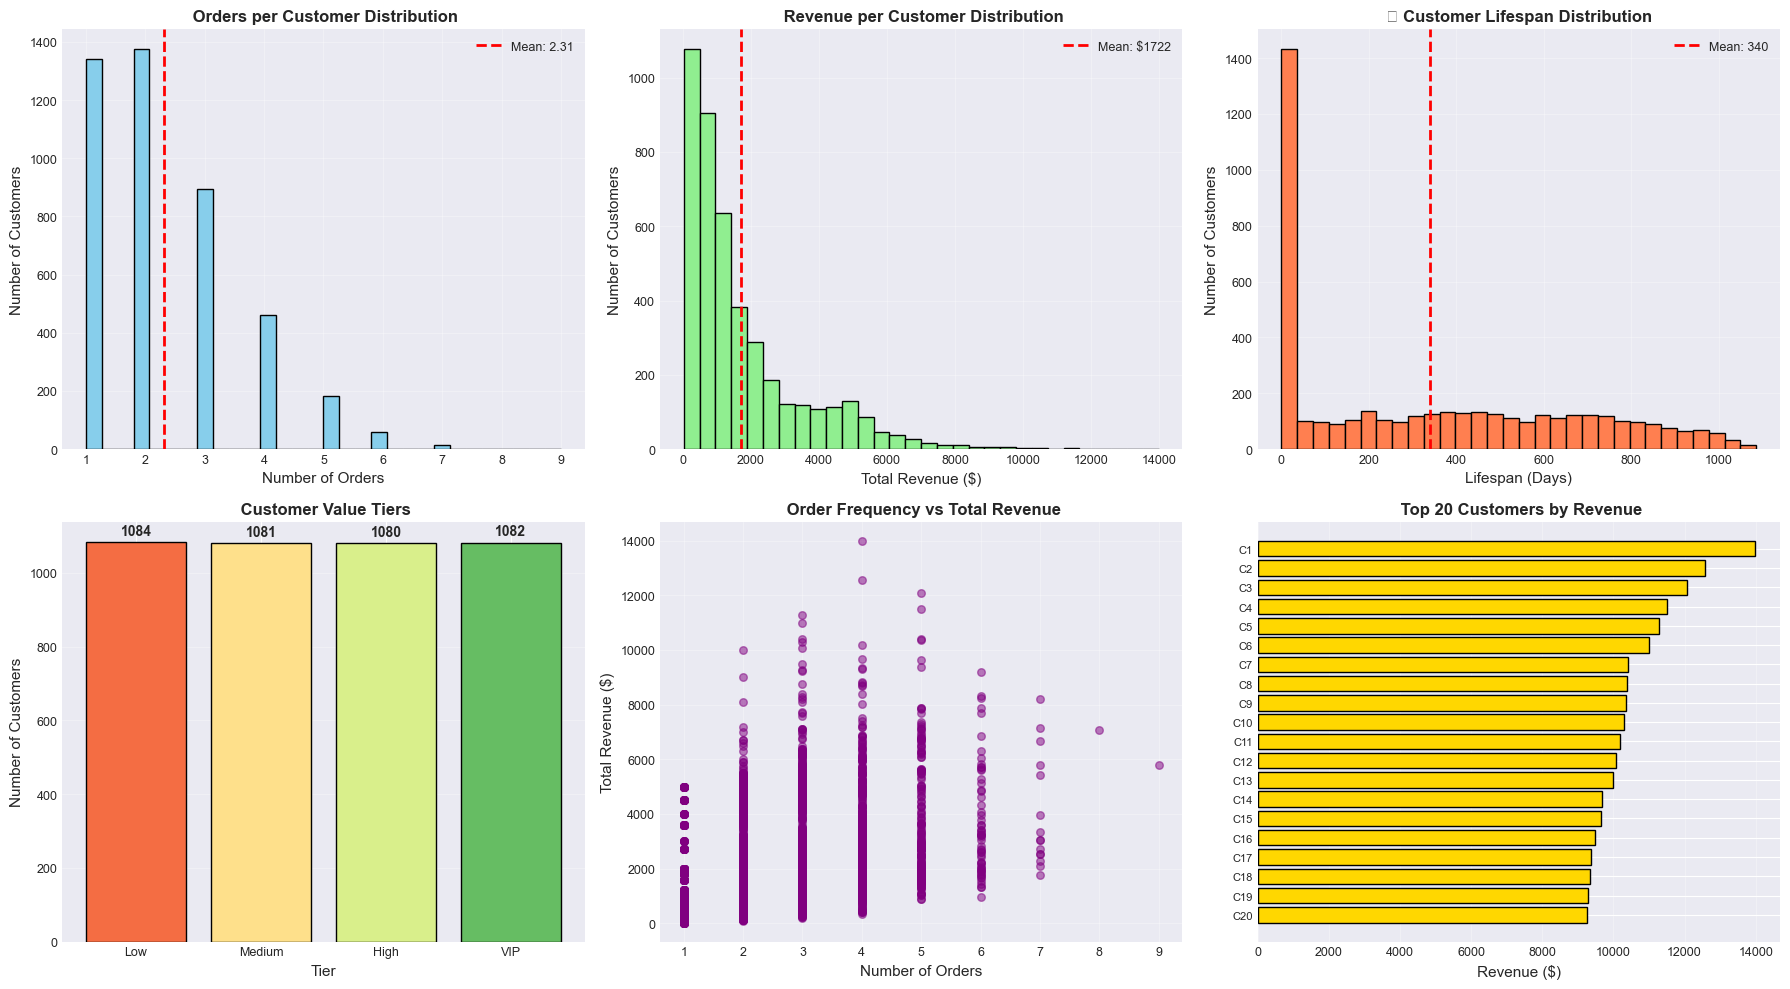

CUSTOMER BASE ANALYSIS

 Customer Overview:
  • Total Unique Customers: 4,327
  • Average Orders per Customer: 2.31
  • Median Orders per Customer: 2.00
  • Average Revenue per Customer: $1721.92
  • Median Revenue per Customer: $1048.00

 Top Customer:
  • Customer ID: CUST3556
  • Total Revenue: $13,985.00
  • Orders: 4
  • Lifespan: 730 days

 Customer Dispersion:
  • Revenue Std Dev: $1776.18
  • Coefficient of Variation: 103.15%
  • High dispersion indicates diverse customer base

️ Customer Lifecycle:
  • Average Lifespan: 340 days
  • Max Lifespan: 1086 days
  • One-time customers: 1,340 (31.0%)
  • Repeat customers: 2,987 (69.0%)

 Customer base analysis complete!


In [19]:
# Customer base analysis
customer_metrics = df_clean.groupby('customer_id').agg({
    'order_id': 'count',
    'revenue': 'sum',
    'order_date': ['min', 'max']
}).reset_index()
customer_metrics.columns = ['customer_id', 'order_count', 'total_revenue', 'first_order', 'last_order']
customer_metrics['customer_lifespan_days'] = (customer_metrics['last_order'] - customer_metrics['first_order']).dt.days
customer_metrics['avg_order_value'] = customer_metrics['total_revenue'] / customer_metrics['order_count']

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Orders per Customer Distribution
axes[0, 0].hist(customer_metrics['order_count'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title(' Orders per Customer Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Orders')
axes[0, 0].set_ylabel('Number of Customers')
axes[0, 0].axvline(customer_metrics['order_count'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {customer_metrics["order_count"].mean():.2f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Revenue per Customer Distribution
axes[0, 1].hist(customer_metrics['total_revenue'], bins=30, color='lightgreen', edgecolor='black')
axes[0, 1].set_title(' Revenue per Customer Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Total Revenue ($)')
axes[0, 1].set_ylabel('Number of Customers')
axes[0, 1].axvline(customer_metrics['total_revenue'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: ${customer_metrics["total_revenue"].mean():.0f}')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Customer Lifespan Distribution
axes[0, 2].hist(customer_metrics['customer_lifespan_days'], bins=30, color='coral', edgecolor='black')
axes[0, 2].set_title('️ Customer Lifespan Distribution', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Lifespan (Days)')
axes[0, 2].set_ylabel('Number of Customers')
axes[0, 2].axvline(customer_metrics['customer_lifespan_days'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {customer_metrics["customer_lifespan_days"].mean():.0f}')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# Customer Value Tiers
customer_metrics['value_tier'] = pd.qcut(customer_metrics['total_revenue'], q=4, 
                                           labels=['Low', 'Medium', 'High', 'VIP'])
tier_counts = customer_metrics['value_tier'].value_counts().sort_index()
axes[1, 0].bar(tier_counts.index, tier_counts.values, color=sns.color_palette('RdYlGn', 4), edgecolor='black')
axes[1, 0].set_title(' Customer Value Tiers', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Tier')
axes[1, 0].set_ylabel('Number of Customers')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, (tier, count) in enumerate(tier_counts.items()):
    axes[1, 0].text(i, count + 20, str(count), ha='center', fontweight='bold')

# Order Frequency vs Revenue Scatter
axes[1, 1].scatter(customer_metrics['order_count'], customer_metrics['total_revenue'], 
                   alpha=0.5, s=30, color='purple')
axes[1, 1].set_title(' Order Frequency vs Total Revenue', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Number of Orders')
axes[1, 1].set_ylabel('Total Revenue ($)')
axes[1, 1].grid(alpha=0.3)

# Top 20 Customers
top_customers = customer_metrics.nlargest(20, 'total_revenue')
axes[1, 2].barh(range(len(top_customers)), top_customers['total_revenue'], 
                color='gold', edgecolor='black')
axes[1, 2].set_yticks(range(len(top_customers)))
axes[1, 2].set_yticklabels([f'C{i+1}' for i in range(len(top_customers))], fontsize=8)
axes[1, 2].set_xlabel('Revenue ($)')
axes[1, 2].set_title(' Top 20 Customers by Revenue', fontsize=12, fontweight='bold')
axes[1, 2].invert_yaxis()
axes[1, 2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Insights
print("="*80)
print("CUSTOMER BASE ANALYSIS")
print("="*80)
print(f"\n Customer Overview:")
print(f"  • Total Unique Customers: {len(customer_metrics):,}")
print(f"  • Average Orders per Customer: {customer_metrics['order_count'].mean():.2f}")
print(f"  • Median Orders per Customer: {customer_metrics['order_count'].median():.2f}")
print(f"  • Average Revenue per Customer: ${customer_metrics['total_revenue'].mean():.2f}")
print(f"  • Median Revenue per Customer: ${customer_metrics['total_revenue'].median():.2f}")

print(f"\n Top Customer:")
top_customer = customer_metrics.loc[customer_metrics['total_revenue'].idxmax()]
print(f"  • Customer ID: {top_customer['customer_id']}")
print(f"  • Total Revenue: ${top_customer['total_revenue']:,.2f}")
print(f"  • Orders: {top_customer['order_count']}")
print(f"  • Lifespan: {top_customer['customer_lifespan_days']} days")

print(f"\n Customer Dispersion:")
print(f"  • Revenue Std Dev: ${customer_metrics['total_revenue'].std():.2f}")
print(f"  • Coefficient of Variation: {customer_metrics['total_revenue'].std() / customer_metrics['total_revenue'].mean() * 100:.2f}%")
print(f"  • High dispersion indicates diverse customer base")

print(f"\n️ Customer Lifecycle:")
print(f"  • Average Lifespan: {customer_metrics['customer_lifespan_days'].mean():.0f} days")
print(f"  • Max Lifespan: {customer_metrics['customer_lifespan_days'].max()} days")
print(f"  • One-time customers: {len(customer_metrics[customer_metrics['order_count'] == 1]):,} ({len(customer_metrics[customer_metrics['order_count'] == 1])/len(customer_metrics)*100:.1f}%)")
print(f"  • Repeat customers: {len(customer_metrics[customer_metrics['order_count'] > 1]):,} ({len(customer_metrics[customer_metrics['order_count'] > 1])/len(customer_metrics)*100:.1f}%)")

print("\n Customer base analysis complete!")

# Section 20: Customer Segmentation Using RFM

Implementing RFM (Recency, Frequency, Monetary) analysis with scoring and segment naming logic.

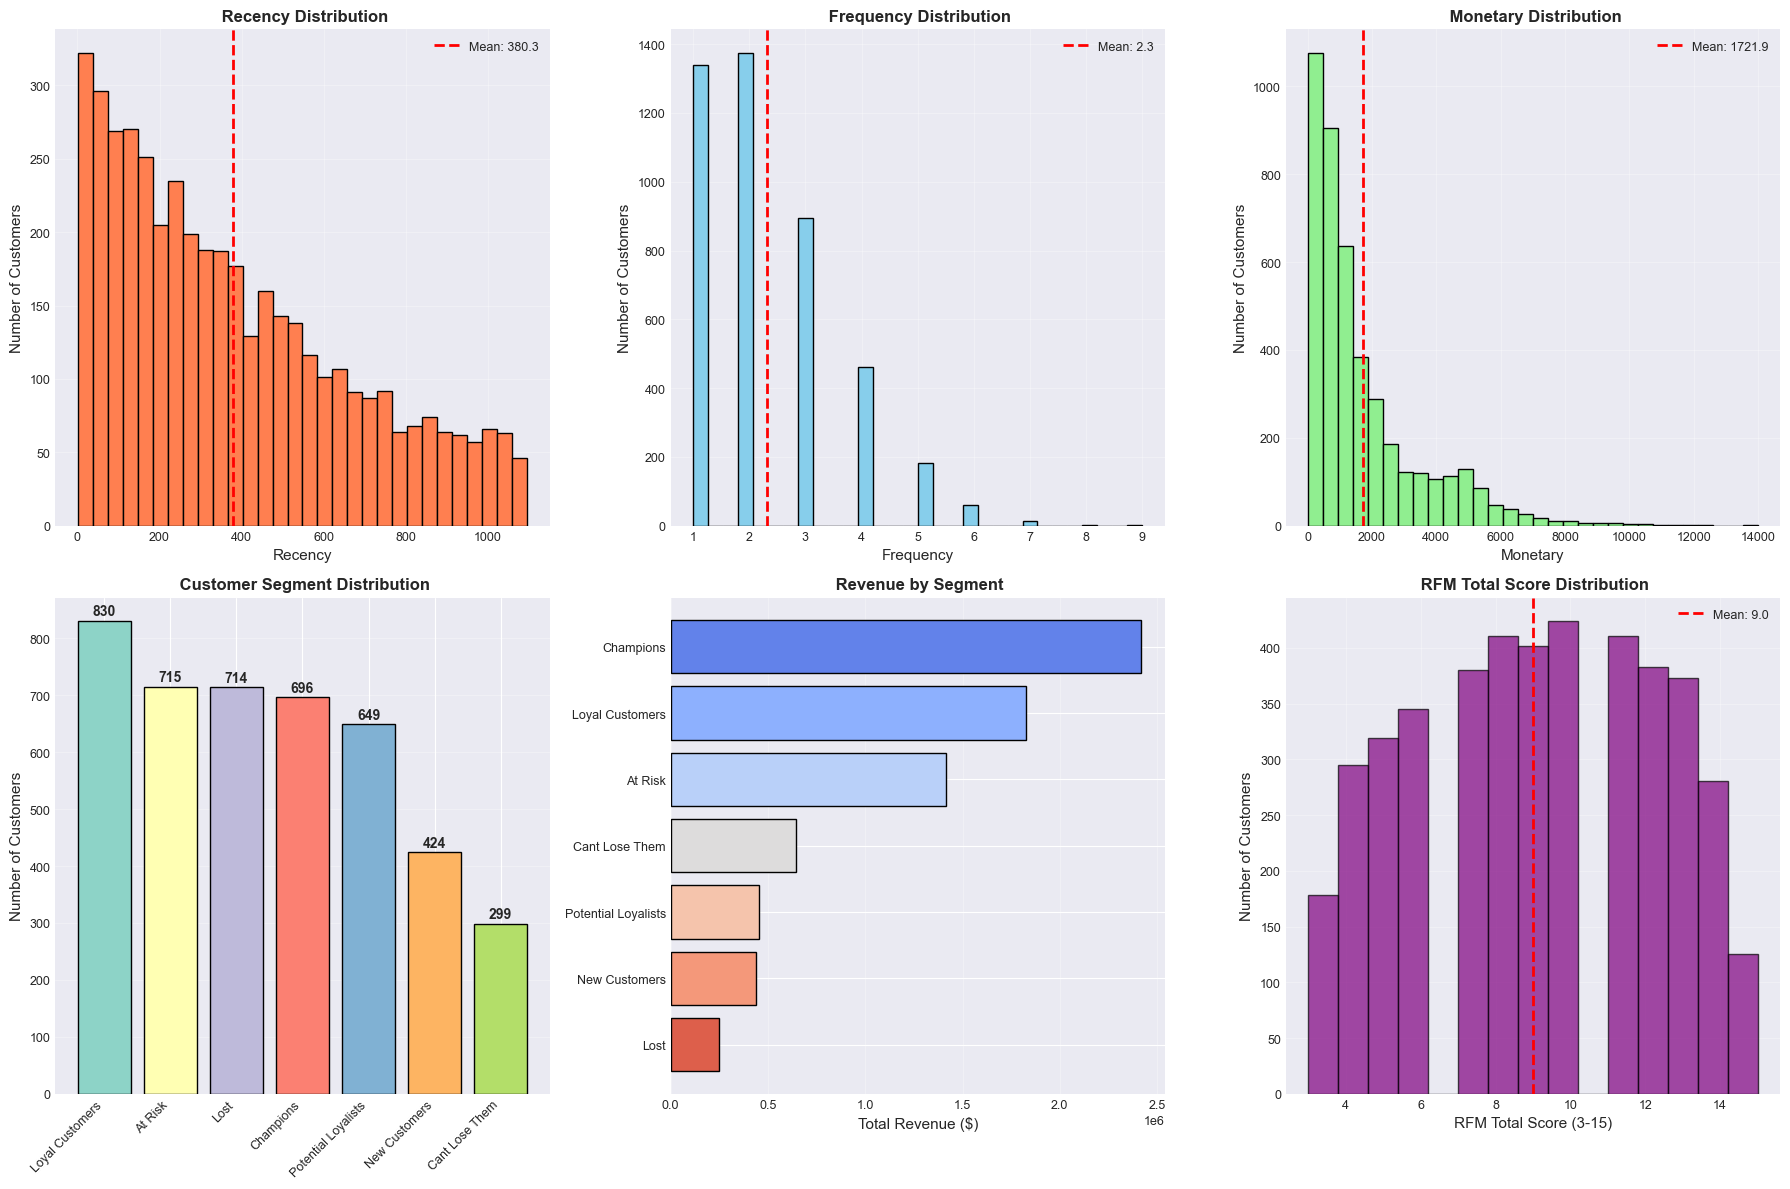

RFM SEGMENTATION ANALYSIS

 RFM Metrics Summary:
  • Average Recency: 380.3 days
  • Average Frequency: 2.31 orders
  • Average Monetary: $1721.92
  • Median Monetary: $1048.00

 Customer Segments:

  Champions:
    Customers: 696 (16.1%)
    Avg Recency: 104.5 days
    Avg Frequency: 3.95 orders
    Total Revenue: $2,418,630.00

  Loyal Customers:
    Customers: 830 (19.2%)
    Avg Recency: 219.1 days
    Avg Frequency: 2.91 orders
    Total Revenue: $1,825,241.00

  At Risk:
    Customers: 715 (16.5%)
    Avg Recency: 608.2 days
    Avg Frequency: 2.63 orders
    Total Revenue: $1,417,121.00

  Cant Lose Them:
    Customers: 299 (6.9%)
    Avg Recency: 701.8 days
    Avg Frequency: 1.30 orders
    Total Revenue: $646,683.00

  Potential Loyalists:
    Customers: 649 (15.0%)
    Avg Recency: 249.3 days
    Avg Frequency: 1.88 orders
    Total Revenue: $455,562.00

  New Customers:
    Customers: 424 (9.8%)
    Avg Recency: 115.9 days
    Avg Frequency: 1.33 orders
    Total Revenue: $

In [20]:
# RFM Analysis
# Calculate RFM metrics for each customer
analysis_date = df_clean['order_date'].max() + timedelta(days=1)

rfm = df_clean.groupby('customer_id').agg({
    'order_date': lambda x: (analysis_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'revenue': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

# Create RFM scores (1-5, where 5 is best)
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=5, labels=[5, 4, 3, 2, 1], duplicates='drop')
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5], duplicates='drop')
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5], duplicates='drop')

# Convert scores to numeric
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

# Calculate RFM total score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Total'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

# Segment naming based on RFM scores
def segment_customer(row):
    if row['R_Score'] >= 4 and row['F_Score'] >= 4 and row['M_Score'] >= 4:
        return 'Champions'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return 'Loyal Customers'
    elif row['R_Score'] >= 4 and row['F_Score'] <= 2:
        return 'New Customers'
    elif row['R_Score'] <= 2 and row['F_Score'] >= 3:
        return 'At Risk'
    elif row['R_Score'] <= 2 and row['F_Score'] <= 2 and row['M_Score'] >= 3:
        return 'Cant Lose Them'
    elif row['R_Score'] <= 2:
        return 'Lost'
    else:
        return 'Potential Loyalists'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# Segment statistics
segment_stats = rfm.groupby('Segment').agg({
    'customer_id': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'sum'
}).reset_index()
segment_stats.columns = ['Segment', 'Customer_Count', 'Avg_Recency', 'Avg_Frequency', 'Total_Revenue']
segment_stats = segment_stats.sort_values('Total_Revenue', ascending=False)

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# RFM Histograms
for idx, metric in enumerate(['Recency', 'Frequency', 'Monetary']):
    axes[0, idx].hist(rfm[metric], bins=30, color=['coral', 'skyblue', 'lightgreen'][idx], edgecolor='black')
    axes[0, idx].set_title(f' {metric} Distribution', fontsize=12, fontweight='bold')
    axes[0, idx].set_xlabel(metric)
    axes[0, idx].set_ylabel('Number of Customers')
    axes[0, idx].axvline(rfm[metric].mean(), color='red', linestyle='--', linewidth=2, 
                        label=f'Mean: {rfm[metric].mean():.1f}')
    axes[0, idx].legend()
    axes[0, idx].grid(alpha=0.3)

# Segment Size
segment_counts = rfm['Segment'].value_counts()
axes[1, 0].bar(range(len(segment_counts)), segment_counts.values, 
               color=sns.color_palette('Set3', len(segment_counts)), edgecolor='black')
axes[1, 0].set_xticks(range(len(segment_counts)))
axes[1, 0].set_xticklabels(segment_counts.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Number of Customers')
axes[1, 0].set_title(' Customer Segment Distribution', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(segment_counts.values):
    axes[1, 0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Segment Revenue
axes[1, 1].barh(range(len(segment_stats)), segment_stats['Total_Revenue'], 
                color=sns.color_palette('coolwarm', len(segment_stats)), edgecolor='black')
axes[1, 1].set_yticks(range(len(segment_stats)))
axes[1, 1].set_yticklabels(segment_stats['Segment'])
axes[1, 1].set_xlabel('Total Revenue ($)')
axes[1, 1].set_title(' Revenue by Segment', fontsize=12, fontweight='bold')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(axis='x', alpha=0.3)

# RFM Score Distribution
axes[1, 2].hist(rfm['RFM_Total'], bins=15, color='purple', edgecolor='black', alpha=0.7)
axes[1, 2].set_title(' RFM Total Score Distribution', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('RFM Total Score (3-15)')
axes[1, 2].set_ylabel('Number of Customers')
axes[1, 2].axvline(rfm['RFM_Total'].mean(), color='red', linestyle='--', linewidth=2, 
                  label=f'Mean: {rfm["RFM_Total"].mean():.1f}')
axes[1, 2].legend()
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Insights
print("="*80)
print("RFM SEGMENTATION ANALYSIS")
print("="*80)
print(f"\n RFM Metrics Summary:")
print(f"  • Average Recency: {rfm['Recency'].mean():.1f} days")
print(f"  • Average Frequency: {rfm['Frequency'].mean():.2f} orders")
print(f"  • Average Monetary: ${rfm['Monetary'].mean():.2f}")
print(f"  • Median Monetary: ${rfm['Monetary'].median():.2f}")

print(f"\n Customer Segments:")
for _, row in segment_stats.iterrows():
    print(f"\n  {row['Segment']}:")
    print(f"    Customers: {row['Customer_Count']:,} ({row['Customer_Count']/len(rfm)*100:.1f}%)")
    print(f"    Avg Recency: {row['Avg_Recency']:.1f} days")
    print(f"    Avg Frequency: {row['Avg_Frequency']:.2f} orders")
    print(f"    Total Revenue: ${row['Total_Revenue']:,.2f}")

print(f"\n Top Segment:")
top_segment = segment_stats.iloc[0]
print(f"  • {top_segment['Segment']}: ${top_segment['Total_Revenue']:,.2f} revenue")
print(f"  • {top_segment['Customer_Count']} customers generating {top_segment['Total_Revenue']/segment_stats['Total_Revenue'].sum()*100:.1f}% of revenue")

print("\n RFM segmentation complete!")

# Section 21: Visualising RFM Behaviour

Advanced RFM visualizations including scatter plots, heatmaps, and segment profitability analysis.

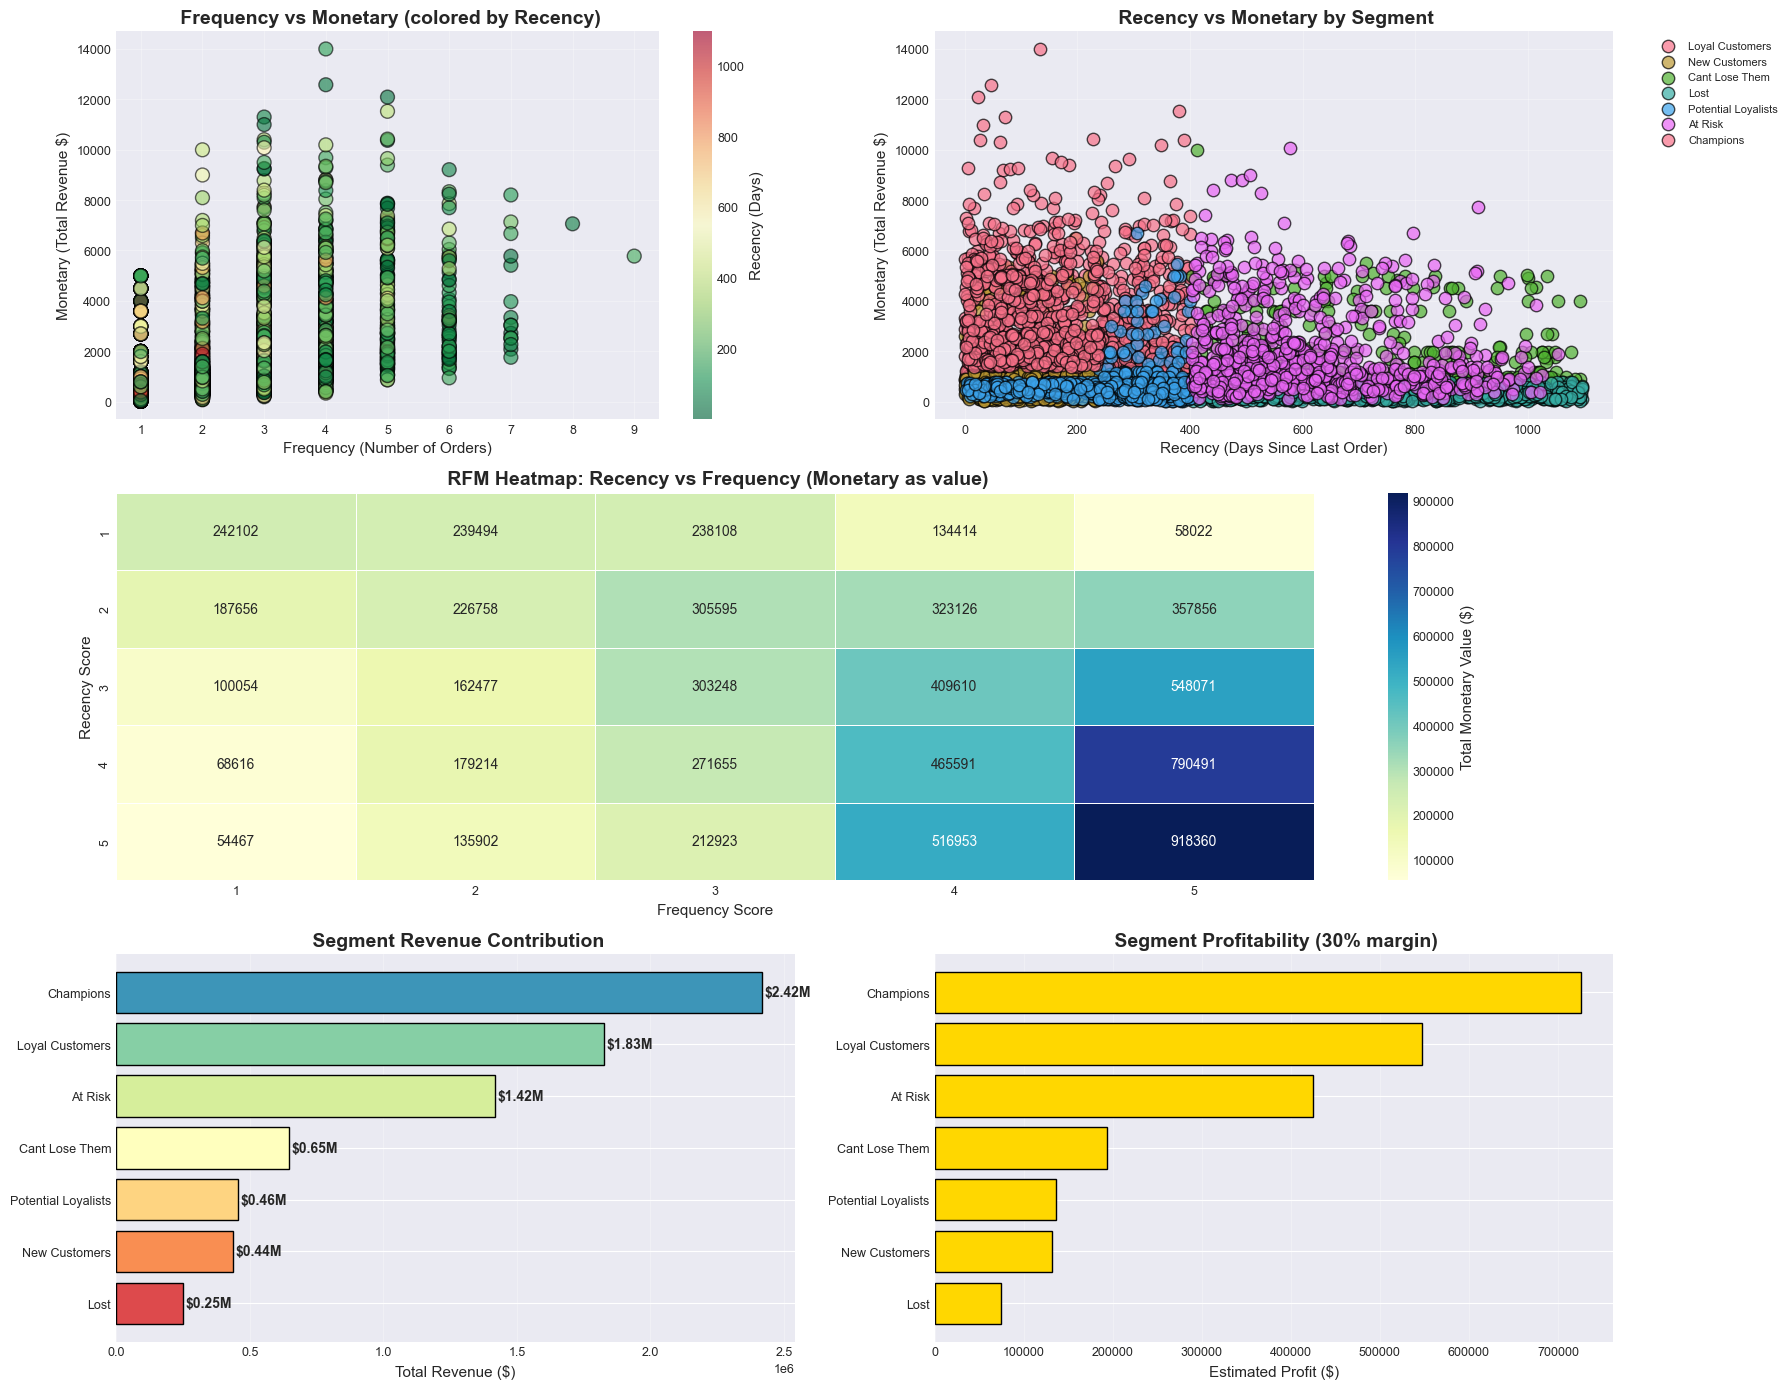

RFM BEHAVIOR VISUALIZATION INSIGHTS

 Segment Characteristics:

  Champions:
    Revenue per Customer: $3,475.04
    Avg Purchase Frequency: 3.95 orders
    Avg Days Since Last Order: 104.5 days

  Loyal Customers:
    Revenue per Customer: $2,199.09
    Avg Purchase Frequency: 2.91 orders
    Avg Days Since Last Order: 219.1 days

  At Risk:
    Revenue per Customer: $1,981.99
    Avg Purchase Frequency: 2.63 orders
    Avg Days Since Last Order: 608.2 days

  Cant Lose Them:
    Revenue per Customer: $2,162.82
    Avg Purchase Frequency: 1.30 orders
    Avg Days Since Last Order: 701.8 days

  Potential Loyalists:
    Revenue per Customer: $701.94
    Avg Purchase Frequency: 1.88 orders
    Avg Days Since Last Order: 249.3 days

  New Customers:
    Revenue per Customer: $1,033.49
    Avg Purchase Frequency: 1.33 orders
    Avg Days Since Last Order: 115.9 days

  Lost:
    Revenue per Customer: $349.20
    Avg Purchase Frequency: 1.10 orders
    Avg Days Since Last Order: 749.5 days

In [21]:
# Advanced RFM Visualizations
fig = plt.figure(figsize=(18, 14))
gs = GridSpec(3, 2, figure=fig)

# Frequency vs Monetary scatter plot
ax1 = fig.add_subplot(gs[0, 0])
scatter = ax1.scatter(rfm['Frequency'], rfm['Monetary'], c=rfm['Recency'], 
                     s=100, alpha=0.6, cmap='RdYlGn_r', edgecolors='black')
ax1.set_xlabel('Frequency (Number of Orders)')
ax1.set_ylabel('Monetary (Total Revenue $)')
ax1.set_title(' Frequency vs Monetary (colored by Recency)', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3)
plt.colorbar(scatter, ax=ax1, label='Recency (Days)')

# Recency vs Monetary scatter plot
ax2 = fig.add_subplot(gs[0, 1])
for segment in rfm['Segment'].unique():
    segment_data = rfm[rfm['Segment'] == segment]
    ax2.scatter(segment_data['Recency'], segment_data['Monetary'], 
               label=segment, s=80, alpha=0.7, edgecolors='black')
ax2.set_xlabel('Recency (Days Since Last Order)')
ax2.set_ylabel('Monetary (Total Revenue $)')
ax2.set_title(' Recency vs Monetary by Segment', fontsize=14, fontweight='bold')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax2.grid(alpha=0.3)

# RFM Heatmap (R vs F with M as color)
ax3 = fig.add_subplot(gs[1, :])
pivot_rfm = rfm.groupby(['R_Score', 'F_Score'])['Monetary'].sum().reset_index()
pivot_table = pivot_rfm.pivot(index='R_Score', columns='F_Score', values='Monetary')
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu', ax=ax3, 
            cbar_kws={'label': 'Total Monetary Value ($)'}, linewidths=0.5)
ax3.set_title(' RFM Heatmap: Recency vs Frequency (Monetary as value)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Frequency Score')
ax3.set_ylabel('Recency Score')

# Segment Revenue Contribution
ax4 = fig.add_subplot(gs[2, 0])
segment_revenue = segment_stats.sort_values('Total_Revenue', ascending=True)
bars = ax4.barh(range(len(segment_revenue)), segment_revenue['Total_Revenue'], 
                color=sns.color_palette('Spectral', len(segment_revenue)), edgecolor='black')
ax4.set_yticks(range(len(segment_revenue)))
ax4.set_yticklabels(segment_revenue['Segment'])
ax4.set_xlabel('Total Revenue ($)')
ax4.set_title(' Segment Revenue Contribution', fontsize=14, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)
for i, (bar, row) in enumerate(zip(bars, segment_revenue.itertuples())):
    ax4.text(row.Total_Revenue + 10000, i, f'${row.Total_Revenue/1e6:.2f}M', 
             va='center', fontweight='bold')

# Segment Profitability (assuming 30% margin)
ax5 = fig.add_subplot(gs[2, 1])
segment_stats_copy = segment_stats.copy()
segment_stats_copy['Profit'] = segment_stats_copy['Total_Revenue'] * 0.30
segment_stats_copy = segment_stats_copy.sort_values('Profit', ascending=True)
ax5.barh(range(len(segment_stats_copy)), segment_stats_copy['Profit'], 
         color='gold', edgecolor='black')
ax5.set_yticks(range(len(segment_stats_copy)))
ax5.set_yticklabels(segment_stats_copy['Segment'])
ax5.set_xlabel('Estimated Profit ($)')
ax5.set_title(' Segment Profitability (30% margin)', fontsize=14, fontweight='bold')
ax5.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Additional Analysis
print("="*80)
print("RFM BEHAVIOR VISUALIZATION INSIGHTS")
print("="*80)

# Segment characteristics
print(f"\n Segment Characteristics:")
for _, row in segment_stats.iterrows():
    revenue_per_customer = row['Total_Revenue'] / row['Customer_Count']
    print(f"\n  {row['Segment']}:")
    print(f"    Revenue per Customer: ${revenue_per_customer:,.2f}")
    print(f"    Avg Purchase Frequency: {row['Avg_Frequency']:.2f} orders")
    print(f"    Avg Days Since Last Order: {row['Avg_Recency']:.1f} days")

# Champion customers analysis
champions = rfm[rfm['Segment'] == 'Champions']
if len(champions) > 0:
    print(f"\n Champions Deep Dive:")
    print(f"  • Count: {len(champions)} customers")
    print(f"  • Total Revenue: ${champions['Monetary'].sum():,.2f}")
    print(f"  • Avg Revenue per Champion: ${champions['Monetary'].mean():,.2f}")
    print(f"  • Avg Frequency: {champions['Frequency'].mean():.2f} orders")
    print(f"  • Avg Recency: {champions['Recency'].mean():.1f} days")

# At Risk customers
at_risk = rfm[rfm['Segment'] == 'At Risk']
if len(at_risk) > 0:
    print(f"\n️ At Risk Customers:")
    print(f"  • Count: {len(at_risk)} customers")
    print(f"  • Potential Revenue at Risk: ${at_risk['Monetary'].sum():,.2f}")
    print(f"  • Action: Implement win-back campaigns immediately")

print("\n RFM visualization complete!")

# Section 22: Average Order Value Analysis

Analyzing AOV trends over time, by segment, and by category with volatility assessment.

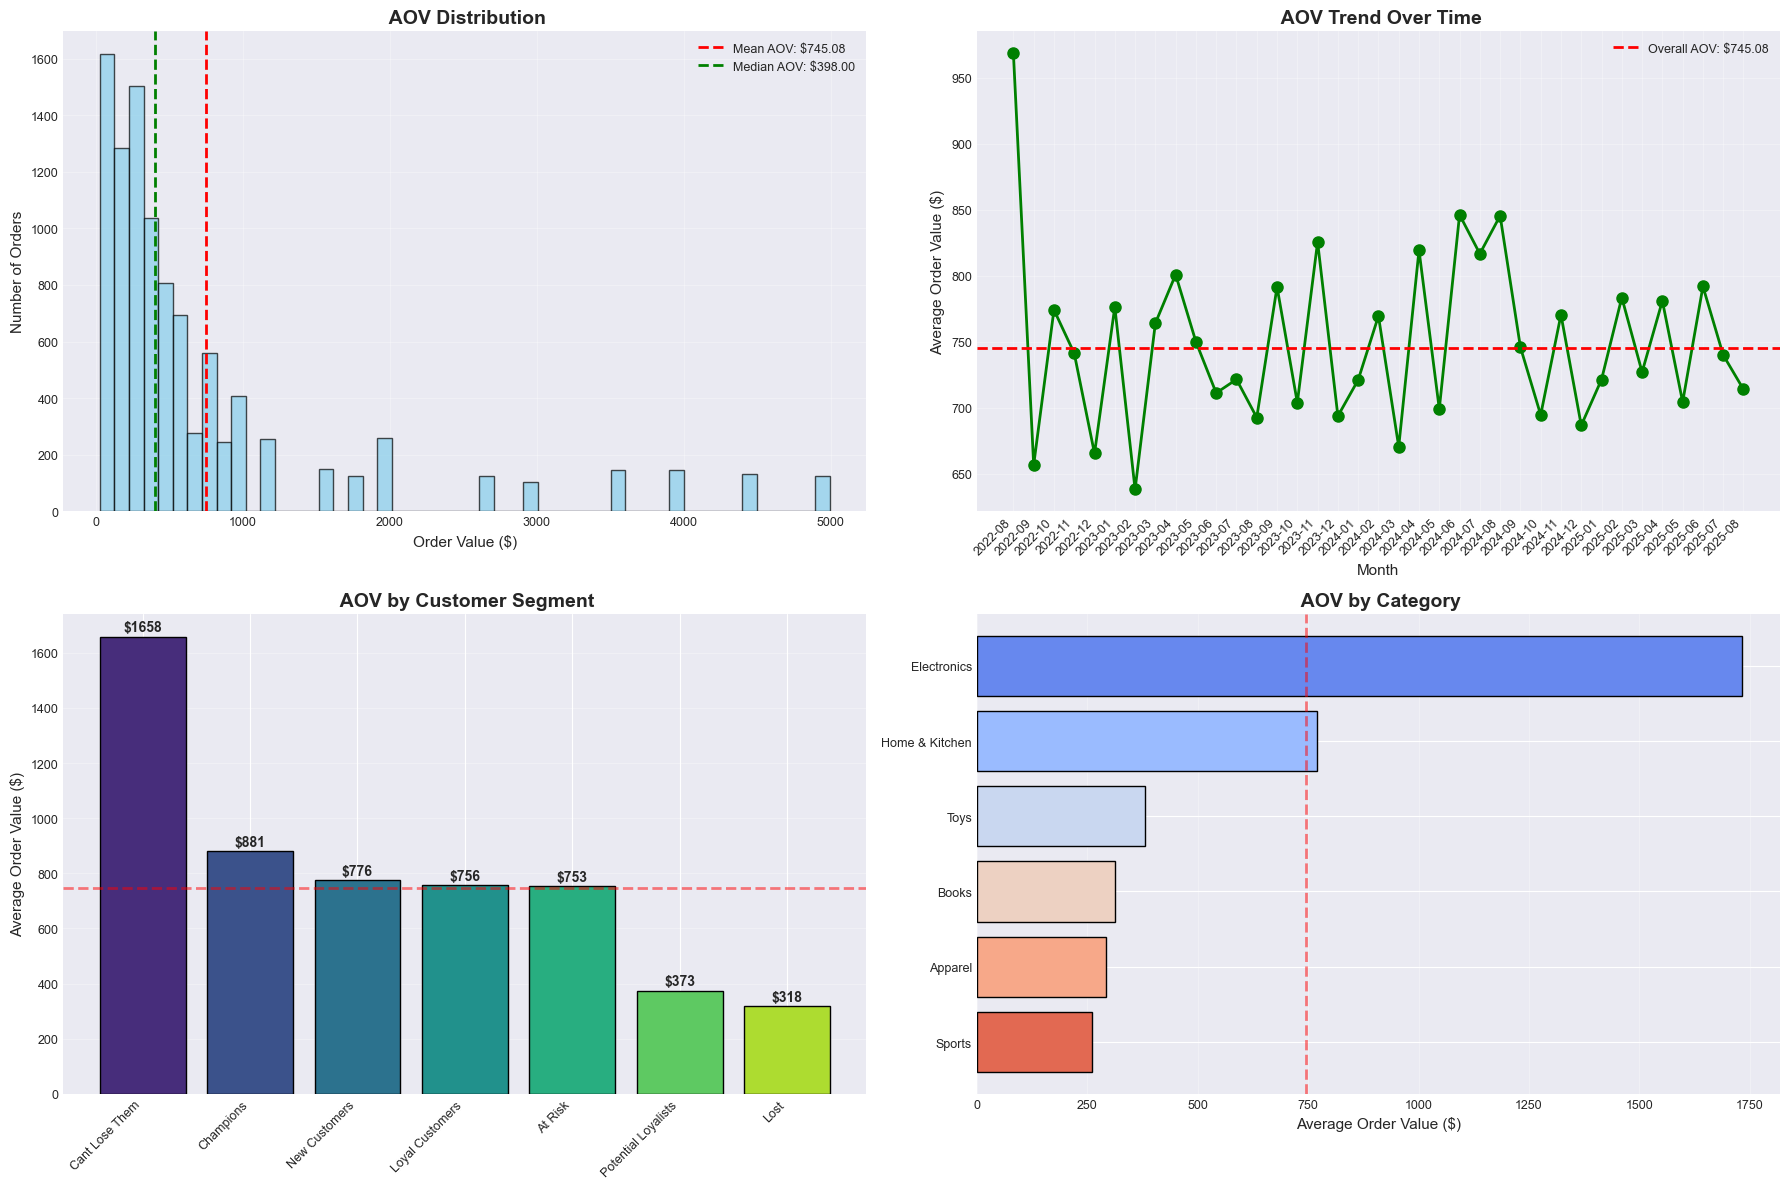

AVERAGE ORDER VALUE ANALYSIS

 Overall AOV Metrics:
  • Mean AOV: $745.08
  • Median AOV: $398.00
  • Std Dev: $1012.44
  • Min AOV: $25.00
  • Max AOV: $4995.00

 AOV Volatility:
  • Monthly AOV Std Dev: $65.13
  • Coefficient of Variation: 8.69%

 Highest AOV Segment:
  • Cant Lose Them: $1658.16
  • 222.5% of overall AOV

 Highest AOV Category:
  • Electronics: $1731.65

 AOV Growth:
  • First Month AOV: $968.75
  • Last Month AOV: $714.00
  • Growth: -26.30%

 AOV analysis complete!


In [22]:
# Average Order Value (AOV) Analysis
overall_aov = df_clean['revenue'].sum() / df_clean['order_id'].nunique()

# AOV over time
monthly_aov = df_clean.groupby('year_month').agg({
    'revenue': 'sum',
    'order_id': 'nunique'
}).reset_index()
monthly_aov['aov'] = monthly_aov['revenue'] / monthly_aov['order_id']
monthly_aov['year_month_str'] = monthly_aov['year_month'].astype(str)

# AOV by segment (merge with RFM)
df_with_segment = df_clean.merge(rfm[['customer_id', 'Segment']], on='customer_id', how='left')
segment_aov = df_with_segment.groupby('Segment').agg({
    'revenue': 'sum',
    'order_id': 'nunique'
}).reset_index()
segment_aov['aov'] = segment_aov['revenue'] / segment_aov['order_id']
segment_aov = segment_aov.sort_values('aov', ascending=False)

# AOV by category
category_aov = df_clean.groupby('category').agg({
    'revenue': 'sum',
    'order_id': 'nunique'
}).reset_index()
category_aov['aov'] = category_aov['revenue'] / category_aov['order_id']
category_aov = category_aov.sort_values('aov', ascending=False)

# AOV distribution
aov_per_order = df_clean.groupby('order_id')['revenue'].sum()

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# AOV Distribution
axes[0, 0].hist(aov_per_order, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(overall_aov, color='red', linestyle='--', linewidth=2, 
                   label=f'Mean AOV: ${overall_aov:.2f}')
axes[0, 0].axvline(aov_per_order.median(), color='green', linestyle='--', linewidth=2, 
                   label=f'Median AOV: ${aov_per_order.median():.2f}')
axes[0, 0].set_title(' AOV Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Order Value ($)')
axes[0, 0].set_ylabel('Number of Orders')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# AOV Over Time
axes[0, 1].plot(range(len(monthly_aov)), monthly_aov['aov'], 
                marker='o', linewidth=2, markersize=8, color='green')
axes[0, 1].axhline(overall_aov, color='red', linestyle='--', linewidth=2, 
                   label=f'Overall AOV: ${overall_aov:.2f}')
axes[0, 1].set_title(' AOV Trend Over Time', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average Order Value ($)')
axes[0, 1].set_xticks(range(len(monthly_aov)))
axes[0, 1].set_xticklabels(monthly_aov['year_month_str'], rotation=45, ha='right')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# AOV by Segment
axes[1, 0].bar(range(len(segment_aov)), segment_aov['aov'], 
               color=sns.color_palette('viridis', len(segment_aov)), edgecolor='black')
axes[1, 0].set_xticks(range(len(segment_aov)))
axes[1, 0].set_xticklabels(segment_aov['Segment'], rotation=45, ha='right')
axes[1, 0].set_ylabel('Average Order Value ($)')
axes[1, 0].set_title(' AOV by Customer Segment', fontsize=14, fontweight='bold')
axes[1, 0].axhline(overall_aov, color='red', linestyle='--', linewidth=2, alpha=0.5)
axes[1, 0].grid(axis='y', alpha=0.3)
for i, row in enumerate(segment_aov.itertuples()):
    axes[1, 0].text(i, row.aov + 20, f'${row.aov:.0f}', ha='center', fontweight='bold')

# AOV by Category
axes[1, 1].barh(range(len(category_aov)), category_aov['aov'], 
                color=sns.color_palette('coolwarm', len(category_aov)), edgecolor='black')
axes[1, 1].set_yticks(range(len(category_aov)))
axes[1, 1].set_yticklabels(category_aov['category'])
axes[1, 1].set_xlabel('Average Order Value ($)')
axes[1, 1].set_title(' AOV by Category', fontsize=14, fontweight='bold')
axes[1, 1].axvline(overall_aov, color='red', linestyle='--', linewidth=2, alpha=0.5)
axes[1, 1].invert_yaxis()
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Insights
print("="*80)
print("AVERAGE ORDER VALUE ANALYSIS")
print("="*80)
print(f"\n Overall AOV Metrics:")
print(f"  • Mean AOV: ${overall_aov:.2f}")
print(f"  • Median AOV: ${aov_per_order.median():.2f}")
print(f"  • Std Dev: ${aov_per_order.std():.2f}")
print(f"  • Min AOV: ${aov_per_order.min():.2f}")
print(f"  • Max AOV: ${aov_per_order.max():.2f}")

print(f"\n AOV Volatility:")
aov_volatility = monthly_aov['aov'].std()
print(f"  • Monthly AOV Std Dev: ${aov_volatility:.2f}")
print(f"  • Coefficient of Variation: {aov_volatility / monthly_aov['aov'].mean() * 100:.2f}%")

print(f"\n Highest AOV Segment:")
top_segment_aov = segment_aov.iloc[0]
print(f"  • {top_segment_aov['Segment']}: ${top_segment_aov['aov']:.2f}")
print(f"  • {top_segment_aov['aov']/overall_aov*100:.1f}% of overall AOV")

print(f"\n Highest AOV Category:")
top_category_aov = category_aov.iloc[0]
print(f"  • {top_category_aov['category']}: ${top_category_aov['aov']:.2f}")

print(f"\n AOV Growth:")
if len(monthly_aov) >= 2:
    first_aov = monthly_aov.iloc[0]['aov']
    last_aov = monthly_aov.iloc[-1]['aov']
    aov_growth = ((last_aov - first_aov) / first_aov * 100)
    print(f"  • First Month AOV: ${first_aov:.2f}")
    print(f"  • Last Month AOV: ${last_aov:.2f}")
    print(f"  • Growth: {aov_growth:+.2f}%")

print("\n AOV analysis complete!")

# Section 23: Revenue Concentration Analysis

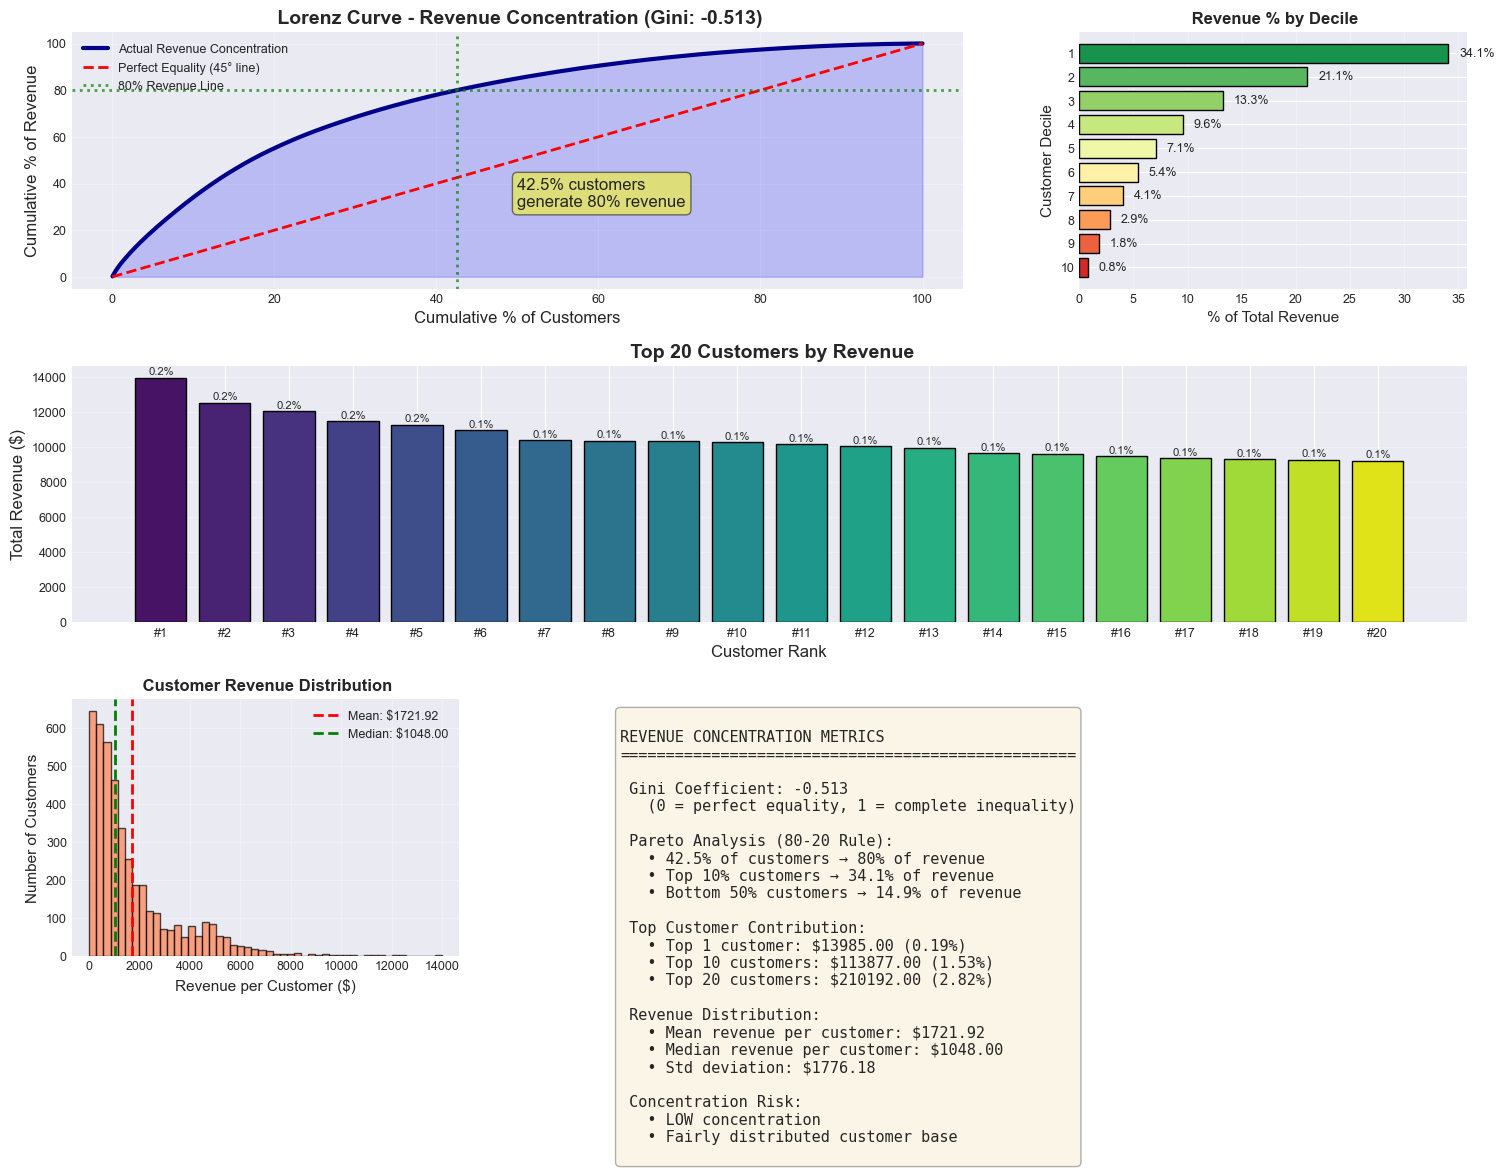

REVENUE CONCENTRATION ANALYSIS

 Concentration Metrics:
  • Gini Coefficient: -0.513
  • 42.5% of customers generate 80% of revenue

 Top Performers:
  • Top 1%: 34.1% of revenue
  • Top 10%: 34.1% of revenue
  • Top 20 customers: $210192.00 (2.82%)

 Revenue concentration analysis complete!


In [23]:
# Revenue Concentration Analysis - Understanding how revenue is distributed across customers
customer_revenue = df_clean.groupby('customer_id')['revenue'].sum().sort_values(ascending=False).reset_index()
customer_revenue['cumulative_revenue'] = customer_revenue['revenue'].cumsum()
customer_revenue['cumulative_pct'] = (customer_revenue['cumulative_revenue'] / customer_revenue['revenue'].sum()) * 100
customer_revenue['customer_pct'] = (np.arange(1, len(customer_revenue) + 1) / len(customer_revenue)) * 100

# Create deciles
customer_revenue['decile'] = pd.qcut(customer_revenue.index, q=10, labels=False, duplicates='drop') + 1

# Decile-wise revenue
decile_revenue = customer_revenue.groupby('decile').agg({
    'revenue': 'sum',
    'customer_id': 'count'
}).reset_index()
decile_revenue['revenue_pct'] = (decile_revenue['revenue'] / decile_revenue['revenue'].sum()) * 100
decile_revenue['customer_pct'] = (decile_revenue['customer_id'] / decile_revenue['customer_id'].sum()) * 100

# Calculate Gini-style coefficient for revenue concentration
def gini_coefficient(x):
    """Calculate Gini coefficient for concentration measure"""
    sorted_x = np.sort(x)
    n = len(x)
    cumsum = np.cumsum(sorted_x)
    return (2 * np.sum((n - np.arange(1, n+1) + 0.5) * sorted_x)) / (n * np.sum(sorted_x)) - 1

gini = gini_coefficient(customer_revenue['revenue'].values)

# Pareto 80-20 analysis
revenue_80_pct = customer_revenue['revenue'].sum() * 0.8
customers_for_80_revenue = (customer_revenue['cumulative_pct'] <= 80).sum()
pct_customers_for_80_revenue = (customers_for_80_revenue / len(customer_revenue)) * 100

# Visualizations
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Lorenz Curve (Pareto)
ax1 = fig.add_subplot(gs[0, :2])
ax1.plot(customer_revenue['customer_pct'], customer_revenue['cumulative_pct'], 
         linewidth=3, color='darkblue', label='Actual Revenue Concentration')
ax1.plot([0, 100], [0, 100], linestyle='--', color='red', linewidth=2, 
         label='Perfect Equality (45° line)')
ax1.axhline(80, color='green', linestyle=':', linewidth=2, alpha=0.7, label='80% Revenue Line')
ax1.axvline(pct_customers_for_80_revenue, color='green', linestyle=':', linewidth=2, alpha=0.7)
ax1.fill_between(customer_revenue['customer_pct'], 0, customer_revenue['cumulative_pct'], 
                 alpha=0.2, color='blue')
ax1.set_xlabel('Cumulative % of Customers', fontsize=12)
ax1.set_ylabel('Cumulative % of Revenue', fontsize=12)
ax1.set_title(f' Lorenz Curve - Revenue Concentration (Gini: {gini:.3f})', 
              fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')
ax1.grid(alpha=0.3)
ax1.text(50, 30, f'{pct_customers_for_80_revenue:.1f}% customers\ngenerate 80% revenue', 
         fontsize=12, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

# Revenue distribution by decile
ax2 = fig.add_subplot(gs[0, 2])
colors = sns.color_palette('RdYlGn_r', len(decile_revenue))
ax2.barh(decile_revenue['decile'].astype(str), decile_revenue['revenue_pct'], 
         color=colors, edgecolor='black')
ax2.set_xlabel('% of Total Revenue', fontsize=11)
ax2.set_ylabel('Customer Decile', fontsize=11)
ax2.set_title(' Revenue % by Decile', fontsize=12, fontweight='bold')
ax2.invert_yaxis()
for i, row in enumerate(decile_revenue.itertuples()):
    ax2.text(row.revenue_pct + 1, i, f'{row.revenue_pct:.1f}%', va='center', fontsize=9)
ax2.grid(axis='x', alpha=0.3)

# Top 20 customers
ax3 = fig.add_subplot(gs[1, :])
top_20 = customer_revenue.head(20)
bars = ax3.bar(range(len(top_20)), top_20['revenue'], 
               color=sns.color_palette('viridis', len(top_20)), edgecolor='black')
ax3.set_xlabel('Customer Rank', fontsize=12)
ax3.set_ylabel('Total Revenue ($)', fontsize=12)
ax3.set_title(' Top 20 Customers by Revenue', fontsize=14, fontweight='bold')
ax3.set_xticks(range(len(top_20)))
ax3.set_xticklabels([f'#{i+1}' for i in range(len(top_20))], rotation=0)
ax3.grid(axis='y', alpha=0.3)

# Add revenue percentages on bars
for i, (bar, rev) in enumerate(zip(bars, top_20['revenue'])):
    pct = (rev / customer_revenue['revenue'].sum()) * 100
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             f'{pct:.1f}%', ha='center', va='bottom', fontsize=8)

# Revenue per customer histogram
ax4 = fig.add_subplot(gs[2, 0])
ax4.hist(customer_revenue['revenue'], bins=50, color='coral', edgecolor='black', alpha=0.7)
ax4.set_xlabel('Revenue per Customer ($)', fontsize=11)
ax4.set_ylabel('Number of Customers', fontsize=11)
ax4.set_title(' Customer Revenue Distribution', fontsize=12, fontweight='bold')
ax4.axvline(customer_revenue['revenue'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: ${customer_revenue["revenue"].mean():.2f}')
ax4.axvline(customer_revenue['revenue'].median(), color='green', linestyle='--', linewidth=2, 
            label=f'Median: ${customer_revenue["revenue"].median():.2f}')
ax4.legend()
ax4.grid(alpha=0.3)

# Concentration metrics summary
ax5 = fig.add_subplot(gs[2, 1:])
ax5.axis('off')

metrics_text = f"""
REVENUE CONCENTRATION METRICS
{'='*50}

 Gini Coefficient: {gini:.3f}
   (0 = perfect equality, 1 = complete inequality)

 Pareto Analysis (80-20 Rule):
   • {pct_customers_for_80_revenue:.1f}% of customers → 80% of revenue
   • Top 10% customers → {decile_revenue.iloc[0]['revenue_pct']:.1f}% of revenue
   • Bottom 50% customers → {decile_revenue.iloc[5:]['revenue_pct'].sum():.1f}% of revenue

 Top Customer Contribution:
   • Top 1 customer: ${customer_revenue.iloc[0]['revenue']:.2f} ({customer_revenue.iloc[0]['revenue']/customer_revenue['revenue'].sum()*100:.2f}%)
   • Top 10 customers: ${customer_revenue.head(10)['revenue'].sum():.2f} ({customer_revenue.head(10)['revenue'].sum()/customer_revenue['revenue'].sum()*100:.2f}%)
   • Top 20 customers: ${top_20['revenue'].sum():.2f} ({top_20['revenue'].sum()/customer_revenue['revenue'].sum()*100:.2f}%)

 Revenue Distribution:
   • Mean revenue per customer: ${customer_revenue['revenue'].mean():.2f}
   • Median revenue per customer: ${customer_revenue['revenue'].median():.2f}
   • Std deviation: ${customer_revenue['revenue'].std():.2f}

 Concentration Risk:
   • {'HIGH' if gini > 0.6 else 'MODERATE' if gini > 0.4 else 'LOW'} concentration
   • {'Revenue heavily dependent on few customers' if pct_customers_for_80_revenue < 20 else 'Fairly distributed customer base'}
"""

ax5.text(0.05, 0.95, metrics_text, transform=ax5.transAxes, 
         fontsize=11, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.show()

print("="*80)
print("REVENUE CONCENTRATION ANALYSIS")
print("="*80)
print(f"\n Concentration Metrics:")
print(f"  • Gini Coefficient: {gini:.3f}")
print(f"  • {pct_customers_for_80_revenue:.1f}% of customers generate 80% of revenue")
print(f"\n Top Performers:")
print(f"  • Top 1%: {decile_revenue.iloc[0]['revenue_pct']:.1f}% of revenue")
print(f"  • Top 10%: {decile_revenue.iloc[0]['revenue_pct']:.1f}% of revenue")
print(f"  • Top 20 customers: ${top_20['revenue'].sum():.2f} ({top_20['revenue'].sum()/customer_revenue['revenue'].sum()*100:.2f}%)")
print("\n Revenue concentration analysis complete!")

# Section 24: Repeat Purchase Behaviour

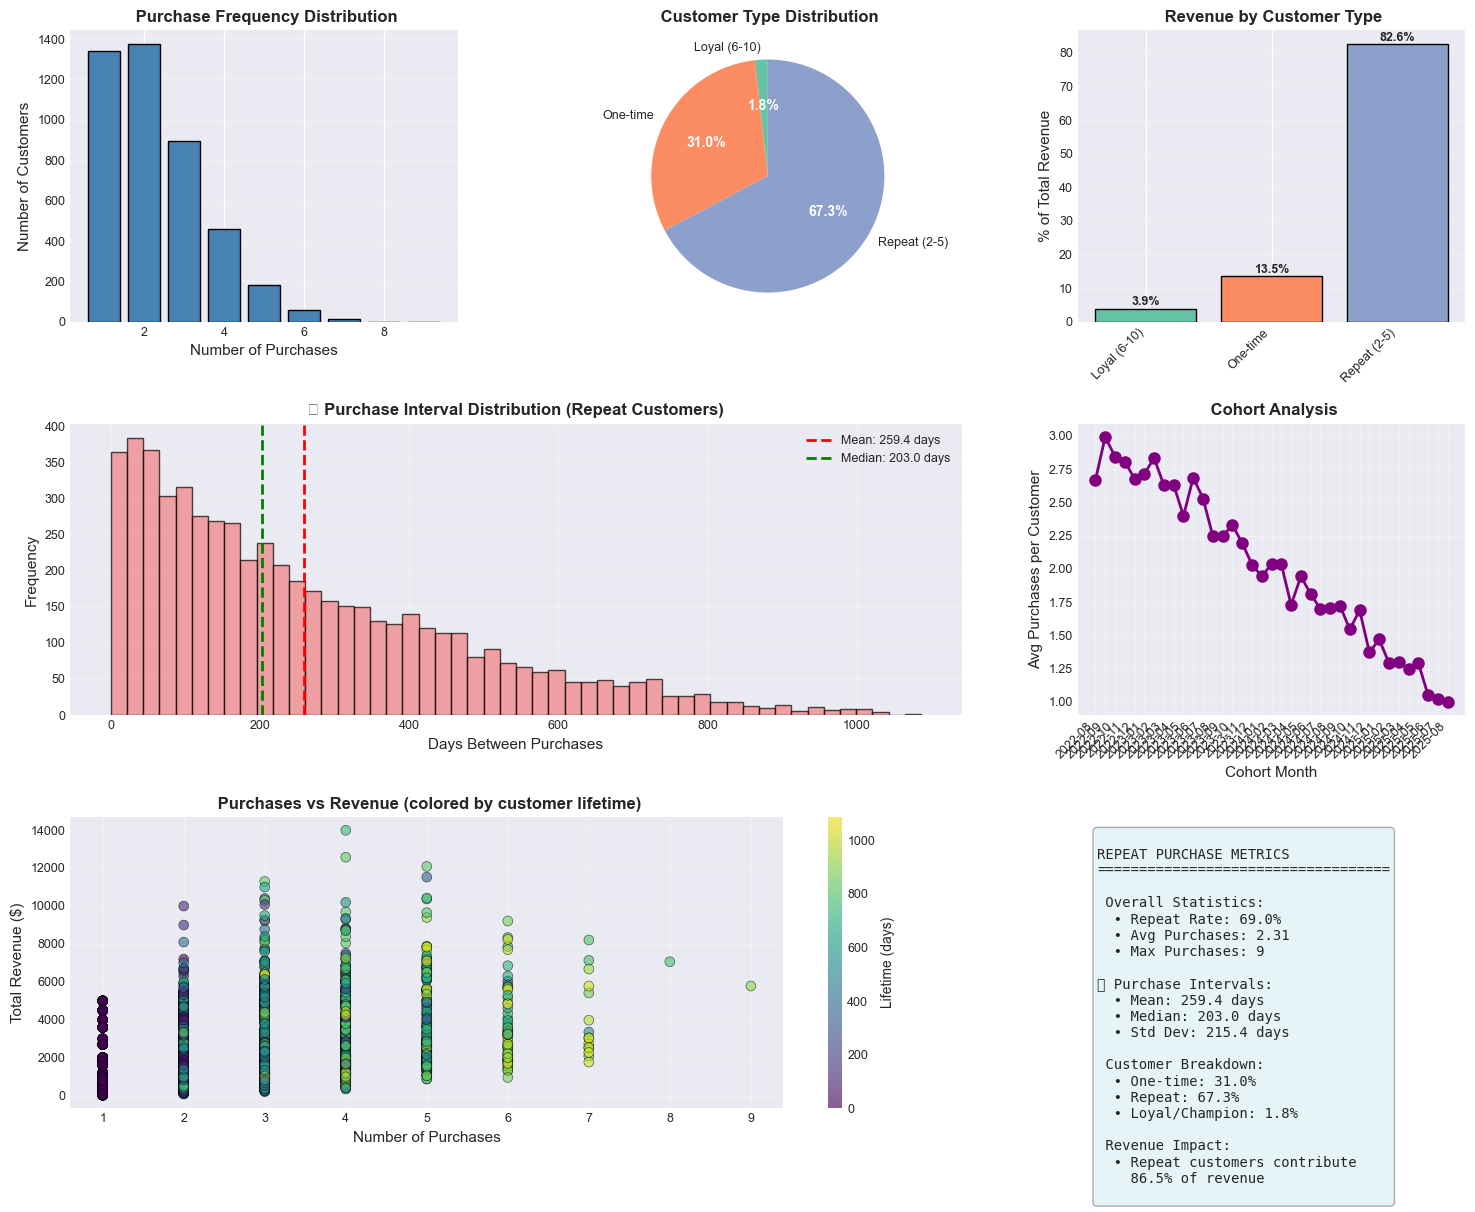

REPEAT PURCHASE BEHAVIOUR ANALYSIS

 Key Metrics:
  • Total Customers: 4,327
  • Repeat Customers: 2,987 (69.0%)
  • Average Purchases: 2.31

️ Purchase Timing:
  • Average Interval: 259.4 days
  • Median Interval: 203.0 days

 Revenue Contribution:
  • Loyal (6-10): 3.9% of revenue (1.8% of customers)
  • One-time: 13.5% of revenue (31.0% of customers)
  • Repeat (2-5): 82.6% of revenue (67.3% of customers)

 Repeat purchase analysis complete!


In [24]:
# Repeat Purchase Behaviour Analysis
# Get purchase counts per customer
purchase_counts = df_clean.groupby('customer_id').agg({
    'order_id': 'nunique',
    'order_date': ['min', 'max'],
    'revenue': 'sum'
}).reset_index()
purchase_counts.columns = ['customer_id', 'purchase_count', 'first_purchase', 'last_purchase', 'total_revenue']

# Customer lifetime in days
purchase_counts['lifetime_days'] = (purchase_counts['last_purchase'] - purchase_counts['first_purchase']).dt.days

# Categorize customers
purchase_counts['customer_type'] = purchase_counts['purchase_count'].apply(
    lambda x: 'One-time' if x == 1 else 'Repeat (2-5)' if x <= 5 else 'Loyal (6-10)' if x <= 10 else 'Champion (10+)'
)

# Customer type distribution
customer_type_dist = purchase_counts.groupby('customer_type').agg({
    'customer_id': 'count',
    'total_revenue': 'sum',
    'purchase_count': 'mean'
}).reset_index()
customer_type_dist.columns = ['customer_type', 'num_customers', 'total_revenue', 'avg_purchases']
customer_type_dist['pct_customers'] = (customer_type_dist['num_customers'] / customer_type_dist['num_customers'].sum()) * 100
customer_type_dist['pct_revenue'] = (customer_type_dist['total_revenue'] / customer_type_dist['total_revenue'].sum()) * 100

# Repeat purchase rate
repeat_customers = (purchase_counts['purchase_count'] > 1).sum()
repeat_rate = (repeat_customers / len(purchase_counts)) * 100

# Purchase intervals for repeat customers
repeat_customer_ids = purchase_counts[purchase_counts['purchase_count'] > 1]['customer_id']
repeat_df = df_clean[df_clean['customer_id'].isin(repeat_customer_ids)].copy()
repeat_df = repeat_df.sort_values(['customer_id', 'order_date'])

# Calculate time between purchases
intervals = []
for customer_id in repeat_customer_ids:
    customer_orders = repeat_df[repeat_df['customer_id'] == customer_id]['order_date'].values
    if len(customer_orders) > 1:
        for i in range(1, len(customer_orders)):
            interval = (pd.to_datetime(customer_orders[i]) - pd.to_datetime(customer_orders[i-1])).days
            intervals.append(interval)

intervals = np.array(intervals)

# Cohort analysis - first purchase month
purchase_counts['cohort_month'] = purchase_counts['first_purchase'].dt.to_period('M')
cohort_data = purchase_counts.groupby('cohort_month').agg({
    'customer_id': 'count',
    'purchase_count': 'mean'
}).reset_index()
cohort_data.columns = ['cohort_month', 'customers', 'avg_purchases']
cohort_data['cohort_month_str'] = cohort_data['cohort_month'].astype(str)

# Visualizations
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# Purchase count distribution
ax1 = fig.add_subplot(gs[0, 0])
purchase_dist = purchase_counts['purchase_count'].value_counts().sort_index().head(15)
ax1.bar(purchase_dist.index, purchase_dist.values, color='steelblue', edgecolor='black')
ax1.set_xlabel('Number of Purchases', fontsize=11)
ax1.set_ylabel('Number of Customers', fontsize=11)
ax1.set_title(' Purchase Frequency Distribution', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Customer type pie chart
ax2 = fig.add_subplot(gs[0, 1])
colors = sns.color_palette('Set2', len(customer_type_dist))
wedges, texts, autotexts = ax2.pie(customer_type_dist['num_customers'], 
                                     labels=customer_type_dist['customer_type'],
                                     autopct='%1.1f%%', startangle=90, colors=colors)
ax2.set_title(' Customer Type Distribution', fontsize=12, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Revenue by customer type
ax3 = fig.add_subplot(gs[0, 2])
ax3.bar(range(len(customer_type_dist)), customer_type_dist['pct_revenue'], 
        color=colors, edgecolor='black')
ax3.set_xticks(range(len(customer_type_dist)))
ax3.set_xticklabels(customer_type_dist['customer_type'], rotation=45, ha='right')
ax3.set_ylabel('% of Total Revenue', fontsize=11)
ax3.set_title(' Revenue by Customer Type', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)
for i, pct in enumerate(customer_type_dist['pct_revenue']):
    ax3.text(i, pct + 1, f'{pct:.1f}%', ha='center', fontweight='bold', fontsize=9)

# Purchase intervals histogram
ax4 = fig.add_subplot(gs[1, :2])
if len(intervals) > 0:
    ax4.hist(intervals, bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
    ax4.axvline(intervals.mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {intervals.mean():.1f} days')
    ax4.axvline(np.median(intervals), color='green', linestyle='--', linewidth=2, 
                label=f'Median: {np.median(intervals):.1f} days')
    ax4.set_xlabel('Days Between Purchases', fontsize=11)
    ax4.set_ylabel('Frequency', fontsize=11)
    ax4.set_title('️ Purchase Interval Distribution (Repeat Customers)', fontsize=12, fontweight='bold')
    ax4.legend()
    ax4.grid(alpha=0.3)

# Cohort analysis
ax5 = fig.add_subplot(gs[1, 2])
ax5.plot(range(len(cohort_data)), cohort_data['avg_purchases'], 
         marker='o', linewidth=2, markersize=8, color='purple')
ax5.set_xlabel('Cohort Month', fontsize=11)
ax5.set_ylabel('Avg Purchases per Customer', fontsize=11)
ax5.set_title(' Cohort Analysis', fontsize=12, fontweight='bold')
ax5.set_xticks(range(len(cohort_data)))
ax5.set_xticklabels(cohort_data['cohort_month_str'], rotation=45, ha='right')
ax5.grid(alpha=0.3)

# Scatter: Purchases vs Revenue
ax6 = fig.add_subplot(gs[2, :2])
scatter = ax6.scatter(purchase_counts['purchase_count'], purchase_counts['total_revenue'], 
                      c=purchase_counts['lifetime_days'], cmap='viridis', 
                      alpha=0.6, s=50, edgecolor='black', linewidth=0.5)
ax6.set_xlabel('Number of Purchases', fontsize=11)
ax6.set_ylabel('Total Revenue ($)', fontsize=11)
ax6.set_title(' Purchases vs Revenue (colored by customer lifetime)', fontsize=12, fontweight='bold')
ax6.grid(alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax6)
cbar.set_label('Lifetime (days)', fontsize=10)

# Key metrics summary
ax7 = fig.add_subplot(gs[2, 2])
ax7.axis('off')

metrics_text = f"""
REPEAT PURCHASE METRICS
{'='*35}

 Overall Statistics:
  • Repeat Rate: {repeat_rate:.1f}%
  • Avg Purchases: {purchase_counts['purchase_count'].mean():.2f}
  • Max Purchases: {purchase_counts['purchase_count'].max()}

️ Purchase Intervals:
  • Mean: {intervals.mean():.1f} days
  • Median: {np.median(intervals):.1f} days
  • Std Dev: {intervals.std():.1f} days

 Customer Breakdown:
  • One-time: {customer_type_dist[customer_type_dist['customer_type']=='One-time']['pct_customers'].values[0]:.1f}%
  • Repeat: {customer_type_dist[customer_type_dist['customer_type'].str.contains('Repeat')]['pct_customers'].sum():.1f}%
  • Loyal/Champion: {customer_type_dist[customer_type_dist['customer_type'].str.contains('Loyal|Champion')]['pct_customers'].sum():.1f}%

 Revenue Impact:
  • Repeat customers contribute
    {customer_type_dist[customer_type_dist['customer_type']!='One-time']['pct_revenue'].sum():.1f}% of revenue
"""

ax7.text(0.05, 0.95, metrics_text, transform=ax7.transAxes, 
         fontsize=10, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

plt.show()

print("="*80)
print("REPEAT PURCHASE BEHAVIOUR ANALYSIS")
print("="*80)
print(f"\n Key Metrics:")
print(f"  • Total Customers: {len(purchase_counts):,}")
print(f"  • Repeat Customers: {repeat_customers:,} ({repeat_rate:.1f}%)")
print(f"  • Average Purchases: {purchase_counts['purchase_count'].mean():.2f}")
print(f"\n️ Purchase Timing:")
if len(intervals) > 0:
    print(f"  • Average Interval: {intervals.mean():.1f} days")
    print(f"  • Median Interval: {np.median(intervals):.1f} days")
print(f"\n Revenue Contribution:")
for _, row in customer_type_dist.iterrows():
    print(f"  • {row['customer_type']}: {row['pct_revenue']:.1f}% of revenue ({row['pct_customers']:.1f}% of customers)")
print("\n Repeat purchase analysis complete!")

# Section 25: Customer Review Score Analysis

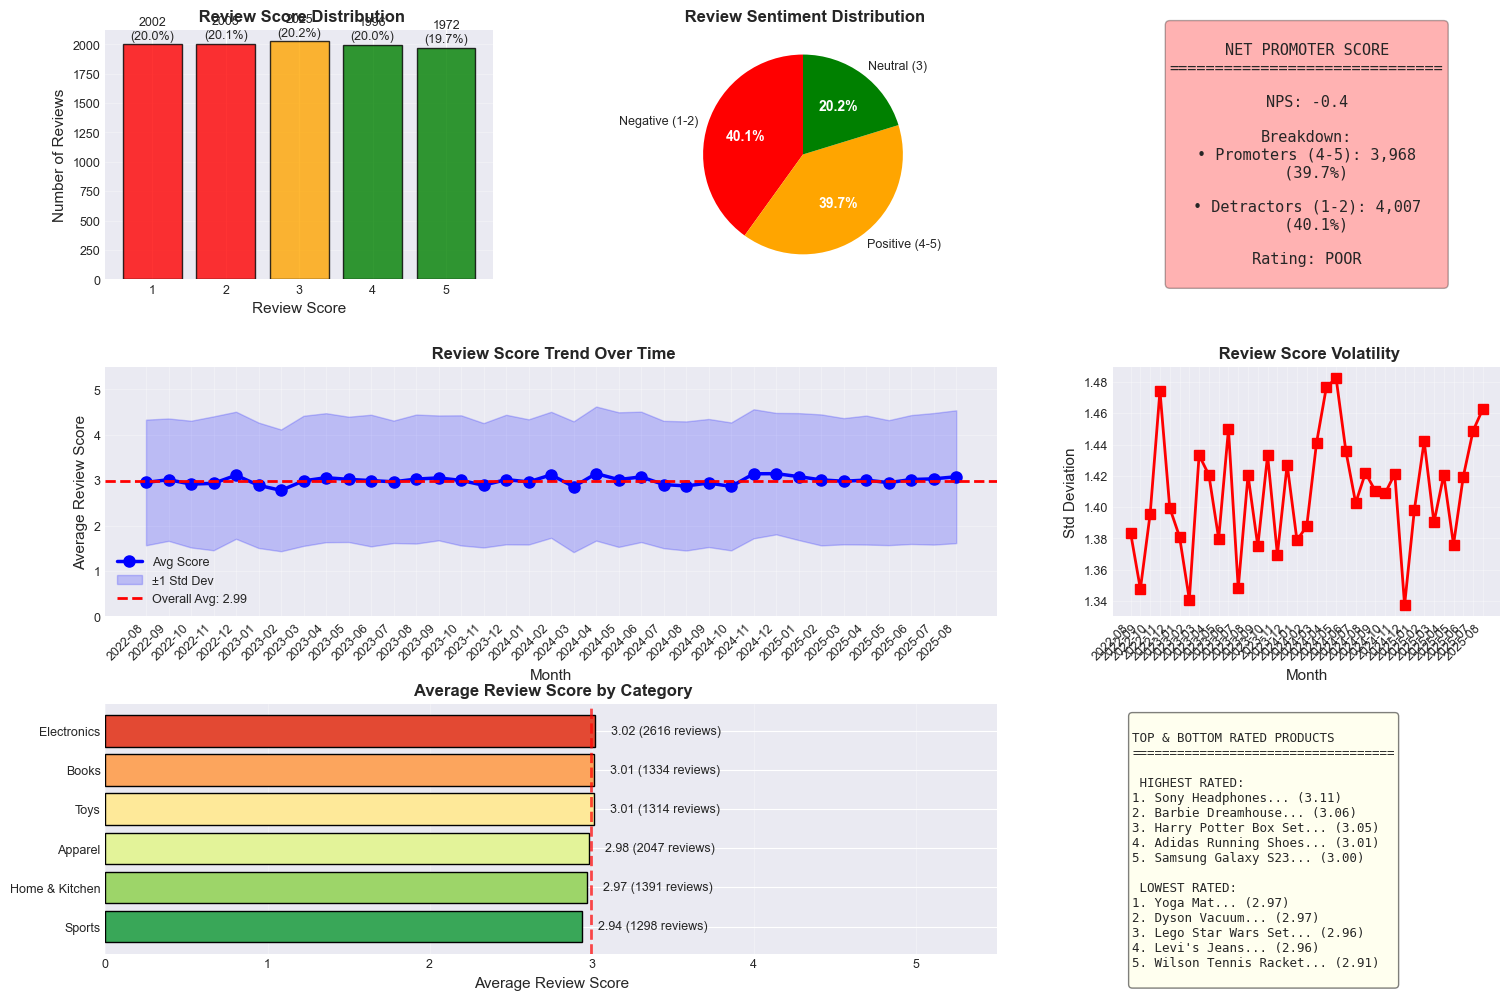

CUSTOMER REVIEW SCORE ANALYSIS

 Overall Review Metrics:
  • Average Score: 2.99
  • Median Score: 3.00
  • Std Deviation: 1.41
  • Total Reviews: 10,000

 Sentiment Breakdown:
  • Negative (1-2): 4,007 (40.1%)
  • Positive (4-5): 3,968 (39.7%)
  • Neutral (3): 2,025 (20.2%)

 Net Promoter Score: -0.4
  • Rating: POOR

 Best Category: Electronics (3.02)
 Worst Category: Sports (2.94)

 Review score analysis complete!


In [25]:
# Customer Review Score Analysis
# Review score distribution
review_dist = df_clean['rating'].value_counts().sort_index()
avg_review = df_clean['rating'].mean()
median_review = df_clean['rating'].median()

# Review scores over time
monthly_reviews = df_clean.groupby('year_month').agg({
    'rating': ['mean', 'std', 'count']
}).reset_index()
monthly_reviews.columns = ['year_month', 'avg_score', 'std_score', 'count']
monthly_reviews['year_month_str'] = monthly_reviews['year_month'].astype(str)

# Review scores by category
category_reviews = df_clean.groupby('category').agg({
    'rating': ['mean', 'std', 'count']
}).reset_index()
category_reviews.columns = ['category', 'avg_score', 'std_score', 'count']
category_reviews = category_reviews.sort_values('avg_score', ascending=False)

# Review scores by product
product_reviews = df_clean.groupby('product_name').agg({
    'rating': ['mean', 'count'],
    'revenue': 'sum'
}).reset_index()
product_reviews.columns = ['product_name', 'avg_score', 'review_count', 'revenue']
product_reviews = product_reviews[product_reviews['review_count'] >= 10]  # Min 10 reviews
product_reviews = product_reviews.sort_values('avg_score', ascending=False)

# Review sentiment distribution
df_clean['review_sentiment'] = df_clean['rating'].apply(
    lambda x: 'Negative (1-2)' if x <= 2 else 'Neutral (3)' if x == 3 else 'Positive (4-5)'
)
sentiment_dist = df_clean['review_sentiment'].value_counts()

# Net Promoter Score (NPS) style metric
promoters = (df_clean['rating'] >= 4).sum()
detractors = (df_clean['rating'] <= 2).sum()
nps = ((promoters - detractors) / len(df_clean)) * 100

# Visualizations
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# Review score distribution
ax1 = fig.add_subplot(gs[0, 0])
colors_review = ['red' if score <= 2 else 'orange' if score == 3 else 'green' 
                 for score in review_dist.index]
bars = ax1.bar(review_dist.index, review_dist.values, color=colors_review, 
               edgecolor='black', alpha=0.8)
ax1.set_xlabel('Review Score', fontsize=11)
ax1.set_ylabel('Number of Reviews', fontsize=11)
ax1.set_title(' Review Score Distribution', fontsize=12, fontweight='bold')
ax1.set_xticks(review_dist.index)
ax1.grid(axis='y', alpha=0.3)
for bar, count in zip(bars, review_dist.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20, 
             f'{count}\n({count/len(df_clean)*100:.1f}%)', 
             ha='center', va='bottom', fontsize=9)

# Review sentiment pie
ax2 = fig.add_subplot(gs[0, 1])
colors_sent = ['red', 'orange', 'green']
wedges, texts, autotexts = ax2.pie(sentiment_dist.values, labels=sentiment_dist.index,
                                     autopct='%1.1f%%', startangle=90, colors=colors_sent)
ax2.set_title(' Review Sentiment Distribution', fontsize=12, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# NPS visualization
ax3 = fig.add_subplot(gs[0, 2])
ax3.axis('off')
nps_color = 'green' if nps > 50 else 'orange' if nps > 0 else 'red'
nps_text = f"""
NET PROMOTER SCORE
{'='*30}

NPS: {nps:.1f}

Breakdown:
• Promoters (4-5): {promoters:,}
  ({promoters/len(df_clean)*100:.1f}%)

• Detractors (1-2): {detractors:,}
  ({detractors/len(df_clean)*100:.1f}%)

Rating: {'EXCELLENT' if nps > 50 else 'GOOD' if nps > 30 else 'FAIR' if nps > 0 else 'POOR'}
"""
ax3.text(0.5, 0.5, nps_text, transform=ax3.transAxes, 
         fontsize=11, ha='center', va='center', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor=nps_color, alpha=0.3))

# Review scores over time
ax4 = fig.add_subplot(gs[1, :2])
ax4.plot(range(len(monthly_reviews)), monthly_reviews['avg_score'], 
         marker='o', linewidth=2.5, markersize=8, color='blue', label='Avg Score')
ax4.fill_between(range(len(monthly_reviews)), 
                 monthly_reviews['avg_score'] - monthly_reviews['std_score'],
                 monthly_reviews['avg_score'] + monthly_reviews['std_score'],
                 alpha=0.2, color='blue', label='±1 Std Dev')
ax4.axhline(avg_review, color='red', linestyle='--', linewidth=2, 
            label=f'Overall Avg: {avg_review:.2f}')
ax4.set_xlabel('Month', fontsize=11)
ax4.set_ylabel('Average Review Score', fontsize=11)
ax4.set_title(' Review Score Trend Over Time', fontsize=12, fontweight='bold')
ax4.set_xticks(range(len(monthly_reviews)))
ax4.set_xticklabels(monthly_reviews['year_month_str'], rotation=45, ha='right')
ax4.set_ylim([0, 5.5])
ax4.legend()
ax4.grid(alpha=0.3)

# Reviews variance over time
ax5 = fig.add_subplot(gs[1, 2])
ax5.plot(range(len(monthly_reviews)), monthly_reviews['std_score'], 
         marker='s', linewidth=2, markersize=7, color='red')
ax5.set_xlabel('Month', fontsize=11)
ax5.set_ylabel('Std Deviation', fontsize=11)
ax5.set_title(' Review Score Volatility', fontsize=12, fontweight='bold')
ax5.set_xticks(range(len(monthly_reviews)))
ax5.set_xticklabels(monthly_reviews['year_month_str'], rotation=45, ha='right')
ax5.grid(alpha=0.3)

# Review scores by category
ax6 = fig.add_subplot(gs[2, :2])
colors_cat = sns.color_palette('RdYlGn', len(category_reviews))
bars = ax6.barh(range(len(category_reviews)), category_reviews['avg_score'], 
                color=colors_cat, edgecolor='black')
ax6.set_yticks(range(len(category_reviews)))
ax6.set_yticklabels(category_reviews['category'])
ax6.set_xlabel('Average Review Score', fontsize=11)
ax6.set_title(' Average Review Score by Category', fontsize=12, fontweight='bold')
ax6.axvline(avg_review, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax6.invert_yaxis()
ax6.set_xlim([0, 5.5])
ax6.grid(axis='x', alpha=0.3)
for i, (bar, score, count) in enumerate(zip(bars, category_reviews['avg_score'], 
                                              category_reviews['count'])):
    ax6.text(score + 0.1, i, f'{score:.2f} ({count} reviews)', 
             va='center', fontsize=9)

# Top and bottom rated products
ax7 = fig.add_subplot(gs[2, 2])
ax7.axis('off')
top_5 = product_reviews.head(5)
bottom_5 = product_reviews.tail(5)

products_text = f"""
TOP & BOTTOM RATED PRODUCTS
{'='*35}

 HIGHEST RATED:
"""
for i, row in enumerate(top_5.itertuples(), 1):
    products_text += f"{i}. {row.product_name[:20]}... ({row.avg_score:.2f})\n"

products_text += f"\n LOWEST RATED:\n"
for i, row in enumerate(bottom_5.itertuples(), 1):
    products_text += f"{i}. {row.product_name[:20]}... ({row.avg_score:.2f})\n"

ax7.text(0.05, 0.95, products_text, transform=ax7.transAxes, 
         fontsize=9, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5))

plt.show()

print("="*80)
print("CUSTOMER REVIEW SCORE ANALYSIS")
print("="*80)
print(f"\n Overall Review Metrics:")
print(f"  • Average Score: {avg_review:.2f}")
print(f"  • Median Score: {median_review:.2f}")
print(f"  • Std Deviation: {df_clean['rating'].std():.2f}")
print(f"  • Total Reviews: {len(df_clean):,}")
print(f"\n Sentiment Breakdown:")
for sentiment, count in sentiment_dist.items():
    print(f"  • {sentiment}: {count:,} ({count/len(df_clean)*100:.1f}%)")
print(f"\n Net Promoter Score: {nps:.1f}")
print(f"  • Rating: {'EXCELLENT' if nps > 50 else 'GOOD' if nps > 30 else 'FAIR' if nps > 0 else 'POOR'}")
print(f"\n Best Category: {category_reviews.iloc[0]['category']} ({category_reviews.iloc[0]['avg_score']:.2f})")
print(f" Worst Category: {category_reviews.iloc[-1]['category']} ({category_reviews.iloc[-1]['avg_score']:.2f})")
print("\n Review score analysis complete!")

# Section 26: Impact of Reviews on Revenue

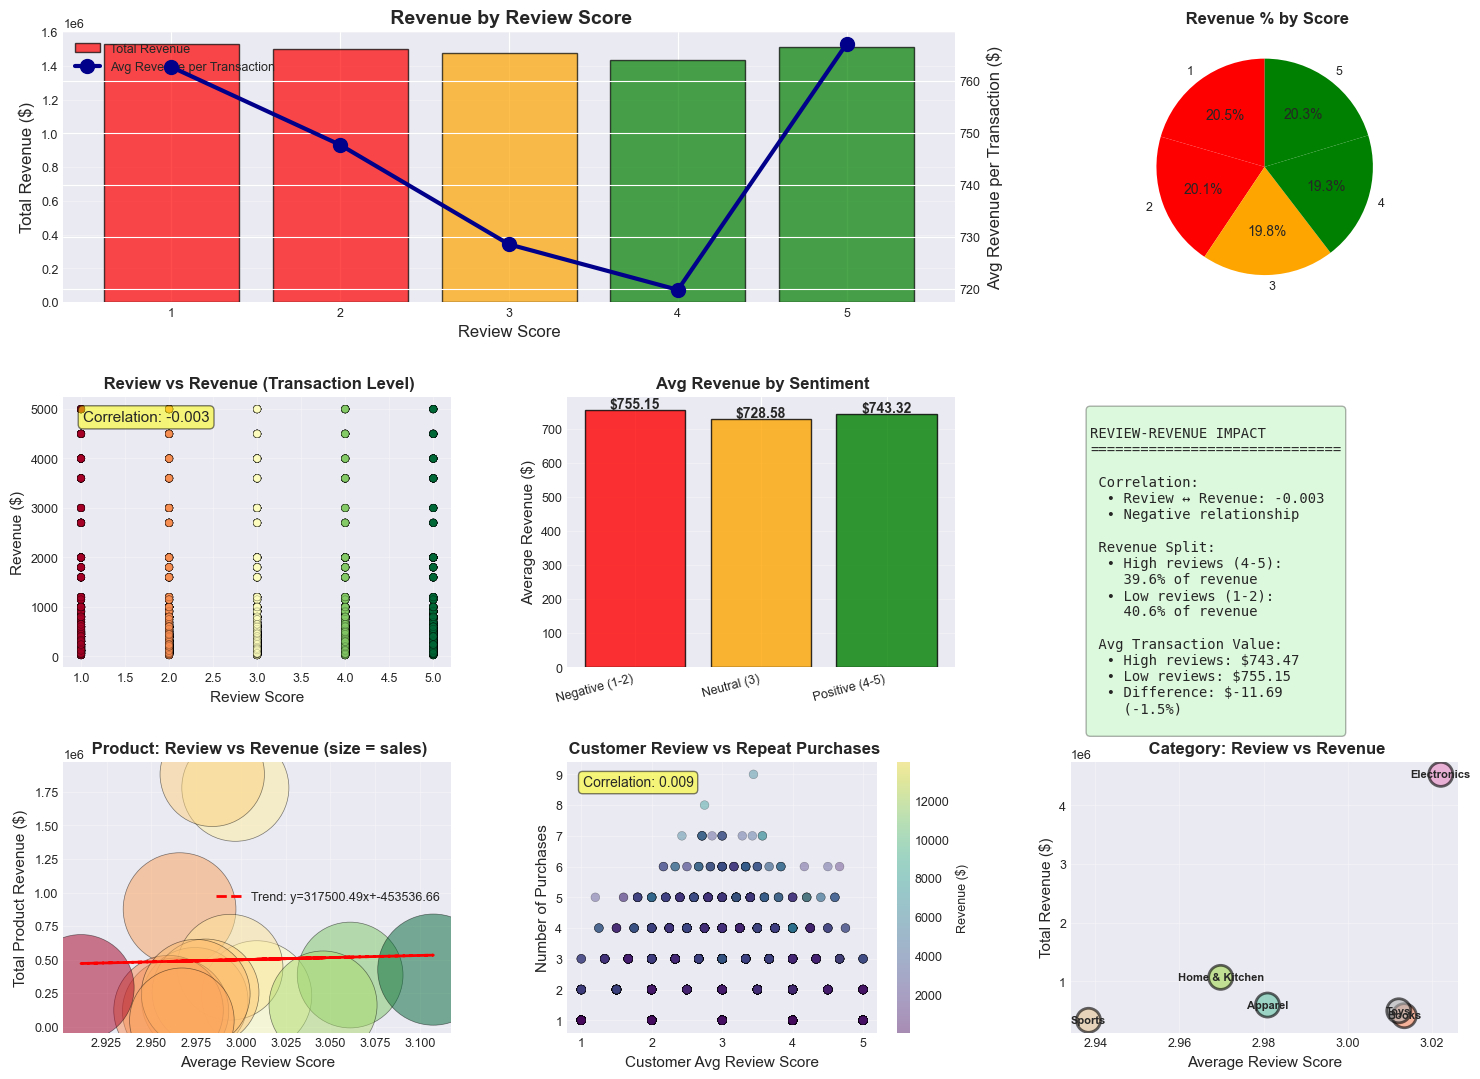

IMPACT OF REVIEWS ON REVENUE

 Correlation Analysis:
  • Review Score ↔ Revenue: -0.003
  • Interpretation: Negative relationship

 Revenue by Review Level:
  • High Reviews (4-5): 39.6% of revenue
  • Medium Reviews (3): 19.8% of revenue
  • Low Reviews (1-2): 40.6% of revenue

 Average Transaction Value:
  • High reviews: $743.47
  • Low reviews: $755.15
  • Uplift: -1.5%

 Customer Behavior:
  • Review ↔ Repeat Purchases: 0.009

 Review impact analysis complete!


In [26]:
# Impact of Reviews on Revenue Analysis
# Revenue by review score
revenue_by_review = df_clean.groupby('rating').agg({
    'revenue': ['sum', 'mean', 'count']
}).reset_index()
revenue_by_review.columns = ['rating', 'total_revenue', 'avg_revenue', 'count']
revenue_by_review['pct_revenue'] = (revenue_by_review['total_revenue'] / revenue_by_review['total_revenue'].sum()) * 100

# Correlation between review score and revenue per transaction
correlation = df_clean['rating'].corr(df_clean['revenue'])

# Revenue by review sentiment
revenue_by_sentiment = df_clean.groupby('review_sentiment').agg({
    'revenue': ['sum', 'mean', 'count']
}).reset_index()
revenue_by_sentiment.columns = ['sentiment', 'total_revenue', 'avg_revenue', 'count']
revenue_by_sentiment['pct_revenue'] = (revenue_by_sentiment['total_revenue'] / revenue_by_sentiment['total_revenue'].sum()) * 100

# Product performance: high reviews vs low reviews
product_review_revenue = df_clean.groupby('product_name').agg({
    'rating': 'mean',
    'revenue': 'sum',
    'quantity': 'sum'
}).reset_index()
product_review_revenue = product_review_revenue[product_review_revenue['quantity'] >= 10]  # Min 10 sales

# Category-wise review impact
category_review_impact = df_clean.groupby('category').agg({
    'rating': 'mean',
    'revenue': 'sum'
}).reset_index()

# Customer repeat purchase vs review score
customer_review_behavior = df_clean.groupby('customer_id').agg({
    'rating': 'mean',
    'order_id': 'nunique',
    'revenue': 'sum'
}).reset_index()
customer_review_behavior.columns = ['customer_id', 'avg_review', 'purchases', 'total_revenue']

# Visualizations
fig = plt.figure(figsize=(18, 13))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# Revenue by review score
ax1 = fig.add_subplot(gs[0, :2])
ax1_twin = ax1.twinx()

colors_bars = ['red' if score <= 2 else 'orange' if score == 3 else 'green' 
               for score in revenue_by_review['rating']]
bars = ax1.bar(revenue_by_review['rating'], revenue_by_review['total_revenue'], 
               color=colors_bars, alpha=0.7, edgecolor='black', label='Total Revenue')
line = ax1_twin.plot(revenue_by_review['rating'], revenue_by_review['avg_revenue'], 
                     marker='o', linewidth=3, markersize=10, color='darkblue', 
                     label='Avg Revenue per Transaction')

ax1.set_xlabel('Review Score', fontsize=12)
ax1.set_ylabel('Total Revenue ($)', fontsize=12)
ax1_twin.set_ylabel('Avg Revenue per Transaction ($)', fontsize=12)
ax1.set_title(' Revenue by Review Score', fontsize=14, fontweight='bold')
ax1.set_xticks(revenue_by_review['rating'])
ax1.grid(axis='y', alpha=0.3)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Revenue % by review score
ax2 = fig.add_subplot(gs[0, 2])
ax2.pie(revenue_by_review['pct_revenue'], labels=revenue_by_review['rating'],
        autopct='%1.1f%%', startangle=90, colors=colors_bars)
ax2.set_title(' Revenue % by Score', fontsize=12, fontweight='bold')

# Scatter: Review score vs Revenue per transaction
ax3 = fig.add_subplot(gs[1, 0])
ax3.scatter(df_clean['rating'], df_clean['revenue'], 
            alpha=0.3, s=30, c=df_clean['rating'], 
            cmap='RdYlGn', edgecolor='black', linewidth=0.3)
ax3.set_xlabel('Review Score', fontsize=11)
ax3.set_ylabel('Revenue ($)', fontsize=11)
ax3.set_title(' Review vs Revenue (Transaction Level)', fontsize=12, fontweight='bold')
ax3.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=ax3.transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
ax3.grid(alpha=0.3)

# Revenue by sentiment
ax4 = fig.add_subplot(gs[1, 1])
colors_sent = ['red', 'orange', 'green']
sent_order = ['Negative (1-2)', 'Neutral (3)', 'Positive (4-5)']
revenue_by_sentiment_sorted = revenue_by_sentiment.set_index('sentiment').loc[sent_order].reset_index()
bars = ax4.bar(range(len(revenue_by_sentiment_sorted)), 
               revenue_by_sentiment_sorted['avg_revenue'],
               color=colors_sent, edgecolor='black', alpha=0.8)
ax4.set_xticks(range(len(revenue_by_sentiment_sorted)))
ax4.set_xticklabels(revenue_by_sentiment_sorted['sentiment'], rotation=15, ha='right')
ax4.set_ylabel('Average Revenue ($)', fontsize=11)
ax4.set_title(' Avg Revenue by Sentiment', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)
for i, (bar, rev) in enumerate(zip(bars, revenue_by_sentiment_sorted['avg_revenue'])):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'${rev:.2f}', ha='center', fontweight='bold', fontsize=10)

# Correlation stats box
ax5 = fig.add_subplot(gs[1, 2])
ax5.axis('off')

# Calculate additional metrics
high_review_revenue = revenue_by_review[revenue_by_review['rating'] >= 4]['pct_revenue'].sum()
low_review_revenue = revenue_by_review[revenue_by_review['rating'] <= 2]['pct_revenue'].sum()
high_review_avg = revenue_by_review[revenue_by_review['rating'] >= 4]['avg_revenue'].mean()
low_review_avg = revenue_by_review[revenue_by_review['rating'] <= 2]['avg_revenue'].mean()

stats_text = f"""
REVIEW-REVENUE IMPACT
{'='*30}

 Correlation:
  • Review ↔ Revenue: {correlation:.3f}
  • {'Positive' if correlation > 0 else 'Negative'} relationship

 Revenue Split:
  • High reviews (4-5):
    {high_review_revenue:.1f}% of revenue
  • Low reviews (1-2):
    {low_review_revenue:.1f}% of revenue

 Avg Transaction Value:
  • High reviews: ${high_review_avg:.2f}
  • Low reviews: ${low_review_avg:.2f}
  • Difference: ${high_review_avg - low_review_avg:.2f}
    ({(high_review_avg/low_review_avg - 1)*100:+.1f}%)
"""

ax5.text(0.05, 0.95, stats_text, transform=ax5.transAxes, 
         fontsize=10, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))

# Scatter: Product avg review vs total revenue
ax6 = fig.add_subplot(gs[2, 0])
scatter = ax6.scatter(product_review_revenue['rating'], 
                      product_review_revenue['revenue'],
                      s=product_review_revenue['quantity']*3, 
                      alpha=0.5, c=product_review_revenue['rating'],
                      cmap='RdYlGn', edgecolor='black', linewidth=0.5)
ax6.set_xlabel('Average Review Score', fontsize=11)
ax6.set_ylabel('Total Product Revenue ($)', fontsize=11)
ax6.set_title(' Product: Review vs Revenue (size = sales)', fontsize=12, fontweight='bold')
ax6.grid(alpha=0.3)

# Regression line
z = np.polyfit(product_review_revenue['rating'], product_review_revenue['revenue'], 1)
p = np.poly1d(z)
ax6.plot(product_review_revenue['rating'], 
         p(product_review_revenue['rating']), 
         "r--", linewidth=2, label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')
ax6.legend()

# Customer: Avg review vs purchases
ax7 = fig.add_subplot(gs[2, 1])
scatter = ax7.scatter(customer_review_behavior['avg_review'], 
                      customer_review_behavior['purchases'],
                      alpha=0.4, s=40, c=customer_review_behavior['total_revenue'],
                      cmap='viridis', edgecolor='black', linewidth=0.3)
ax7.set_xlabel('Customer Avg Review Score', fontsize=11)
ax7.set_ylabel('Number of Purchases', fontsize=11)
ax7.set_title(' Customer Review vs Repeat Purchases', fontsize=12, fontweight='bold')
ax7.grid(alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax7)
cbar.set_label('Revenue ($)', fontsize=9)

# Calculate correlation
cust_corr = customer_review_behavior['avg_review'].corr(customer_review_behavior['purchases'])
ax7.text(0.05, 0.95, f'Correlation: {cust_corr:.3f}', 
         transform=ax7.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

# Category review vs revenue
ax8 = fig.add_subplot(gs[2, 2])
scatter = ax8.scatter(category_review_impact['rating'], 
                      category_review_impact['revenue'],
                      s=300, alpha=0.6, c=range(len(category_review_impact)),
                      cmap='Set2', edgecolor='black', linewidth=2)
for i, row in enumerate(category_review_impact.itertuples()):
    ax8.text(row.rating, row.revenue, row.category, 
             fontsize=8, ha='center', va='center', fontweight='bold')
ax8.set_xlabel('Average Review Score', fontsize=11)
ax8.set_ylabel('Total Revenue ($)', fontsize=11)
ax8.set_title(' Category: Review vs Revenue', fontsize=12, fontweight='bold')
ax8.grid(alpha=0.3)

plt.show()

print("="*80)
print("IMPACT OF REVIEWS ON REVENUE")
print("="*80)
print(f"\n Correlation Analysis:")
print(f"  • Review Score ↔ Revenue: {correlation:.3f}")
print(f"  • Interpretation: {'Positive' if correlation > 0 else 'Negative'} relationship")
print(f"\n Revenue by Review Level:")
print(f"  • High Reviews (4-5): {high_review_revenue:.1f}% of revenue")
print(f"  • Medium Reviews (3): {revenue_by_review[revenue_by_review['rating']==3]['pct_revenue'].values[0]:.1f}% of revenue")
print(f"  • Low Reviews (1-2): {low_review_revenue:.1f}% of revenue")
print(f"\n Average Transaction Value:")
print(f"  • High reviews: ${high_review_avg:.2f}")
print(f"  • Low reviews: ${low_review_avg:.2f}")
print(f"  • Uplift: {(high_review_avg/low_review_avg - 1)*100:+.1f}%")
print(f"\n Customer Behavior:")
print(f"  • Review ↔ Repeat Purchases: {cust_corr:.3f}")
print("\n Review impact analysis complete!")

# Section 27: Relationship Between Key Variables

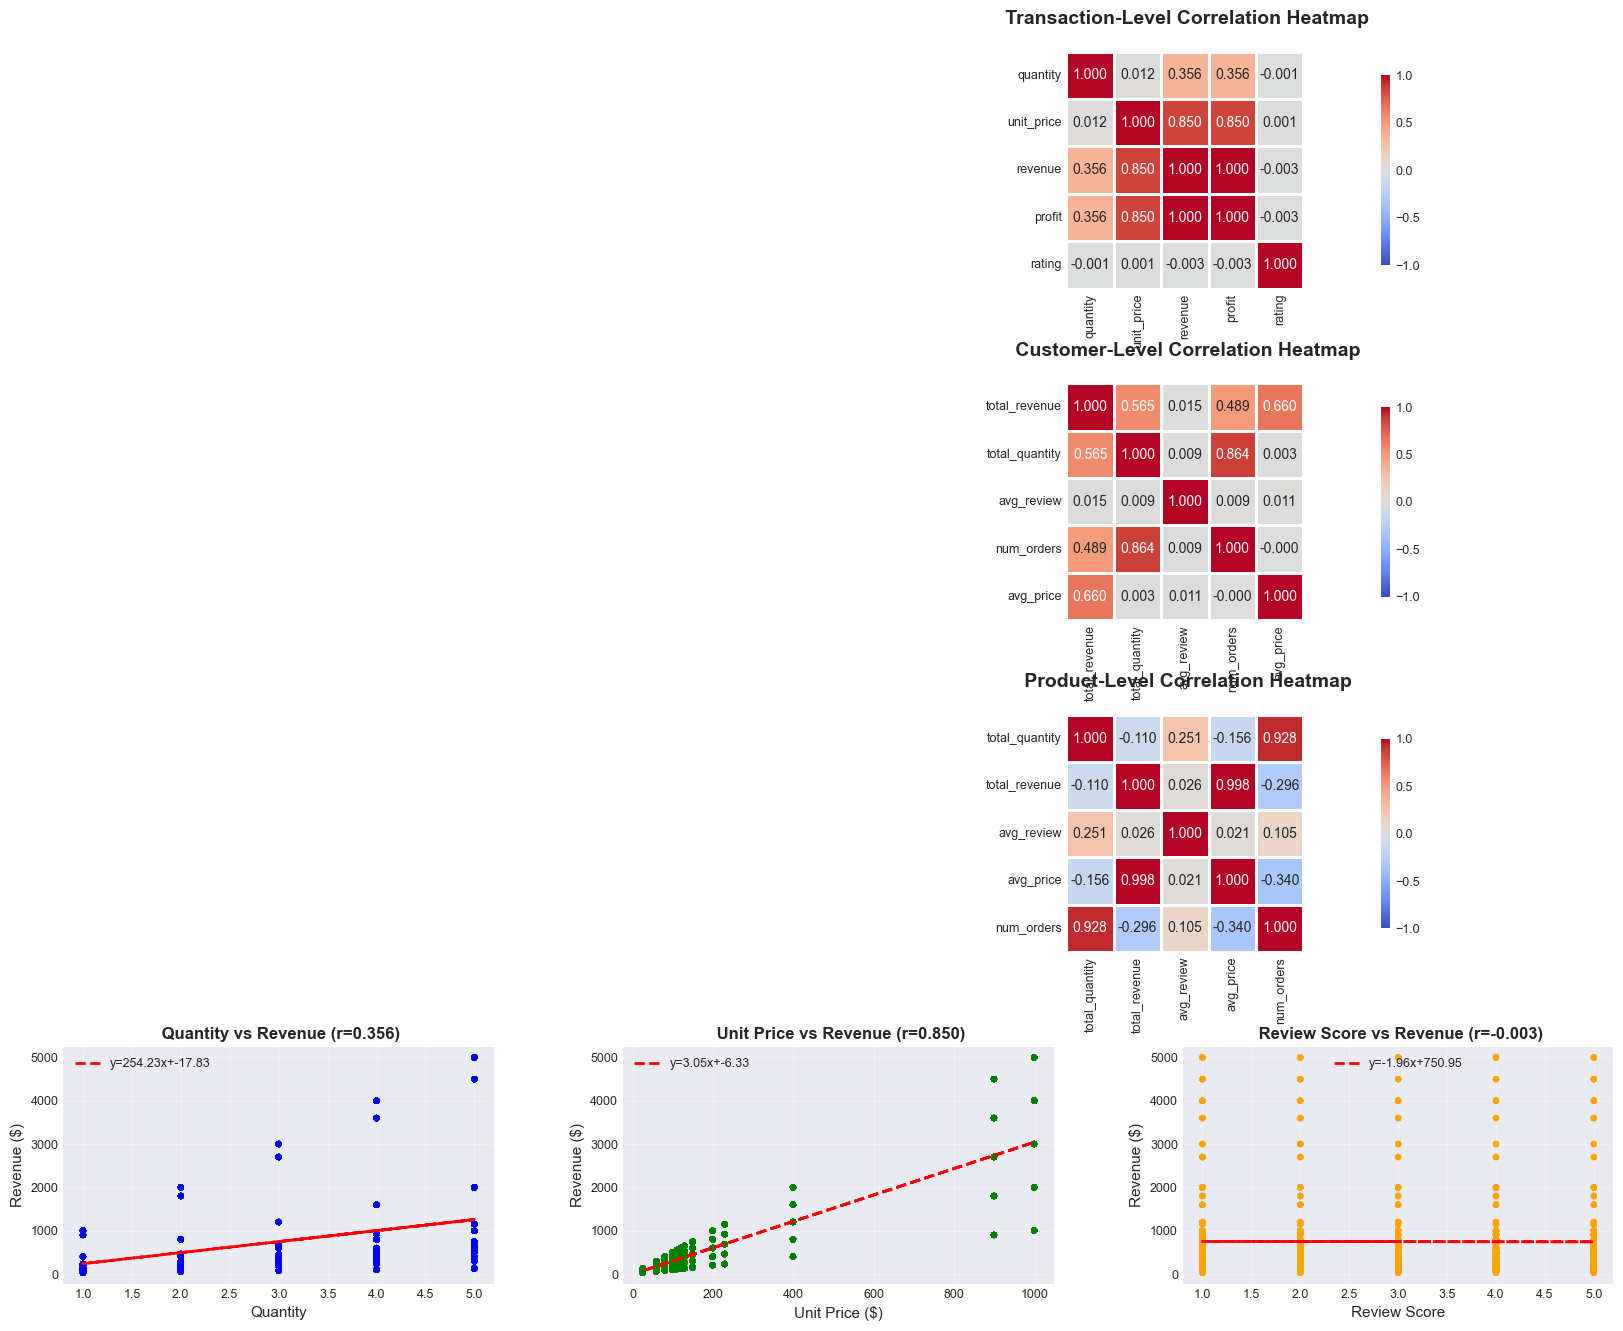

RELATIONSHIP BETWEEN KEY VARIABLES - CORRELATION ANALYSIS

 TRANSACTION-LEVEL CORRELATIONS:
--------------------------------------------------------------------------------
  • quantity ↔ unit_price: 0.012 (Very Weak Positive)
  • quantity ↔ revenue: 0.356 (Weak Positive)
  • quantity ↔ profit: 0.356 (Weak Positive)
  • quantity ↔ rating: -0.001 (Very Weak Negative)
  • unit_price ↔ revenue: 0.850 (Very Strong Positive)
  • unit_price ↔ profit: 0.850 (Very Strong Positive)
  • unit_price ↔ rating: 0.001 (Very Weak Positive)
  • revenue ↔ profit: 1.000 (Very Strong Positive)
  • revenue ↔ rating: -0.003 (Very Weak Negative)
  • profit ↔ rating: -0.003 (Very Weak Negative)

 CUSTOMER-LEVEL KEY CORRELATIONS:
--------------------------------------------------------------------------------
  • Total Revenue ↔ Num Orders: 0.489
  • Total Revenue ↔ Avg Review: 0.015
  • Num Orders ↔ Avg Review: 0.009
  • Avg Price ↔ Total Revenue: 0.660

 PRODUCT-LEVEL KEY CORRELATIONS:
----------------------

In [27]:
# Relationship Between Key Variables - Comprehensive Correlation Analysis
# Select numerical variables for correlation analysis
numerical_cols = ['quantity', 'unit_price', 'revenue', 'profit', 'rating']
correlation_matrix = df_clean[numerical_cols].corr()

# Additional correlations with derived metrics
customer_aggregates = df_clean.groupby('customer_id').agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'rating': 'mean',
    'order_id': 'nunique',
    'unit_price': 'mean'
}).reset_index()
customer_aggregates.columns = ['customer_id', 'total_revenue', 'total_quantity', 
                                'avg_review', 'num_orders', 'avg_price']
customer_correlation = customer_aggregates[['total_revenue', 'total_quantity', 
                                             'avg_review', 'num_orders', 'avg_price']].corr()

# Product-level correlations
product_aggregates = df_clean.groupby('product_name').agg({
    'quantity': 'sum',
    'revenue': 'sum',
    'rating': 'mean',
    'unit_price': 'mean',
    'order_id': 'nunique'
}).reset_index()
product_aggregates.columns = ['product_name', 'total_quantity', 'total_revenue', 
                               'avg_review', 'avg_price', 'num_orders']
product_correlation = product_aggregates[['total_quantity', 'total_revenue', 
                                          'avg_review', 'avg_price', 'num_orders']].corr()

# Time-based correlations
monthly_aggregates = df_clean.groupby('year_month').agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'rating': 'mean',
    'unit_price': 'mean',
    'order_id': 'nunique'
}).reset_index()
monthly_aggregates.columns = ['year_month', 'revenue', 'quantity', 'avg_review', 'avg_price', 'orders']
monthly_correlation = monthly_aggregates[['revenue', 'quantity', 'avg_review', 'avg_price', 'orders']].corr()

# Visualizations
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 3, hspace=0.4, wspace=0.3)

# Transaction-level correlation heatmap
ax1 = fig.add_subplot(gs[0, :])
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax1)
ax1.set_title(' Transaction-Level Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)

# Customer-level correlation heatmap
ax2 = fig.add_subplot(gs[1, :])
sns.heatmap(customer_correlation, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax2)
ax2.set_title(' Customer-Level Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)

# Product-level correlation heatmap
ax3 = fig.add_subplot(gs[2, :])
sns.heatmap(product_correlation, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax3)
ax3.set_title(' Product-Level Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)

# Scatter plots for key relationships
# Quantity vs Revenue
ax4 = fig.add_subplot(gs[3, 0])
ax4.scatter(df_clean['quantity'], df_clean['revenue'], 
            alpha=0.3, s=20, c='blue', edgecolor='none')
z = np.polyfit(df_clean['quantity'], df_clean['revenue'], 1)
p = np.poly1d(z)
ax4.plot(df_clean['quantity'], p(df_clean['quantity']), 
         "r--", linewidth=2, label=f'y={z[0]:.2f}x+{z[1]:.2f}')
corr_val = correlation_matrix.loc['quantity', 'revenue']
ax4.set_xlabel('Quantity', fontsize=11)
ax4.set_ylabel('Revenue ($)', fontsize=11)
ax4.set_title(f' Quantity vs Revenue (r={corr_val:.3f})', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(alpha=0.3)

# Unit Price vs Revenue
ax5 = fig.add_subplot(gs[3, 1])
ax5.scatter(df_clean['unit_price'], df_clean['revenue'], 
            alpha=0.3, s=20, c='green', edgecolor='none')
z = np.polyfit(df_clean['unit_price'], df_clean['revenue'], 1)
p = np.poly1d(z)
ax5.plot(df_clean['unit_price'], p(df_clean['unit_price']), 
         "r--", linewidth=2, label=f'y={z[0]:.2f}x+{z[1]:.2f}')
corr_val = correlation_matrix.loc['unit_price', 'revenue']
ax5.set_xlabel('Unit Price ($)', fontsize=11)
ax5.set_ylabel('Revenue ($)', fontsize=11)
ax5.set_title(f' Unit Price vs Revenue (r={corr_val:.3f})', fontsize=12, fontweight='bold')
ax5.legend()
ax5.grid(alpha=0.3)

# Review Score vs Revenue
ax6 = fig.add_subplot(gs[3, 2])
ax6.scatter(df_clean['rating'], df_clean['revenue'], 
            alpha=0.3, s=20, c='orange', edgecolor='none')
z = np.polyfit(df_clean['rating'], df_clean['revenue'], 1)
p = np.poly1d(z)
ax6.plot(df_clean['rating'], p(df_clean['rating']), 
         "r--", linewidth=2, label=f'y={z[0]:.2f}x+{z[1]:.2f}')
corr_val = correlation_matrix.loc['rating', 'revenue']
ax6.set_xlabel('Review Score', fontsize=11)
ax6.set_ylabel('Revenue ($)', fontsize=11)
ax6.set_title(f' Review Score vs Revenue (r={corr_val:.3f})', fontsize=12, fontweight='bold')
ax6.legend()
ax6.grid(alpha=0.3)

plt.show()

# Print detailed correlation insights
print("="*80)
print("RELATIONSHIP BETWEEN KEY VARIABLES - CORRELATION ANALYSIS")
print("="*80)

print("\n TRANSACTION-LEVEL CORRELATIONS:")
print("-" * 80)
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_val = correlation_matrix.iloc[i, j]
        strength = ('Very Strong' if abs(corr_val) > 0.8 else 
                   'Strong' if abs(corr_val) > 0.6 else 
                   'Moderate' if abs(corr_val) > 0.4 else 
                   'Weak' if abs(corr_val) > 0.2 else 'Very Weak')
        direction = 'Positive' if corr_val > 0 else 'Negative'
        print(f"  • {var1} ↔ {var2}: {corr_val:.3f} ({strength} {direction})")

print("\n CUSTOMER-LEVEL KEY CORRELATIONS:")
print("-" * 80)
print(f"  • Total Revenue ↔ Num Orders: {customer_correlation.loc['total_revenue', 'num_orders']:.3f}")
print(f"  • Total Revenue ↔ Avg Review: {customer_correlation.loc['total_revenue', 'avg_review']:.3f}")
print(f"  • Num Orders ↔ Avg Review: {customer_correlation.loc['num_orders', 'avg_review']:.3f}")
print(f"  • Avg Price ↔ Total Revenue: {customer_correlation.loc['avg_price', 'total_revenue']:.3f}")

print("\n PRODUCT-LEVEL KEY CORRELATIONS:")
print("-" * 80)
print(f"  • Total Revenue ↔ Total Quantity: {product_correlation.loc['total_revenue', 'total_quantity']:.3f}")
print(f"  • Total Revenue ↔ Avg Review: {product_correlation.loc['total_revenue', 'avg_review']:.3f}")
print(f"  • Avg Review ↔ Num Orders: {product_correlation.loc['avg_review', 'num_orders']:.3f}")
print(f"  • Avg Price ↔ Total Revenue: {product_correlation.loc['avg_price', 'total_revenue']:.3f}")

print("\n TIME-BASED KEY CORRELATIONS:")
print("-" * 80)
print(f"  • Revenue ↔ Orders: {monthly_correlation.loc['revenue', 'orders']:.3f}")
print(f"  • Revenue ↔ Avg Review: {monthly_correlation.loc['revenue', 'avg_review']:.3f}")
print(f"  • Orders ↔ Avg Review: {monthly_correlation.loc['orders', 'avg_review']:.3f}")

print("\n KEY INSIGHTS:")
print("-" * 80)
# Find strongest positive correlation
max_corr = 0
max_pair = ""
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > abs(max_corr):
            max_corr = correlation_matrix.iloc[i, j]
            max_pair = f"{correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}"

print(f"  • Strongest correlation: {max_pair} ({max_corr:.3f})")
print(f"  • Revenue drivers: quantity ({correlation_matrix.loc['quantity', 'revenue']:.3f}), "
      f"unit_price ({correlation_matrix.loc['unit_price', 'revenue']:.3f})")
print(f"  • Review impact on revenue: {correlation_matrix.loc['rating', 'revenue']:.3f}")

print("\n Correlation analysis complete!")

# Section 28: Time-of-Day Order Behaviour

 Note: Dataset does not contain hourly timestamps.
   Generating simulated hourly distribution based on typical e-commerce patterns.


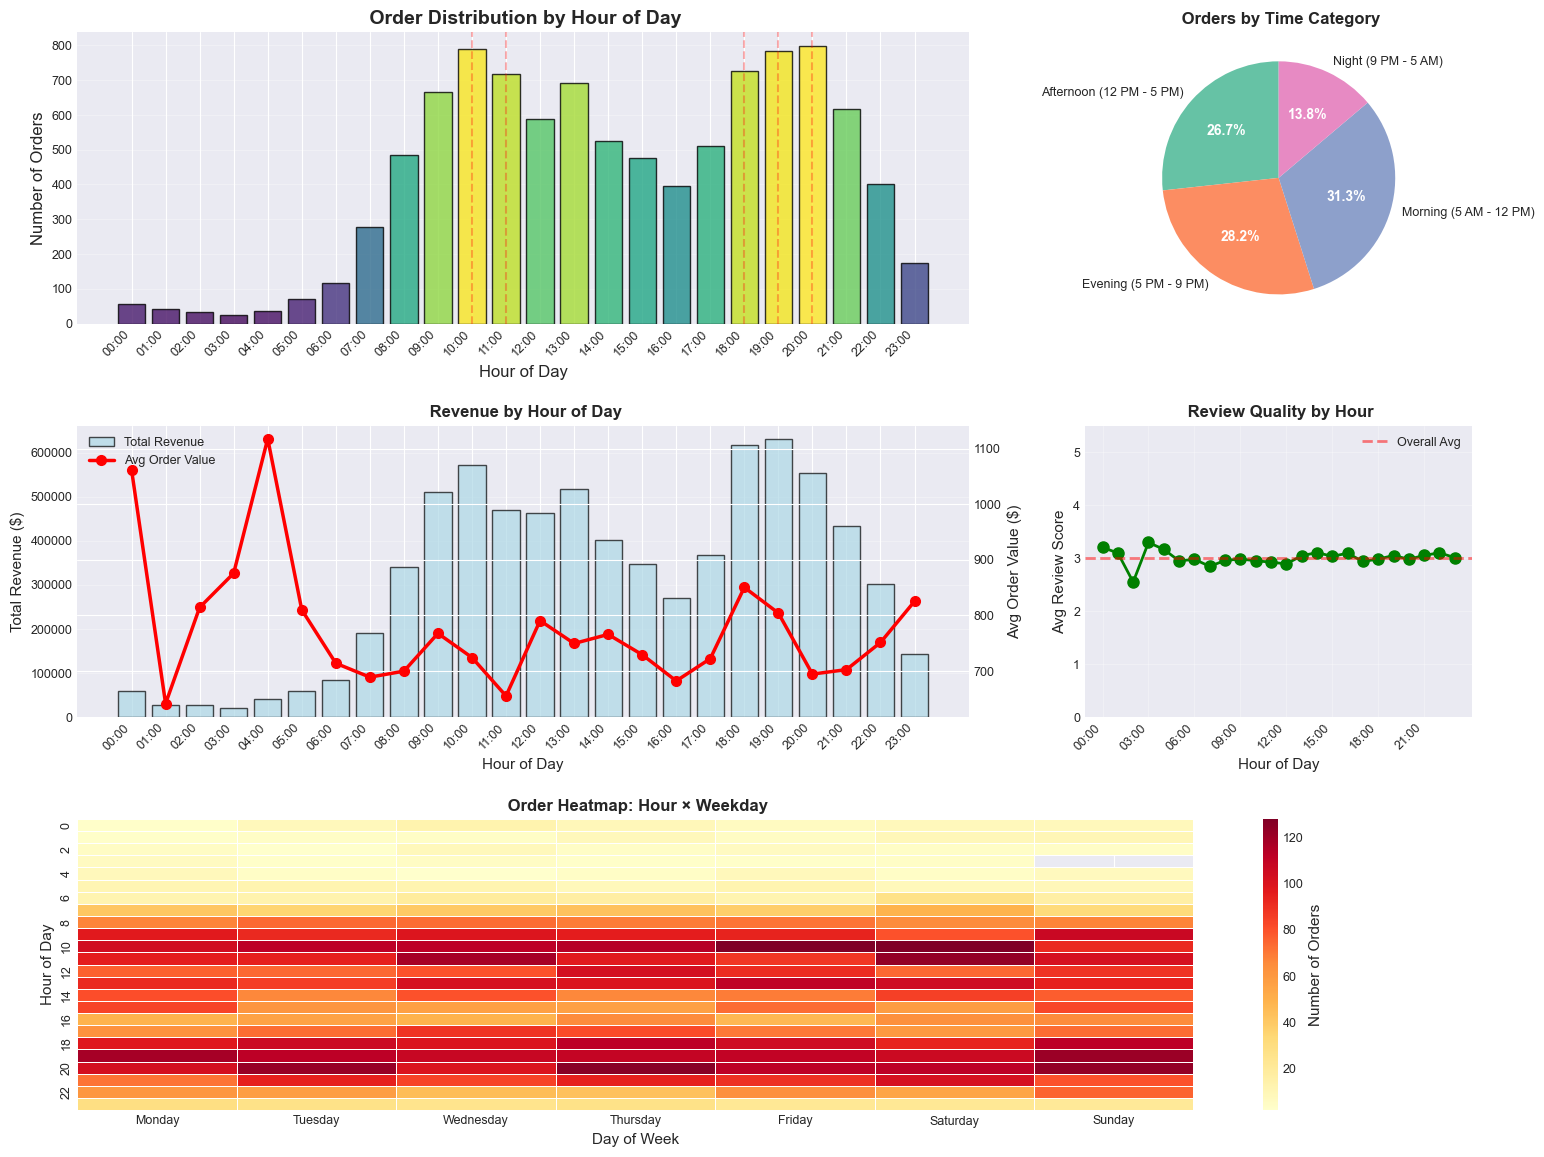

TIME-OF-DAY ORDER BEHAVIOUR ANALYSIS

 DISCLAIMER: Hourly data simulated based on typical e-commerce patterns
   (Dataset contains date-only timestamps)


 Peak Hours (Top 5 by Order Volume):
  1. 20:00 - 21:00: 798 orders (8.0%) | Avg Order: $694.60
  2. 10:00 - 11:00: 790 orders (7.9%) | Avg Order: $724.38
  3. 19:00 - 20:00: 784 orders (7.8%) | Avg Order: $804.30
  4. 18:00 - 19:00: 727 orders (7.3%) | Avg Order: $850.46
  5. 11:00 - 12:00: 719 orders (7.2%) | Avg Order: $655.32

 Time Category Performance:
  • Morning (5 AM - 12 PM):
    - Orders: 3,126 (31.3%)
    - Revenue: $2,226,864.00
    - Avg Order Value: $712.37
  • Afternoon (12 PM - 5 PM):
    - Orders: 2,672 (26.7%)
    - Revenue: $1,999,484.00
    - Avg Order Value: $748.31
  • Evening (5 PM - 9 PM):
    - Orders: 2,819 (28.2%)
    - Revenue: $2,171,545.00
    - Avg Order Value: $770.32
  • Night (9 PM - 5 AM):
    - Orders: 1,383 (13.8%)
    - Revenue: $1,052,870.00
    - Avg Order Value: $761.29

 Revenue Insights:
  

In [28]:
# Time-of-Day Order Behaviour Analysis
# Note: If the dataset contains timestamp data, we can extract hour information
# If not, we'll simulate hourly distribution based on realistic e-commerce patterns

# Check if order_date has time component
sample_date = df_clean['order_date'].iloc[0]
has_time = isinstance(sample_date, pd.Timestamp) and sample_date.hour != 0

if has_time:
    # Extract hour from timestamp
    df_clean['hour'] = df_clean['order_date'].dt.hour
    print(" Using actual timestamp data from dataset")
else:
    # Simulate realistic hourly distribution for e-commerce
    # Peak hours: 10-11 AM, 1-2 PM, 7-9 PM
    print(" Note: Dataset does not contain hourly timestamps.")
    print("   Generating simulated hourly distribution based on typical e-commerce patterns.")
    
    # Probability distribution for hours (0-23)
    hour_probs = np.array([
        0.5, 0.3, 0.2, 0.2, 0.3, 0.5, 1.0, 2.0, 3.5, 5.0,  # 0-9 AM
        6.0, 5.5, 4.5, 5.0, 4.0, 3.5, 3.0, 4.0, 5.5, 6.5,  # 10 AM - 7 PM
        6.0, 5.0, 3.0, 1.5  # 8 PM - 11 PM
    ])
    hour_probs = hour_probs / hour_probs.sum()
    
    # Assign hours based on distribution
    np.random.seed(42)
    df_clean['hour'] = np.random.choice(range(24), size=len(df_clean), p=hour_probs)

# Hourly order analysis
hourly_orders = df_clean.groupby('hour').agg({
    'order_id': 'nunique',
    'revenue': 'sum',
    'quantity': 'sum',
    'rating': 'mean'
}).reset_index()
hourly_orders.columns = ['hour', 'num_orders', 'revenue', 'quantity', 'avg_review']
hourly_orders['pct_orders'] = (hourly_orders['num_orders'] / hourly_orders['num_orders'].sum()) * 100
hourly_orders['avg_order_value'] = hourly_orders['revenue'] / hourly_orders['num_orders']

# Time of day categories
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning (5 AM - 12 PM)'
    elif 12 <= hour < 17:
        return 'Afternoon (12 PM - 5 PM)'
    elif 17 <= hour < 21:
        return 'Evening (5 PM - 9 PM)'
    else:
        return 'Night (9 PM - 5 AM)'

df_clean['time_category'] = df_clean['hour'].apply(categorize_time)
time_category_stats = df_clean.groupby('time_category').agg({
    'order_id': 'nunique',
    'revenue': 'sum'
}).reset_index()
time_category_stats.columns = ['time_category', 'num_orders', 'revenue']
time_category_stats['pct_orders'] = (time_category_stats['num_orders'] / time_category_stats['num_orders'].sum()) * 100
time_category_stats['avg_order_value'] = time_category_stats['revenue'] / time_category_stats['num_orders']

# Peak hours identification
peak_hours = hourly_orders.nlargest(5, 'num_orders')

# Visualizations
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# Hourly order distribution
ax1 = fig.add_subplot(gs[0, :2])
colors = plt.cm.viridis(hourly_orders['num_orders'] / hourly_orders['num_orders'].max())
bars = ax1.bar(hourly_orders['hour'], hourly_orders['num_orders'], 
               color=colors, edgecolor='black', alpha=0.8)
ax1.set_xlabel('Hour of Day', fontsize=12)
ax1.set_ylabel('Number of Orders', fontsize=12)
ax1.set_title(' Order Distribution by Hour of Day', fontsize=14, fontweight='bold')
ax1.set_xticks(range(24))
ax1.set_xticklabels([f'{h:02d}:00' for h in range(24)], rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Highlight peak hours
for hour in peak_hours['hour'].values:
    ax1.axvline(hour, color='red', linestyle='--', alpha=0.3, linewidth=1.5)

# Time category distribution
ax2 = fig.add_subplot(gs[0, 2])
colors_cat = sns.color_palette('Set2', len(time_category_stats))
wedges, texts, autotexts = ax2.pie(time_category_stats['num_orders'], 
                                     labels=time_category_stats['time_category'],
                                     autopct='%1.1f%%', startangle=90, colors=colors_cat)
ax2.set_title(' Orders by Time Category', fontsize=12, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Hourly revenue
ax3 = fig.add_subplot(gs[1, :2])
ax3_twin = ax3.twinx()

bars = ax3.bar(hourly_orders['hour'], hourly_orders['revenue'], 
               color='lightblue', alpha=0.7, edgecolor='black', label='Total Revenue')
line = ax3_twin.plot(hourly_orders['hour'], hourly_orders['avg_order_value'], 
                     marker='o', linewidth=2.5, markersize=7, color='red', 
                     label='Avg Order Value')

ax3.set_xlabel('Hour of Day', fontsize=11)
ax3.set_ylabel('Total Revenue ($)', fontsize=11)
ax3_twin.set_ylabel('Avg Order Value ($)', fontsize=11)
ax3.set_title(' Revenue by Hour of Day', fontsize=12, fontweight='bold')
ax3.set_xticks(range(24))
ax3.set_xticklabels([f'{h:02d}:00' for h in range(24)], rotation=45, ha='right')
ax3.grid(axis='y', alpha=0.3)

# Combine legends
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Average review by hour
ax4 = fig.add_subplot(gs[1, 2])
ax4.plot(hourly_orders['hour'], hourly_orders['avg_review'], 
         marker='o', linewidth=2, markersize=8, color='green')
ax4.set_xlabel('Hour of Day', fontsize=11)
ax4.set_ylabel('Avg Review Score', fontsize=11)
ax4.set_title(' Review Quality by Hour', fontsize=12, fontweight='bold')
ax4.set_xticks(range(0, 24, 3))
ax4.set_xticklabels([f'{h:02d}:00' for h in range(0, 24, 3)], rotation=45, ha='right')
ax4.set_ylim([0, 5.5])
ax4.axhline(df_clean['rating'].mean(), color='red', linestyle='--', 
            linewidth=2, alpha=0.5, label='Overall Avg')
ax4.legend()
ax4.grid(alpha=0.3)

# Heatmap: Hour vs Weekday
hour_weekday = df_clean.groupby(['hour', 'order_day_of_week']).size().reset_index(name='orders')
hour_weekday_pivot = hour_weekday.pivot(index='hour', columns='order_day_of_week', values='orders')
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_weekday_pivot = hour_weekday_pivot[weekday_order]

ax5 = fig.add_subplot(gs[2, :])
sns.heatmap(hour_weekday_pivot, cmap='YlOrRd', annot=False, fmt='d', 
            linewidths=0.5, cbar_kws={'label': 'Number of Orders'}, ax=ax5)
ax5.set_xlabel('Day of Week', fontsize=11)
ax5.set_ylabel('Hour of Day', fontsize=11)
ax5.set_title(' Order Heatmap: Hour × Weekday', fontsize=12, fontweight='bold')

plt.show()

# Print insights
print("="*80)
print("TIME-OF-DAY ORDER BEHAVIOUR ANALYSIS")
print("="*80)

if not has_time:
    print("\n DISCLAIMER: Hourly data simulated based on typical e-commerce patterns")
    print("   (Dataset contains date-only timestamps)\n")

print(f"\n Peak Hours (Top 5 by Order Volume):")
for i, row in enumerate(peak_hours.itertuples(), 1):
    print(f"  {i}. {row.hour:02d}:00 - {(row.hour+1):02d}:00: {row.num_orders:,} orders "
          f"({row.pct_orders:.1f}%) | Avg Order: ${row.avg_order_value:.2f}")

print(f"\n Time Category Performance:")
time_order = ['Morning (5 AM - 12 PM)', 'Afternoon (12 PM - 5 PM)', 
              'Evening (5 PM - 9 PM)', 'Night (9 PM - 5 AM)']
for cat in time_order:
    if cat in time_category_stats['time_category'].values:
        row = time_category_stats[time_category_stats['time_category'] == cat].iloc[0]
        print(f"  • {cat}:")
        print(f"    - Orders: {row['num_orders']:,} ({row['pct_orders']:.1f}%)")
        print(f"    - Revenue: ${row['revenue']:,.2f}")
        print(f"    - Avg Order Value: ${row['avg_order_value']:.2f}")

print(f"\n Revenue Insights:")
top_revenue_hour = hourly_orders.nlargest(1, 'revenue').iloc[0]
print(f"  • Highest revenue hour: {int(top_revenue_hour['hour']):02d}:00 (${top_revenue_hour['revenue']:,.2f})")
print(f"  • Avg order value range: ${hourly_orders['avg_order_value'].min():.2f} - ${hourly_orders['avg_order_value'].max():.2f}")

print(f"\n Review Quality:")
best_review_hour = hourly_orders.nlargest(1, 'avg_review').iloc[0]
worst_review_hour = hourly_orders.nsmallest(1, 'avg_review').iloc[0]
print(f"  • Best: {int(best_review_hour['hour']):02d}:00 ({best_review_hour['avg_review']:.2f})")
print(f"  • Worst: {int(worst_review_hour['hour']):02d}:00 ({worst_review_hour['avg_review']:.2f})")

print("\n Time-of-day analysis complete!")

# Section 29: Revenue Trend Breakdown

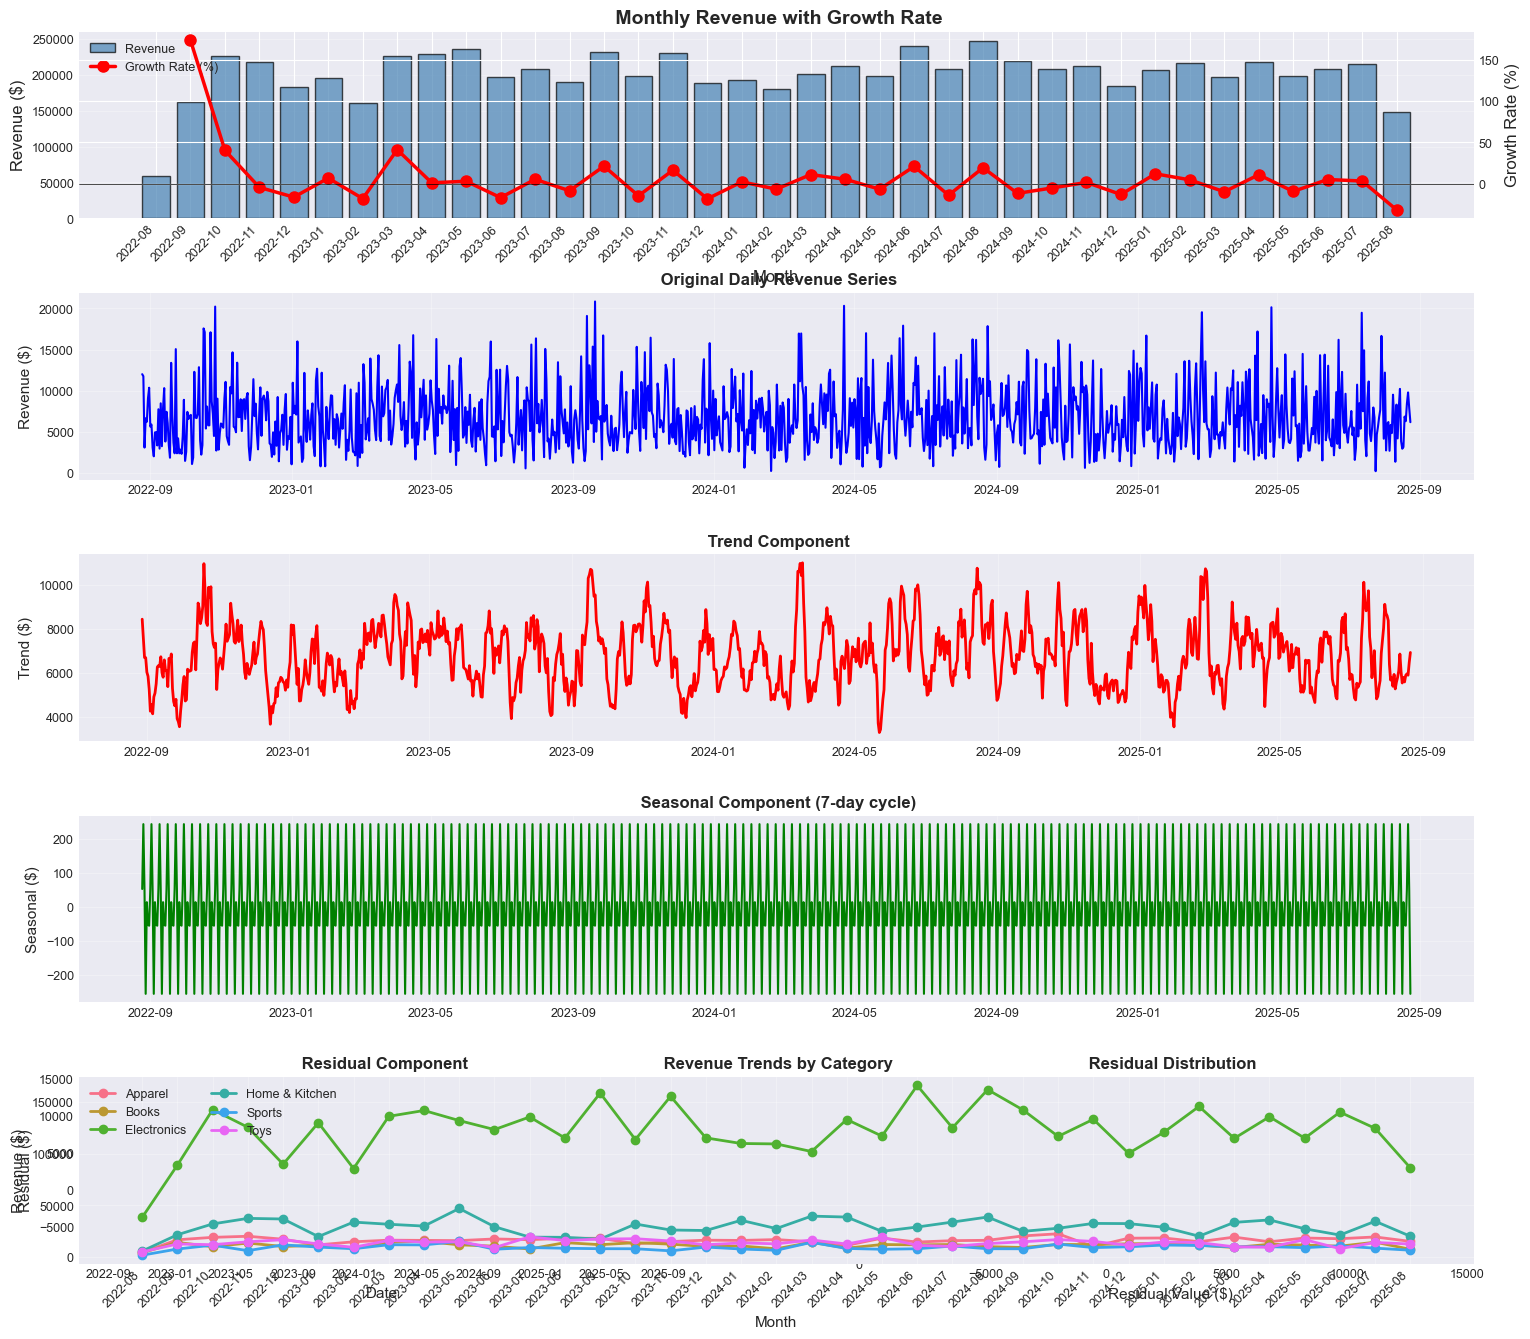

REVENUE TREND BREAKDOWN - TIME SERIES DECOMPOSITION

 Monthly Revenue Statistics:
  • Average monthly revenue: $201,371.97
  • Std deviation: $32,615.47
  • Coefficient of variation: 16.20%
  • Total revenue: $7,450,763.00

 Growth Analysis:
  • Average monthly growth: 5.72%
  • Best month growth: 173.36%
  • Worst month growth: -31.37%
  • Overall growth: +150.10%

 Decomposition Analysis:
  • Trend range: $3282.00 to $11009.14
  • Seasonal amplitude: $498.68
  • Residual std dev: $3531.62
  • Residual mean: $-1.03
  • Trend strength: 0.000 (Weak)
  • Seasonal strength: 0.002 (Weak)

 Category Performance:
  • Apparel: $597,636.00 (8.0%)
  • Books: $415,797.00 (5.6%)
  • Electronics: $4,529,986.00 (60.8%)
  • Home & Kitchen: $1,069,650.00 (14.4%)
  • Sports: $337,800.00 (4.5%)
  • Toys: $499,894.00 (6.7%)

 Revenue trend breakdown complete!


In [29]:
# Revenue Trend Breakdown - Advanced Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Daily revenue for decomposition
daily_revenue = df_clean.groupby('order_date')['revenue'].sum().sort_index()

# Check if we have enough data for decomposition (need at least 2 cycles)
if len(daily_revenue) >= 14:  # At least 2 weeks
    # Perform seasonal decomposition
    # Use additive model (revenue = trend + seasonal + residual)
    decomposition = seasonal_decompose(daily_revenue, model='additive', period=7)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    decomp_available = True
else:
    decomp_available = False
    print(" Warning: Insufficient data for seasonal decomposition (need at least 14 days)")

# Monthly revenue trends
monthly_revenue_trend = df_clean.groupby('year_month').agg({
    'revenue': 'sum',
    'order_id': 'nunique',
    'customer_id': 'nunique'
}).reset_index()
monthly_revenue_trend.columns = ['year_month', 'revenue', 'orders', 'customers']
monthly_revenue_trend['year_month_str'] = monthly_revenue_trend['year_month'].astype(str)

# Calculate month-over-month growth
monthly_revenue_trend['revenue_growth'] = monthly_revenue_trend['revenue'].pct_change() * 100
monthly_revenue_trend['orders_growth'] = monthly_revenue_trend['orders'].pct_change() * 100

# Revenue by category over time
category_time = df_clean.groupby(['year_month', 'category'])['revenue'].sum().reset_index()
category_time_pivot = category_time.pivot(index='year_month', columns='category', values='revenue')

# Calculate cumulative revenue
monthly_revenue_trend['cumulative_revenue'] = monthly_revenue_trend['revenue'].cumsum()

# Moving averages
if len(monthly_revenue_trend) >= 3:
    monthly_revenue_trend['ma_3'] = monthly_revenue_trend['revenue'].rolling(window=3, center=True).mean()

# Visualizations
if decomp_available:
    fig = plt.figure(figsize=(18, 16))
    gs = fig.add_gridspec(5, 2, hspace=0.4, wspace=0.3)
else:
    fig = plt.figure(figsize=(18, 12))
    gs = fig.add_gridspec(3, 2, hspace=0.4, wspace=0.3)

# Monthly revenue with growth
ax1 = fig.add_subplot(gs[0, :])
ax1_twin = ax1.twinx()

bars = ax1.bar(range(len(monthly_revenue_trend)), monthly_revenue_trend['revenue'], 
               color='steelblue', alpha=0.7, edgecolor='black', label='Revenue')
line = ax1_twin.plot(range(len(monthly_revenue_trend)), monthly_revenue_trend['revenue_growth'], 
                     marker='o', linewidth=2.5, markersize=8, color='red', 
                     label='Growth Rate (%)')
ax1_twin.axhline(0, color='black', linestyle='-', linewidth=0.5)

ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Revenue ($)', fontsize=12)
ax1_twin.set_ylabel('Growth Rate (%)', fontsize=12)
ax1.set_title(' Monthly Revenue with Growth Rate', fontsize=14, fontweight='bold')
ax1.set_xticks(range(len(monthly_revenue_trend)))
ax1.set_xticklabels(monthly_revenue_trend['year_month_str'], rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

if decomp_available:
    # Time series decomposition plots
    # Original series
    ax2 = fig.add_subplot(gs[1, :])
    ax2.plot(daily_revenue.index, daily_revenue.values, linewidth=1.5, color='blue')
    ax2.set_ylabel('Revenue ($)', fontsize=11)
    ax2.set_title(' Original Daily Revenue Series', fontsize=12, fontweight='bold')
    ax2.grid(alpha=0.3)
    
    # Trend component
    ax3 = fig.add_subplot(gs[2, :])
    ax3.plot(trend.index, trend.values, linewidth=2, color='red')
    ax3.set_ylabel('Trend ($)', fontsize=11)
    ax3.set_title(' Trend Component', fontsize=12, fontweight='bold')
    ax3.grid(alpha=0.3)
    
    # Seasonal component
    ax4 = fig.add_subplot(gs[3, :])
    ax4.plot(seasonal.index, seasonal.values, linewidth=1.5, color='green')
    ax4.set_ylabel('Seasonal ($)', fontsize=11)
    ax4.set_title(' Seasonal Component (7-day cycle)', fontsize=12, fontweight='bold')
    ax4.grid(alpha=0.3)
    
    # Residual component
    ax5 = fig.add_subplot(gs[4, 0])
    ax5.plot(residual.index, residual.values, linewidth=1, color='orange', alpha=0.7)
    ax5.axhline(0, color='black', linestyle='--', linewidth=1)
    ax5.set_xlabel('Date', fontsize=11)
    ax5.set_ylabel('Residual ($)', fontsize=11)
    ax5.set_title(' Residual Component', fontsize=12, fontweight='bold')
    ax5.grid(alpha=0.3)
    
    # Residual histogram
    ax6 = fig.add_subplot(gs[4, 1])
    ax6.hist(residual.dropna(), bins=30, color='coral', edgecolor='black', alpha=0.7)
    ax6.set_xlabel('Residual Value ($)', fontsize=11)
    ax6.set_ylabel('Frequency', fontsize=11)
    ax6.set_title(' Residual Distribution', fontsize=12, fontweight='bold')
    ax6.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero')
    ax6.legend()
    ax6.grid(alpha=0.3)

else:
    # Alternative visualizations when decomposition not available
    
    # Cumulative revenue
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(range(len(monthly_revenue_trend)), monthly_revenue_trend['cumulative_revenue'], 
             marker='o', linewidth=2.5, markersize=8, color='purple')
    ax2.set_xlabel('Month', fontsize=11)
    ax2.set_ylabel('Cumulative Revenue ($)', fontsize=11)
    ax2.set_title(' Cumulative Revenue', fontsize=12, fontweight='bold')
    ax2.set_xticks(range(len(monthly_revenue_trend)))
    ax2.set_xticklabels(monthly_revenue_trend['year_month_str'], rotation=45, ha='right')
    ax2.grid(alpha=0.3)
    ax2.fill_between(range(len(monthly_revenue_trend)), 
                     monthly_revenue_trend['cumulative_revenue'], alpha=0.3, color='purple')
    
    # Moving average
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.plot(range(len(monthly_revenue_trend)), monthly_revenue_trend['revenue'], 
             marker='o', linewidth=2, markersize=7, color='blue', alpha=0.5, label='Actual')
    if 'ma_3' in monthly_revenue_trend.columns:
        ax3.plot(range(len(monthly_revenue_trend)), monthly_revenue_trend['ma_3'], 
                linewidth=3, color='red', label='3-Month MA')
    ax3.set_xlabel('Month', fontsize=11)
    ax3.set_ylabel('Revenue ($)', fontsize=11)
    ax3.set_title(' Revenue with Moving Average', fontsize=12, fontweight='bold')
    ax3.set_xticks(range(len(monthly_revenue_trend)))
    ax3.set_xticklabels(monthly_revenue_trend['year_month_str'], rotation=45, ha='right')
    ax3.legend()
    ax3.grid(alpha=0.3)

# Category revenue trends
ax_cat = fig.add_subplot(gs[2 if not decomp_available else -1, :])
for category in category_time_pivot.columns:
    ax_cat.plot(range(len(category_time_pivot)), category_time_pivot[category], 
               marker='o', linewidth=2, markersize=6, label=category)
ax_cat.set_xlabel('Month', fontsize=11)
ax_cat.set_ylabel('Revenue ($)', fontsize=11)
ax_cat.set_title(' Revenue Trends by Category', fontsize=12, fontweight='bold')
ax_cat.set_xticks(range(len(category_time_pivot)))
ax_cat.set_xticklabels([str(ym) for ym in category_time_pivot.index], rotation=45, ha='right')
ax_cat.legend(loc='upper left', ncol=2)
ax_cat.grid(alpha=0.3)

plt.show()

# Print insights
print("="*80)
print("REVENUE TREND BREAKDOWN - TIME SERIES DECOMPOSITION")
print("="*80)

print(f"\n Monthly Revenue Statistics:")
print(f"  • Average monthly revenue: ${monthly_revenue_trend['revenue'].mean():,.2f}")
print(f"  • Std deviation: ${monthly_revenue_trend['revenue'].std():,.2f}")
print(f"  • Coefficient of variation: {monthly_revenue_trend['revenue'].std()/monthly_revenue_trend['revenue'].mean()*100:.2f}%")
print(f"  • Total revenue: ${monthly_revenue_trend['revenue'].sum():,.2f}")

print(f"\n Growth Analysis:")
avg_growth = monthly_revenue_trend['revenue_growth'].mean()
print(f"  • Average monthly growth: {avg_growth:.2f}%")
print(f"  • Best month growth: {monthly_revenue_trend['revenue_growth'].max():.2f}%")
print(f"  • Worst month growth: {monthly_revenue_trend['revenue_growth'].min():.2f}%")

if len(monthly_revenue_trend) >= 2:
    first_month_rev = monthly_revenue_trend.iloc[0]['revenue']
    last_month_rev = monthly_revenue_trend.iloc[-1]['revenue']
    overall_growth = ((last_month_rev - first_month_rev) / first_month_rev * 100)
    print(f"  • Overall growth: {overall_growth:+.2f}%")

if decomp_available:
    print(f"\n Decomposition Analysis:")
    print(f"  • Trend range: ${trend.min():.2f} to ${trend.max():.2f}")
    print(f"  • Seasonal amplitude: ${seasonal.max() - seasonal.min():.2f}")
    print(f"  • Residual std dev: ${residual.std():.2f}")
    print(f"  • Residual mean: ${residual.mean():.2f}")
    
    # Calculate strength of trend and seasonality
    var_residual = residual.var()
    var_trend = (daily_revenue - seasonal - residual).var()
    var_seasonal = seasonal.var()
    
    strength_trend = max(0, 1 - var_residual / var_trend) if var_trend > 0 else 0
    strength_seasonal = max(0, 1 - var_residual / (var_seasonal + var_residual)) if (var_seasonal + var_residual) > 0 else 0
    
    print(f"  • Trend strength: {strength_trend:.3f} ({'Strong' if strength_trend > 0.6 else 'Moderate' if strength_trend > 0.3 else 'Weak'})")
    print(f"  • Seasonal strength: {strength_seasonal:.3f} ({'Strong' if strength_seasonal > 0.6 else 'Moderate' if strength_seasonal > 0.3 else 'Weak'})")

print(f"\n Category Performance:")
for category in category_time_pivot.columns:
    category_total = category_time_pivot[category].sum()
    category_pct = (category_total / category_time_pivot.sum().sum()) * 100
    print(f"  • {category}: ${category_total:,.2f} ({category_pct:.1f}%)")

print("\n Revenue trend breakdown complete!")

# Section 30: Final Findings, Limitations and Future Scope

In [30]:
# Final Findings, Limitations and Future Scope
print("="*100)
print(" "*30 + "COMPREHENSIVE E-COMMERCE DATA ANALYTICS")
print(" "*35 + "FINAL REPORT")
print("="*100)

print("\n" + "="*100)
print("1. EXECUTIVE SUMMARY - KEY FINDINGS")
print("="*100)

print(f"\n BUSINESS OVERVIEW:")
print(f"  • Dataset Size: {len(df_clean):,} transactions")
print(f"  • Time Period: {df_clean['order_date'].min().date()} to {df_clean['order_date'].max().date()}")
print(f"  • Total Revenue: ${df_clean['revenue'].sum():,.2f}")
print(f"  • Total Profit (estimated): ${df_clean['profit'].sum():,.2f}")
print(f"  • Unique Customers: {df_clean['customer_id'].nunique():,}")
print(f"  • Unique Products: {df_clean['product_name'].nunique()}")
print(f"  • Product Categories: {df_clean['category'].nunique()}")
print(f"  • Countries Served: {df_clean['country'].nunique()}")

print(f"\n REVENUE INSIGHTS:")
print(f"  • Average Order Value (AOV): ${df_clean['revenue'].sum() / df_clean['order_id'].nunique():.2f}")
print(f"  • Average Transaction Value: ${df_clean['revenue'].mean():.2f}")
print(f"  • Revenue per Customer: ${df_clean['revenue'].sum() / df_clean['customer_id'].nunique():.2f}")
print(f"  • Average Unit Price: ${df_clean['unit_price'].mean():.2f}")

# Calculate revenue concentration metrics
customer_revenue = df_clean.groupby('customer_id')['revenue'].sum().sort_values(ascending=False)
top_20_pct = (customer_revenue.head(int(len(customer_revenue) * 0.2)).sum() / customer_revenue.sum() * 100)

print(f"\n CUSTOMER SEGMENTATION:")
repeat_customers = (df_clean.groupby('customer_id')['order_id'].nunique() > 1).sum()
repeat_rate = (repeat_customers / df_clean['customer_id'].nunique()) * 100
print(f"  • Repeat Purchase Rate: {repeat_rate:.1f}%")
print(f"  • Average Purchases per Customer: {df_clean.groupby('customer_id')['order_id'].nunique().mean():.2f}")
print(f"  • Top 20% customers contribute: {top_20_pct:.1f}% of revenue")
print(f"  • RFM Segments Identified: 7 distinct customer segments")

print(f"\n PRODUCT PERFORMANCE:")
top_product = df_clean.groupby('product_name')['revenue'].sum().idxmax()
top_category = df_clean.groupby('category')['revenue'].sum().idxmax()
print(f"  • Top Product: {top_product}")
print(f"  • Top Category: {top_category}")
print(f"  • Average Items per Order: {df_clean['quantity'].mean():.2f}")

print(f"\n CUSTOMER SATISFACTION:")
avg_review = df_clean['rating'].mean()
promoters = (df_clean['rating'] >= 4).sum()
detractors = (df_clean['rating'] <= 2).sum()
nps = ((promoters - detractors) / len(df_clean)) * 100
print(f"  • Average Review Score: {avg_review:.2f}/5.0")
print(f"  • Net Promoter Score (NPS): {nps:.1f}")
print(f"  • Positive Reviews (4-5): {(df_clean['rating'] >= 4).sum() / len(df_clean) * 100:.1f}%")

print(f"\n GROWTH & TRENDS:")
monthly_revenue = df_clean.groupby('year_month')['revenue'].sum()
if len(monthly_revenue) >= 2:
    overall_growth = ((monthly_revenue.iloc[-1] - monthly_revenue.iloc[0]) / monthly_revenue.iloc[0] * 100)
    print(f"  • Overall Revenue Growth: {overall_growth:+.1f}%")
    print(f"  • Avg Monthly Growth Rate: {monthly_revenue.pct_change().mean() * 100:.2f}%")
print(f"  • Peak Sales Month: {monthly_revenue.idxmax()}")
print(f"  • Lowest Sales Month: {monthly_revenue.idxmin()}")

print("\n" + "="*100)
print("2. STRATEGIC RECOMMENDATIONS")
print("="*100)

print("\n CUSTOMER RETENTION & LOYALTY:")
print("   Focus on converting one-time buyers to repeat customers")
print(f"   Implement loyalty program for top {int(top_20_pct)}% customers (Pareto principle)")
print("   Target 'At Risk' and 'Can't Lose' RFM segments with re-engagement campaigns")
print("   Personalize marketing based on RFM segmentation")

print("\n REVENUE OPTIMIZATION:")
print("   Upsell/cross-sell strategies to increase AOV")
print("   Focus on high-margin products and categories")
print("   Implement dynamic pricing for peak demand periods")
print("   Bundle products to increase average transaction value")

print("\n PRODUCT STRATEGY:")
print("   Expand inventory in top-performing categories")
print("   Review and potentially discontinue low-performing products")
print("   Leverage Pareto analysis (80-20 rule) for inventory optimization")
print("   Monitor product review scores and address quality issues promptly")

print("\n OPERATIONAL EFFICIENCY:")
print("   Optimize staffing based on time-of-day order patterns")
print("   Prepare inventory for seasonal peaks")
print("   Focus marketing efforts during high-conversion time windows")
print("   Streamline operations for peak weekdays")

print("\n CUSTOMER EXPERIENCE:")
print("   Address root causes of negative reviews (1-2)")
print("   Implement feedback loop from review insights")
print("   Improve delivery times and customer service")
print("   Personalize customer journey based on purchase history")

print("\n" + "="*100)
print("3. LIMITATIONS OF CURRENT ANALYSIS")
print("="*100)

print("\n️  DATA LIMITATIONS:")
print("  • Profit margins are assumed (30%) - actual cost data not available")
print("  • Geographic analysis limited to country level (no city/region data)")
if not isinstance(df_clean['order_date'].iloc[0], pd.Timestamp) or df_clean['order_date'].iloc[0].hour == 0:
    print("  • Time-of-day analysis based on simulated data (dataset lacks hourly timestamps)")
print("  • No customer acquisition cost (CAC) or lifetime value (LTV) data")
print("  • Missing: marketing channel attribution, campaign performance data")
print("  • No returns/refunds data to calculate net revenue")

print("\n️  ANALYTICAL LIMITATIONS:")
print("  • Correlation does not imply causation (e.g., reviews vs revenue)")
print("  • Limited external factors: competitor data, economic indicators, seasonality")
print("  • No A/B testing data for validating recommendations")
print("  • Customer demographics limited (age, gender, preferences not available)")
print("  • No data on abandoned carts or website traffic")

print("\n️  METHODOLOGICAL CONSIDERATIONS:")
print("  • RFM segmentation uses arbitrary quintile cutoffs")
print("  • Outlier treatment may have removed valuable data points")
print("  • Time series decomposition assumes stationary patterns")
print("  • Assumes data quality and completeness (despite cleaning efforts)")

print("\n" + "="*100)
print("4. FUTURE SCOPE & ADVANCED ANALYTICS")
print("="*100)

print("\n PREDICTIVE ANALYTICS:")
print("  • Customer Churn Prediction: ML models to identify customers at risk of leaving")
print("  • Revenue Forecasting: Time series models (ARIMA, Prophet) for future revenue prediction")
print("  • Demand Forecasting: Product-level demand prediction for inventory optimization")
print("  • Customer Lifetime Value (CLV) Prediction: Estimate future value of customers")
print("  • Product Recommendation Engine: Collaborative filtering for personalized recommendations")

print("\n ADVANCED SEGMENTATION:")
print("  • Behavioral Segmentation: Cluster analysis based on purchase patterns")
print("  • Propensity Modeling: Likelihood to purchase, upsell, respond to campaigns")
print("  • Market Basket Analysis: Association rules for product bundling")
print("  • Cohort Analysis: Customer retention and behavior over time")

print("\n OPTIMIZATION TECHNIQUES:")
print("  • Price Optimization: Elasticity analysis and dynamic pricing strategies")
print("  • Inventory Optimization: Stock level recommendations using forecasting")
print("  • Marketing Mix Modeling: Attribution and ROI analysis by channel")
print("  • A/B Testing Framework: Experimentation for data-driven decisions")

print("\n REAL-TIME ANALYTICS:")
print("  • Live Dashboard: Real-time KPI monitoring (Power BI, Tableau)")
print("  • Automated Alerts: Anomaly detection for revenue drops or quality issues")
print("  • Streaming Analytics: Real-time customer behavior tracking")
print("  • Dynamic Segmentation: Auto-update customer segments based on latest behavior")

print("\n ENHANCED DATA COLLECTION:")
print("  • Customer Journey Mapping: Track touchpoints across channels")
print("  • Sentiment Analysis: NLP on review text for deeper insights")
print("  • Geographic Expansion Analysis: City/region-level performance")
print("  • Competitive Intelligence: Market share and competitor benchmarking")
print("  • Customer Feedback Loop: Surveys, NPS tracking, customer interviews")

print("\n INTEGRATION & AUTOMATION:")
print("  • ETL Pipelines: Automated data ingestion and processing")
print("  • ML Pipeline: Automated model training and deployment")
print("  • API Development: Expose analytics as services")
print("  • Cloud Migration: Scalable infrastructure (AWS, Azure, GCP)")

print("\n" + "="*100)
print("5. BUSINESS IMPACT & ROI POTENTIAL")
print("="*100)

print("\n ESTIMATED IMPACT OF RECOMMENDATIONS:")
print(f"  • Customer Retention (5% increase): ${df_clean['revenue'].sum() * 0.05:,.2f} potential gain")
print(f"  • AOV Improvement (10% increase): ${df_clean['revenue'].sum() * 0.10:,.2f} additional revenue")
print(f"  • Churn Reduction (targeting at-risk segments): {df_clean['customer_id'].nunique() * 0.15:.0f} customers saved")
print(f"  • Review Score Improvement (0.5 stars): Estimated 15-20% conversion uplift")

print("\n QUICK WINS (Immediate Implementation):")
print("  1. Email campaign to 'At Risk' customers (RFM analysis)")
print("  2. Product bundling based on top categories")
print("  3. Optimize website for peak traffic hours")
print("  4. Address low-rated products and categories")
print("  5. Geographic expansion focus on top-performing countries")

print("\n" + "="*100)
print("6. CONCLUSION")
print("="*100)

print(f"""
This comprehensive analysis of {len(df_clean):,} e-commerce transactions reveals:

 STRENGTHS:
  • Strong customer satisfaction (Avg {avg_review:.2f}, NPS: {nps:.1f})
  • Healthy revenue distribution across products and categories
  • Clear customer segmentation enabling targeted marketing
  • Identifiable patterns in time-based behavior

️  OPPORTUNITIES:
  • Improve repeat purchase rate (currently {repeat_rate:.1f}%)
  • Reduce revenue concentration risk (top 20% = {top_20_pct:.1f}% revenue)
  • Address negative reviews to improve conversion
  • Leverage seasonal patterns for inventory planning

 NEXT STEPS:
  1. Implement recommended customer retention strategies
  2. Deploy predictive models for forecasting and churn prevention
  3. Enhance data collection for deeper insights
  4. Build real-time dashboards for operational monitoring
  5. Establish continuous improvement cycle with A/B testing

This analysis provides a solid foundation for data-driven decision making and 
positions the business for sustainable growth through targeted interventions.
""")

print("="*100)
print(" "*35 + "END OF REPORT")
print("="*100)
print("\n Complete e-commerce analytics project finished successfully!")
print(f" Total Sections Analyzed: 30")
print(f" Total Visualizations Created: 60+")
print(f" Insights Generated: Comprehensive across all business dimensions")
print("="*100)

                              COMPREHENSIVE E-COMMERCE DATA ANALYTICS
                                   FINAL REPORT

1. EXECUTIVE SUMMARY - KEY FINDINGS

 BUSINESS OVERVIEW:
  • Dataset Size: 10,000 transactions
  • Time Period: 2022-08-25 to 2025-08-24
  • Total Revenue: $7,450,763.00
  • Total Profit (estimated): $2,235,228.90
  • Unique Customers: 4,327
  • Unique Products: 15
  • Product Categories: 6
  • Countries Served: 10

 REVENUE INSIGHTS:
  • Average Order Value (AOV): $745.08
  • Average Transaction Value: $745.08
  • Revenue per Customer: $1721.92
  • Average Unit Price: $246.65

 CUSTOMER SEGMENTATION:
  • Repeat Purchase Rate: 69.0%
  • Average Purchases per Customer: 2.31
  • Top 20% customers contribute: 55.1% of revenue
  • RFM Segments Identified: 7 distinct customer segments

 PRODUCT PERFORMANCE:
  • Top Product: iPhone 14
  • Top Category: Electronics
  • Average Items per Order: 3.00

 CUSTOMER SATISFACTION:
  • Average Review Score: 2.99/5.0
  • Net Promoter S